<a href="https://colab.research.google.com/github/BrainConnection/Qiskit/blob/main/Project%20Quantum%20Challenge%202023/1.%20Quantum%20Chutes%20and%20Ladders/%231%20IBMQ%20QASM%20Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting

In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install matplotlib
!pip install numpy

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
import numpy as np

from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library.standard_gates import C3XGate, SwapGate

In [3]:
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="067e5c82606f0a1157dd554e2087d6b7a9b823dbaa4ad47b95c3337eab2e6cd9361719cc0470f4a98d1631b73b264a82577012a0b8ff32963d5964e6cc12c525",
                                  set_as_default=True,
                                  overwrite=True)

In [4]:
service = QiskitRuntimeService()
backend = service.get_backend("ibmq_qasm_simulator")

sampler = Sampler(backend=backend)

#1. Fair Quantum Coin Operator & Four-Sided Fair Quantum Coin Operator

1) Quantum Coin State

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


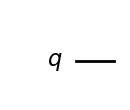

In [5]:
Two_Sided_Fair_Coin = QuantumCircuit(1)
Two_Sided_Fair_Coin.draw("mpl")

2) Fair Quantum Coin Operator

Fair Quantum Coin Operator

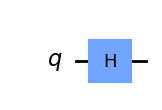

In [6]:
Two_Sided_Fair_Coin = QuantumCircuit(1)
Two_Sided_Fair_Coin.h(0)
Two_Sided_Fair_Coin.draw("mpl")

Verifying Fair Quantum Coin Operator

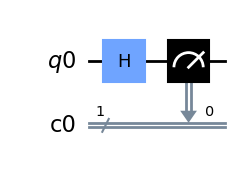

In [7]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
Two_Sided_Fair_Coin_Circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits

Two_Sided_Fair_Coin_Circuit.h(q0)
Two_Sided_Fair_Coin_Circuit.measure(q0, c0)

Two_Sided_Fair_Coin_Circuit.draw("mpl")

>>> Job ID: claqjellqrutvh0h662g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.49866, 0: 0.50134}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.49866, 0: 0.50134}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


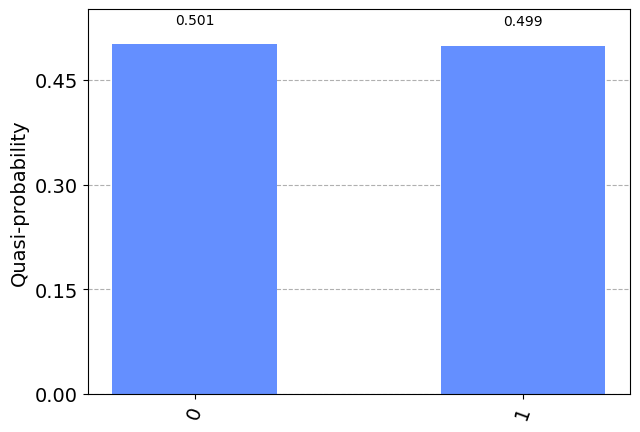

In [8]:
job = sampler.run(Two_Sided_Fair_Coin_Circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

counts = dict(result.quasi_dists[0])
plot_histogram(counts, sort='asc')

3) Four-Sided Quantum Coin State

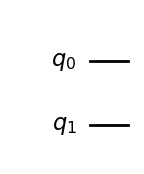

In [9]:
Four_Sided_Fair_Coin = QuantumCircuit(2)
Four_Sided_Fair_Coin.draw("mpl")

4) Four-Sided Fair Quantum Coin Operator

Four-Sided Fair Quantum Coin Operator

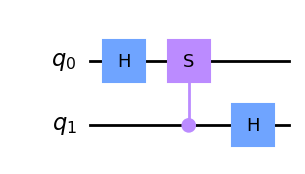

In [10]:
from qiskit.circuit.library.standard_gates import SGate, TGate

csgate = SGate().control(1) # the parameter is the amount of control points you want

Four_Sided_Fair_Coin = QuantumCircuit(2)
Four_Sided_Fair_Coin.h(0)
Four_Sided_Fair_Coin.append(csgate, [1, 0])
Four_Sided_Fair_Coin.h(1)

Four_Sided_Fair_Coin.draw("mpl")

Verifying Four-Sided Fair Quantum Coin Operator

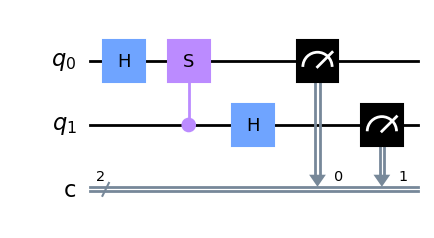

In [11]:
qubits = QuantumRegister(2, 'q')
clbits = ClassicalRegister(2, 'c')
Four_Sided_Fair_Coin_Circuit = QuantumCircuit(qubits, clbits)
(q0,q1,) = qubits
(c0,c1,) = clbits

Four_Sided_Fair_Coin_Circuit.h(q0)
Four_Sided_Fair_Coin_Circuit.append(csgate, [q1, q0])
Four_Sided_Fair_Coin_Circuit.h(q1)
Four_Sided_Fair_Coin_Circuit.measure(qubits, clbits)

Four_Sided_Fair_Coin_Circuit.draw("mpl")

>>> Job ID: claqjfctstu8k2fv55ag
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{3: 0.25065, 1: 0.25096, 0: 0.2498, 2: 0.24859}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {3: 0.25065, 1: 0.25096, 0: 0.2498, 2: 0.24859}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


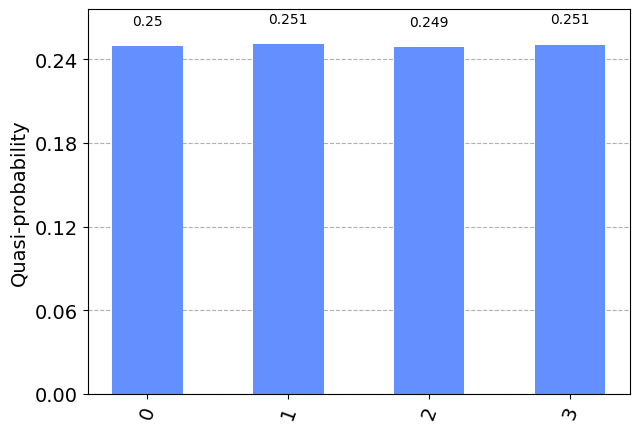

In [12]:
job = sampler.run(Four_Sided_Fair_Coin_Circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

counts = dict(result.quasi_dists[0])
plot_histogram(counts, sort='asc')

5) Fairness Check

all matrix elements of each operator have same absolute value, thus unbiased coin

#2. Location on the Board

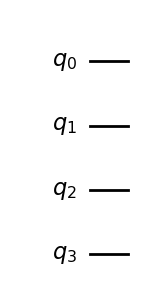

In [13]:
qreg_q = QuantumRegister(4, 'q')
Board = QuantumCircuit(qreg_q)

Board.draw("mpl")

#3. Quantum Coin with Shift Operator

1) Shift Operator

Right Shift Operator

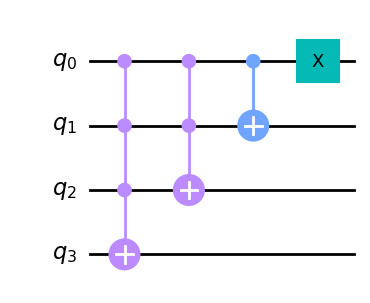

In [14]:
qreg_q = QuantumRegister(4, 'q')
Shift = QuantumCircuit(qreg_q)

Shift.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
Shift.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
Shift.cx(qreg_q[0], qreg_q[1])
Shift.x(qreg_q[0])

Shift.draw("mpl")

Verifying Right Shift Operator

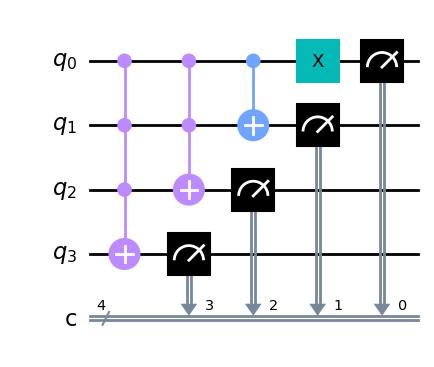

In [15]:
from qiskit.circuit.library.standard_gates import C3XGate

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
Shift = QuantumCircuit(qreg_q, creg_c)

Shift.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
Shift.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
Shift.cx(qreg_q[0], qreg_q[1])
Shift.x(qreg_q[0])

Shift.measure(qreg_q, creg_c)

Shift.draw("mpl")

>>> Job ID: claqjg5lqrutvh0h66bg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


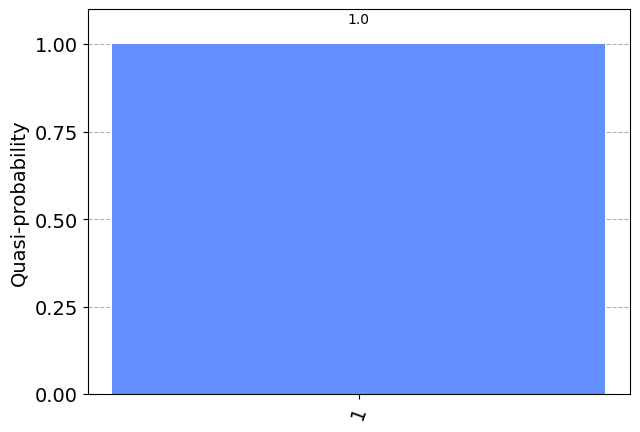

In [16]:
job = sampler.run(Shift, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Right Shift. |0000> -> |0001>
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

2) Shift Operator with Quantum Coin Operator

Shift Operator

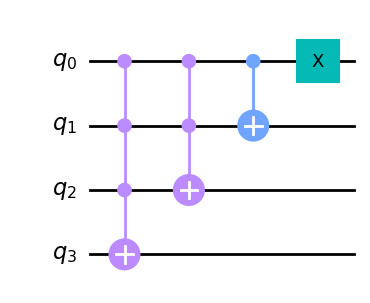

In [17]:
Shift = QuantumCircuit(4)
Shift.append(C3XGate(), [0,1,2,3])
Shift.ccx(0,1,2)
Shift.cx(0,1)
Shift.x(0)

Shift.draw("mpl")

1 Step Board Evolution Operator

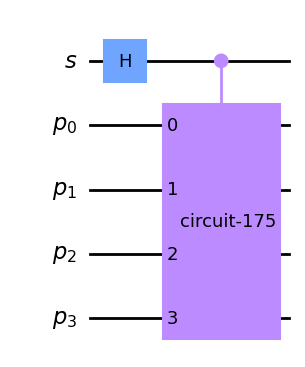

In [18]:
coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
circuit = QuantumCircuit(coin_bit, position_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits

Ugate = Shift.to_gate().control(1)
circuit.h(s)
circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.draw("mpl")

N Step Board Evolution Operator

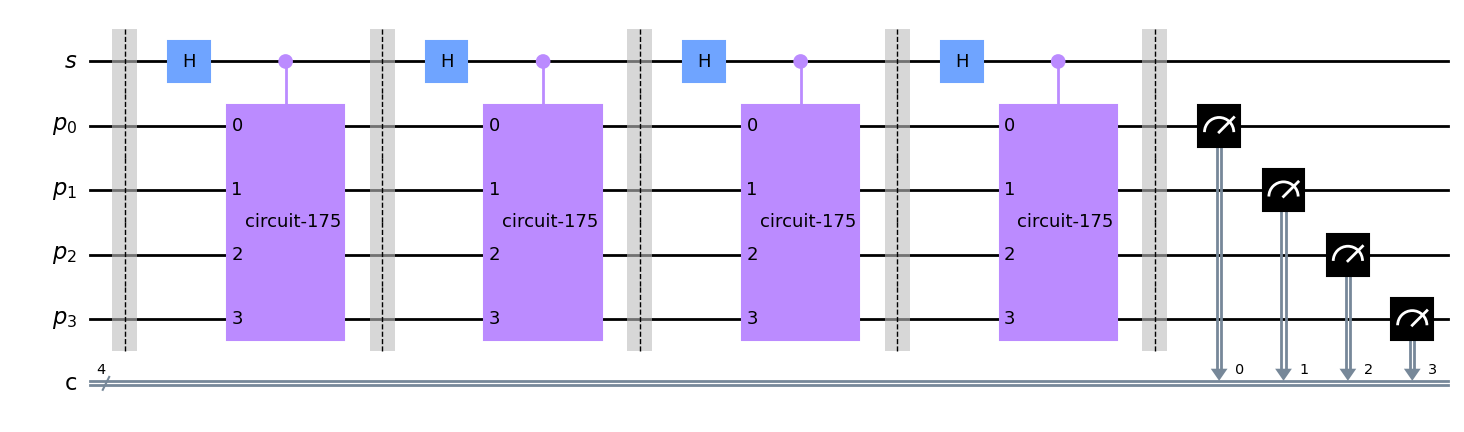

In [19]:
# varying N
N = 4

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit.draw("mpl")

>>> Job ID: claqjgtlqrutvh0h66fg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{4: 0.06361, 3: 0.1238, 1: 0.6238, 2: 0.12588, 0: 0.06291}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {4: 0.06361, 3: 0.1238, 1: 0.6238, 2: 0.12588, 0: 0.06291}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}

4


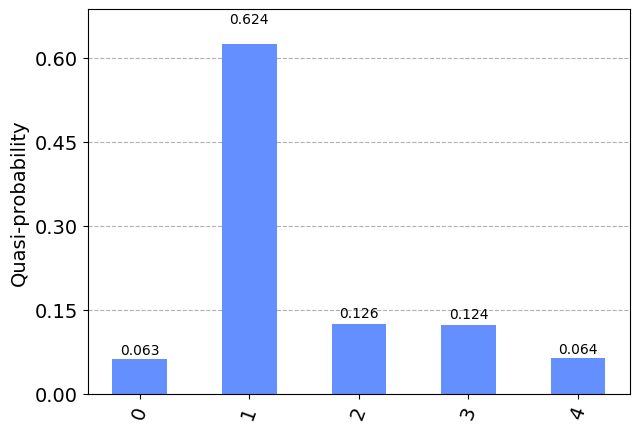

In [20]:
job = sampler.run(circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

print()
print(N)
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

Verifying N Step Board Evolution Operator

>>> Job ID: claqpac46cn44kd6us10
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
0
{0: 1.0}
variance :  0.05859375
entropy :  0.0


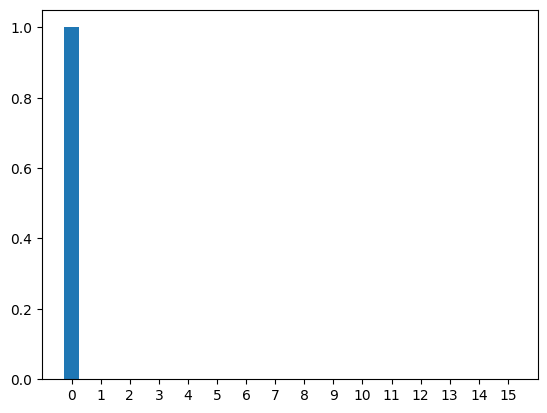



>>> Job ID: claqpark8l5ohotbt3jg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.50228, 0: 0.49772}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.50228, 0: 0.49772}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
1
{1: 0.50228, 0: 0.49772}
variance :  0.027344399799999995
entropy :  0.6931367837239139


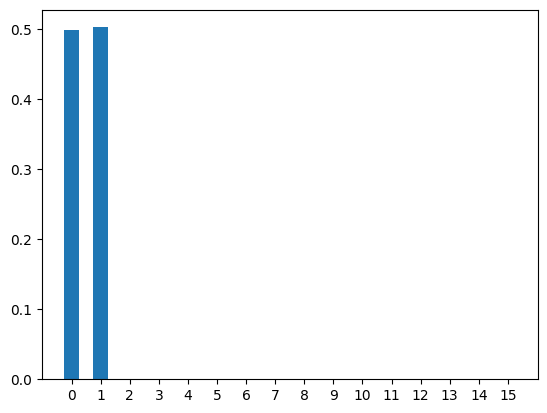



>>> Job ID: claqpbdlqrutvh0h740g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.49967, 0: 0.24949, 2: 0.25084}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.49967, 0: 0.24949, 2: 0.25084}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
2
{1: 0.49967, 0: 0.24949, 2: 0.25084}
variance :  0.0195210046625
entropy :  1.0399474703093337


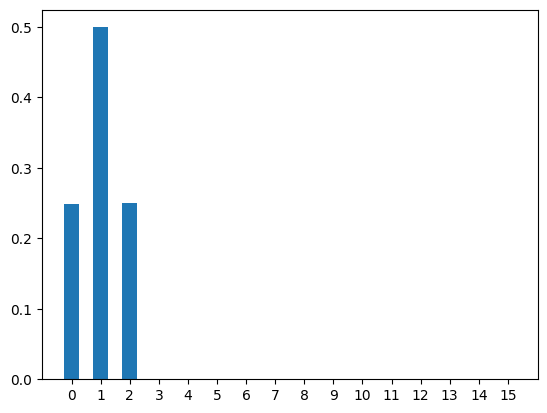



>>> Job ID: claqpbs46cn44kd6usbg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{3: 0.12457, 1: 0.62534, 2: 0.12528, 0: 0.12481}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {3: 0.12457, 1: 0.62534, 2: 0.12528, 0: 0.12481}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
3
{3: 0.12457, 1: 0.62534, 2: 0.12528, 0: 0.12481}
variance :  0.023458775937500002
entropy :  1.0729943467661989


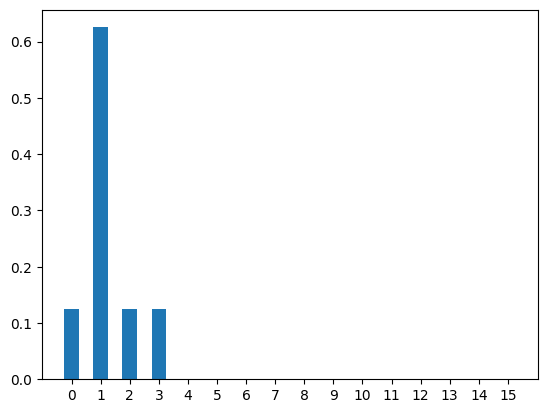



>>> Job ID: claqpcc46cn44kd6usg0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{4: 0.06338, 0: 0.06271, 2: 0.12572, 1: 0.62296, 3: 0.12523}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {4: 0.06338, 0: 0.06271, 2: 0.12572, 1: 0.62296, 3: 0.12523}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
4
{4: 0.06338, 0: 0.06271, 2: 0.12572, 1: 0.62296, 3: 0.12523}
variance :  0.022813550087499995
entropy :  1.1642128950056891


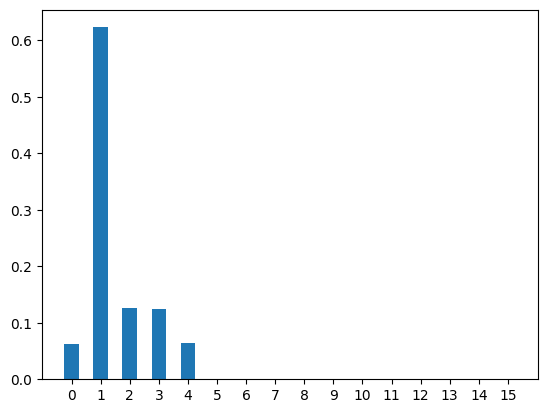



>>> Job ID: claqpd3k8l5ohotbt3ug
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 0.03072, 2: 0.12441, 5: 0.03063, 1: 0.53202, 3: 0.12488, 4: 0.15734}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 0.03072, 2: 0.12441, 5: 0.03063, 1: 0.53202, 3: 0.12488, 4: 0.15734}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
5
{0: 0.03072, 2: 0.12441, 5: 0.03063, 1: 0.53202, 3: 0.12488, 4: 0.15734}
variance :  0.0173909958625
entropy :  1.3595749424815182


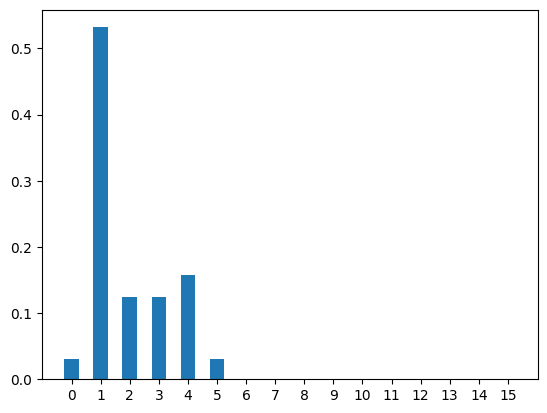



>>> Job ID: claqpdjk8l5ohotbt420
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.40501, 5: 0.15794, 2: 0.20406, 3: 0.12406, 0: 0.01495, 6: 0.01511, 4: 0.07887}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.40501, 5: 0.15794, 2: 0.20406, 3: 0.12406, 0: 0.01495, 6: 0.01511, 4: 0.07887}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
6
{1: 0.40501, 5: 0.15794, 2: 0.20406, 3: 0.12406, 0: 0.01495, 6: 0.01511, 4: 0.07887}
variance :  0.01188636265
entropy :  1.5672920526234326


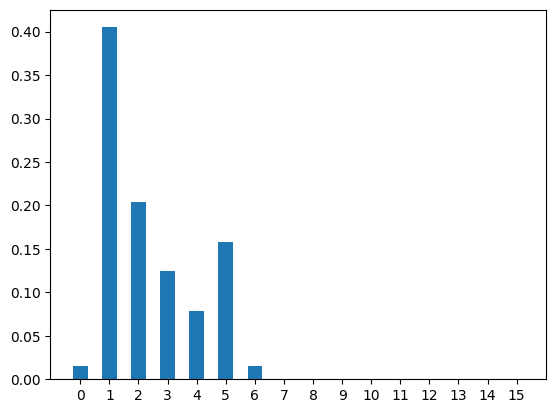



>>> Job ID: claqpe2pen43j46fdfag
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 0.00776, 7: 0.0078, 3: 0.1335, 1: 0.29171, 5: 0.0371, 2: 0.31987, 6: 0.13294, 4: 0.06932}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 0.00776, 7: 0.0078, 3: 0.1335, 1: 0.29171, 5: 0.0371, 2: 0.31987, 6: 0.13294, 4: 0.06932}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
7
{0: 0.00776, 7: 0.0078, 3: 0.1335, 1: 0.29171, 5: 0.0371, 2: 0.31987, 6: 0.13294, 4: 0.06932}
variance :  0.010419347787500002
entropy :  1.6438543846081206


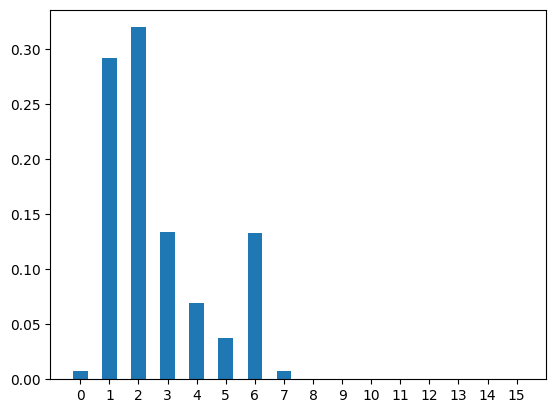



>>> Job ID: claqpektstu8k2fv62cg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.00378, 6: 0.03861, 4: 0.07076, 2: 0.41454, 5: 0.07145, 1: 0.19385, 0: 0.00375, 7: 0.10276, 3: 0.1005}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.00378, 6: 0.03861, 4: 0.07076, 2: 0.41454, 5: 0.07145, 1: 0.19385, 0: 0.00375, 7: 0.10276, 3: 0.1005}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
8
{8: 0.00378, 6: 0.03861, 4: 0.07076, 2: 0.41454, 5: 0.07145, 1: 0.19385, 0: 0.00375, 7: 0.10276, 3: 0.1005}
variance :  0.01120076655
entropy :  1.6914296544545793


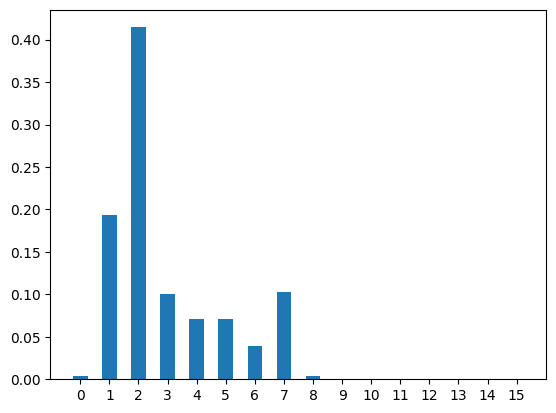



>>> Job ID: claqpf4tstu8k2fv62h0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00204, 5: 0.0704, 8: 0.07233, 2: 0.45301, 0: 0.00214, 7: 0.06273, 3: 0.06375, 6: 0.0777, 4: 0.07109, 1: 0.12481}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00204, 5: 0.0704, 8: 0.07233, 2: 0.45301, 0: 0.00214, 7: 0.06273, 3: 0.06375, 6: 0.0777, 4: 0.07109, 1: 0.12481}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
9
{9: 0.00204, 5: 0.0704, 8: 0.07233, 2: 0.45301, 0: 0.00214, 7: 0.06273, 3: 0.06375, 6: 0.0777, 4: 0.07109, 1: 0.12481}
variance :  0.0117238949875
entropy :  1.7566637125424862


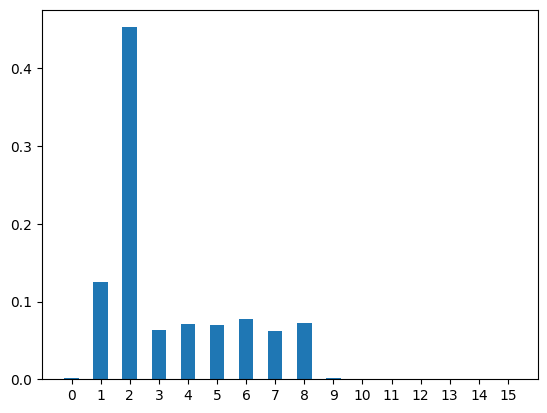



>>> Job ID: claqph5lqrutvh0h7500
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.00101, 5: 0.0702, 9: 0.0491, 2: 0.43503, 4: 0.09809, 6: 0.0504, 1: 0.08123, 8: 0.08716, 0: 0.0009, 3: 0.06397, 7: 0.06291}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.00101, 5: 0.0702, 9: 0.0491, 2: 0.43503, 4: 0.09809, 6: 0.0504, 1: 0.08123, 8: 0.08716, 0: 0.0009, 3: 0.06397, 7: 0.06291}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
10
{10: 0.00101, 5: 0.0702, 9: 0.0491, 2: 0.43503, 4: 0.09809, 6: 0.0504, 1: 0.08123, 8: 0.08716, 0: 0.0009, 3: 0.06397, 7: 0.06291}
variance :  0.0105311622875
entropy :  1.8546535245540023


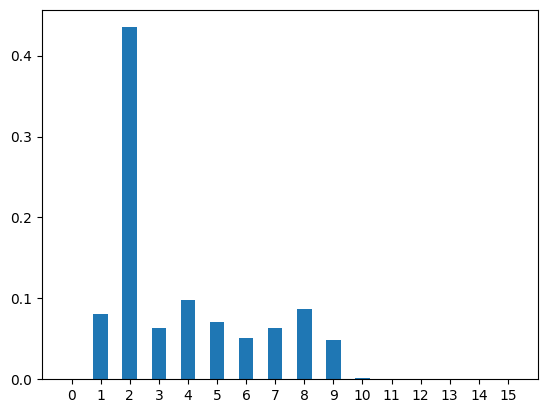



>>> Job ID: claqphk46cn44kd6utg0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.00041, 9: 0.09988, 8: 0.03444, 5: 0.07404, 10: 0.03095, 2: 0.38561, 6: 0.05091, 4: 0.12815, 1: 0.0491, 0: 0.00043, 7: 0.03308, 3: 0.113}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.00041, 9: 0.09988, 8: 0.03444, 5: 0.07404, 10: 0.03095, 2: 0.38561, 6: 0.05091, 4: 0.12815, 1: 0.0491, 0: 0.00043, 7: 0.03308, 3: 0.113}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
11
{11: 0.00041, 9: 0.09988, 8: 0.03444, 5: 0.07404, 10: 0.03095, 2: 0.38561, 6: 0.05091, 4: 0.12815, 1: 0.0491, 0: 0.00043, 7: 0.03308, 3: 0.113}
variance :  0.0086928577625
entropy :  1.9424180423066255


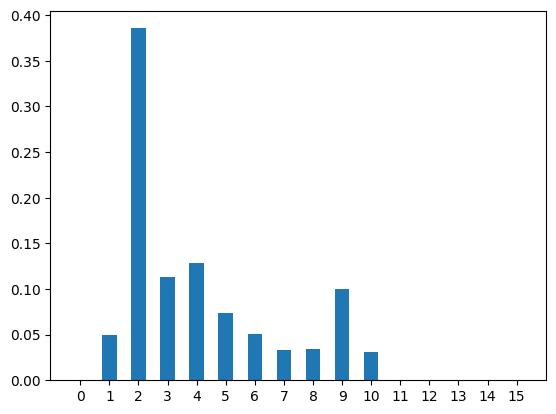



>>> Job ID: claqpiapen43j46fdg10
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.02939, 8: 0.03895, 11: 0.01999, 10: 0.10075, 0: 0.00019, 7: 0.04719, 3: 0.19532, 6: 0.04912, 4: 0.12443, 9: 0.01775, 2: 0.32008, 12: 0.00038, 5: 0.05646}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.02939, 8: 0.03895, 11: 0.01999, 10: 0.10075, 0: 0.00019, 7: 0.04719, 3: 0.19532, 6: 0.04912, 4: 0.12443, 9: 0.01775, 2: 0.32008, 12: 0.00038, 5: 0.05646}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
12
{1: 0.02939, 8: 0.03895, 11: 0.01999, 10: 0.10075, 0: 0.00019, 7: 0.04719, 3: 0.19532, 6: 0.04912, 4: 0.12443, 9: 0.01775, 2: 0.32008, 12: 0.00038, 5: 0.05646}
variance :  0.007166100999999999
entropy :  2.0130175114399345


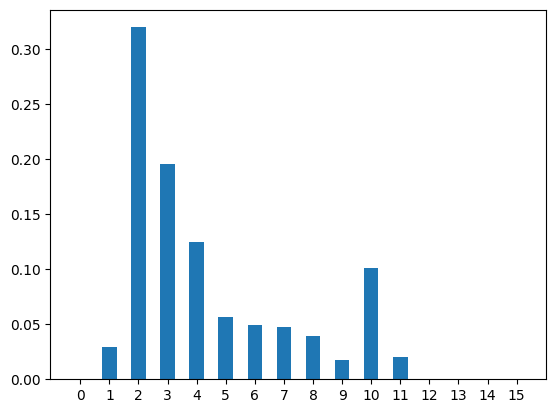



>>> Job ID: claqpkc46cn44kd6utu0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00015, 12: 0.01308, 5: 0.04287, 11: 0.09193, 8: 0.0506, 1: 0.01789, 10: 0.01744, 0: 0.00016, 7: 0.04916, 3: 0.27774, 2: 0.24809, 6: 0.04938, 4: 0.08866, 9: 0.05285}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00015, 12: 0.01308, 5: 0.04287, 11: 0.09193, 8: 0.0506, 1: 0.01789, 10: 0.01744, 0: 0.00016, 7: 0.04916, 3: 0.27774, 2: 0.24809, 6: 0.04938, 4: 0.08866, 9: 0.05285}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
13
{13: 0.00015, 12: 0.01308, 5: 0.04287, 11: 0.09193, 8: 0.0506, 1: 0.01789, 10: 0.01744, 0: 0.00016, 7: 0.04916, 3: 0.27774, 2: 0.24809, 6: 0.04938, 4: 0.08866, 9: 0.05285}
variance :  0.0065838516125
entropy :  2.0759472995310047


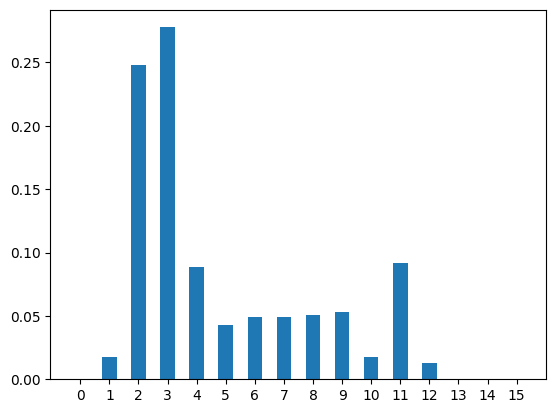



>>> Job ID: claqpkststu8k2fv63k0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 6e-05, 1: 0.01088, 13: 0.00714, 9: 0.0401, 8: 0.03965, 10: 0.05767, 2: 0.18489, 4: 0.04987, 6: 0.06276, 0: 6e-05, 7: 0.04888, 3: 0.33604, 5: 0.05656, 12: 0.07381, 11: 0.03163}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 6e-05, 1: 0.01088, 13: 0.00714, 9: 0.0401, 8: 0.03965, 10: 0.05767, 2: 0.18489, 4: 0.04987, 6: 0.06276, 0: 6e-05, 7: 0.04888, 3: 0.33604, 5: 0.05656, 12: 0.07381, 11: 0.03163}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
14
{14: 6e-05, 1: 0.01088, 13: 0.00714, 9: 0.0401, 8: 0.03965, 10: 0.05767, 2: 0.18489, 4: 0.04987, 6: 0.06276, 0: 6e-05, 7: 0.04888, 3: 0.33604, 5: 0.05656, 12: 0.07381, 11: 0.03163}
variance :  0.006859063237499999
entropy :  2.1205657798918356


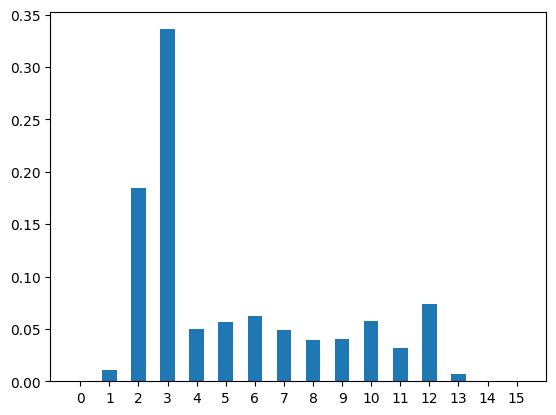



>>> Job ID: claqplk46cn44kd6uu5g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00412, 1: 0.00614, 9: 0.02819, 15: 5e-05, 10: 0.0224, 11: 0.04736, 13: 0.05958, 4: 0.03521, 6: 0.07389, 2: 0.13452, 0: 2e-05, 7: 0.0503, 3: 0.3596, 8: 0.03756, 12: 0.05022, 5: 0.09084}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00412, 1: 0.00614, 9: 0.02819, 15: 5e-05, 10: 0.0224, 11: 0.04736, 13: 0.05958, 4: 0.03521, 6: 0.07389, 2: 0.13452, 0: 2e-05, 7: 0.0503, 3: 0.3596, 8: 0.03756, 12: 0.05022, 5: 0.09084}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
15
{14: 0.00412, 1: 0.00614, 9: 0.02819, 15: 5e-05, 10: 0.0224, 11: 0.04736, 13: 0.05958, 4: 0.03521, 6: 0.07389, 2: 0.13452, 0: 2e-05, 7: 0.0503, 3: 0.3596, 8: 0.03756, 12: 0.05022, 5: 0.09084}
variance :  0.007091620199999999
entropy :  2.1425232443905085


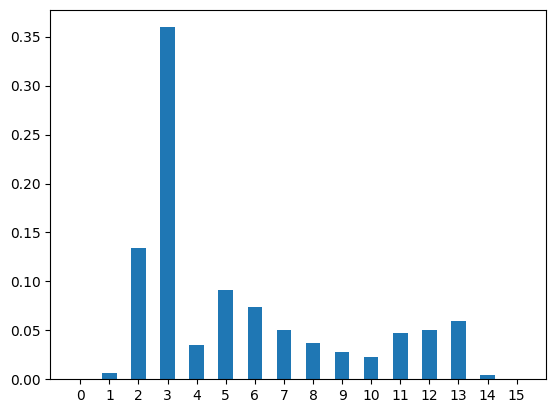



>>> Job ID: claqpmapen43j46fdgqg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.03674, 15: 0.00259, 10: 0.03176, 11: 0.01858, 13: 0.06525, 1: 0.0033, 14: 0.04442, 2: 0.09294, 6: 0.06364, 4: 0.05694, 0: 5e-05, 7: 0.04103, 3: 0.35607, 9: 0.03759, 5: 0.12071, 12: 0.02839}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.03674, 15: 0.00259, 10: 0.03176, 11: 0.01858, 13: 0.06525, 1: 0.0033, 14: 0.04442, 2: 0.09294, 6: 0.06364, 4: 0.05694, 0: 5e-05, 7: 0.04103, 3: 0.35607, 9: 0.03759, 5: 0.12071, 12: 0.02839}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
16
{8: 0.03674, 15: 0.00259, 10: 0.03176, 11: 0.01858, 13: 0.06525, 1: 0.0033, 14: 0.04442, 2: 0.09294, 6: 0.06364, 4: 0.05694, 0: 5e-05, 7: 0.04103, 3: 0.35607, 9: 0.03759, 5: 0.12071, 12: 0.02839}
variance :  0.0067275817499999994
entropy :  2.193873025389853


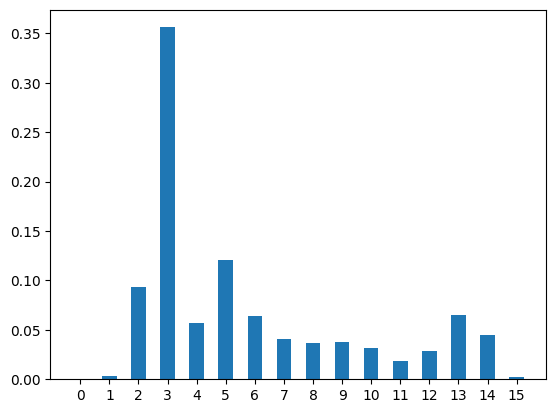



>>> Job ID: claqpmststu8k2fv6420
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00201, 8: 0.03744, 13: 0.01468, 2: 0.0629, 11: 0.0406, 14: 0.0758, 4: 0.10756, 6: 0.04104, 9: 0.0376, 5: 0.12068, 12: 0.02785, 0: 0.00145, 7: 0.03308, 3: 0.32593, 10: 0.03887, 15: 0.03251}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00201, 8: 0.03744, 13: 0.01468, 2: 0.0629, 11: 0.0406, 14: 0.0758, 4: 0.10756, 6: 0.04104, 9: 0.0376, 5: 0.12068, 12: 0.02785, 0: 0.00145, 7: 0.03308, 3: 0.32593, 10: 0.03887, 15: 0.03251}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
17
{1: 0.00201, 8: 0.03744, 13: 0.01468, 2: 0.0629, 11: 0.0406, 14: 0.0758, 4: 0.10756, 6: 0.04104, 9: 0.0376, 5: 0.12068, 12: 0.02785, 0: 0.00145, 7: 0.03308, 3: 0.32593, 10: 0.03887, 15: 0.03251}
variance :  0.0056482948125
entropy :  2.271458146494368


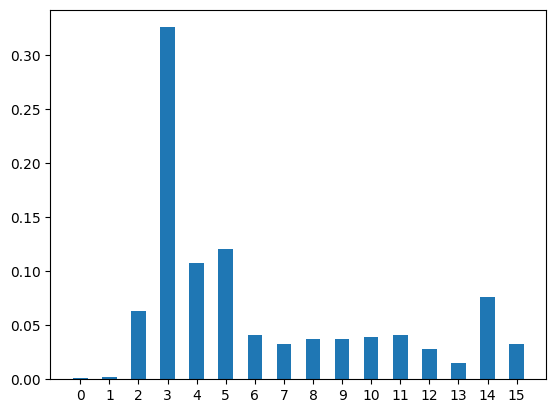



>>> Job ID: claqpnktstu8k2fv6460
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00191, 13: 0.04057, 9: 0.03881, 8: 0.04612, 2: 0.04264, 14: 0.00929, 11: 0.0298, 4: 0.1756, 6: 0.03042, 0: 0.02248, 7: 0.04524, 3: 0.28046, 10: 0.03075, 15: 0.07674, 5: 0.09103, 12: 0.03814}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00191, 13: 0.04057, 9: 0.03881, 8: 0.04612, 2: 0.04264, 14: 0.00929, 11: 0.0298, 4: 0.1756, 6: 0.03042, 0: 0.02248, 7: 0.04524, 3: 0.28046, 10: 0.03075, 15: 0.07674, 5: 0.09103, 12: 0.03814}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
18
{1: 0.00191, 13: 0.04057, 9: 0.03881, 8: 0.04612, 2: 0.04264, 14: 0.00929, 11: 0.0298, 4: 0.1756, 6: 0.03042, 0: 0.02248, 7: 0.04524, 3: 0.28046, 10: 0.03075, 15: 0.07674, 5: 0.09103, 12: 0.03814}
variance :  0.0046951014875
entropy :  2.333109095943281


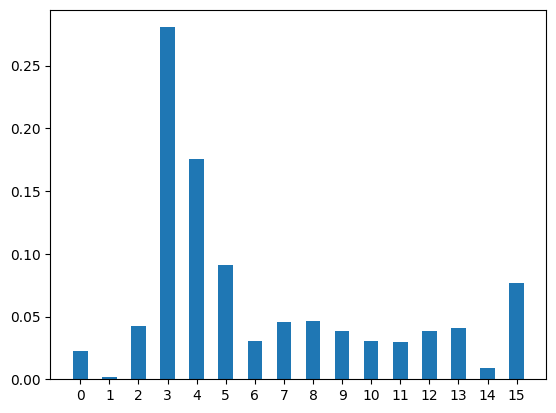



>>> Job ID: claqpobk8l5ohotbt5mg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01516, 13: 0.02672, 15: 0.0144, 10: 0.03018, 11: 0.02367, 9: 0.03756, 12: 0.01949, 5: 0.05519, 4: 0.23737, 6: 0.04453, 2: 0.02886, 8: 0.0515, 14: 0.04565, 7: 0.06586, 0: 0.07071, 3: 0.23315}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01516, 13: 0.02672, 15: 0.0144, 10: 0.03018, 11: 0.02367, 9: 0.03756, 12: 0.01949, 5: 0.05519, 4: 0.23737, 6: 0.04453, 2: 0.02886, 8: 0.0515, 14: 0.04565, 7: 0.06586, 0: 0.07071, 3: 0.23315}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
19
{1: 0.01516, 13: 0.02672, 15: 0.0144, 10: 0.03018, 11: 0.02367, 9: 0.03756, 12: 0.01949, 5: 0.05519, 4: 0.23737, 6: 0.04453, 2: 0.02886, 8: 0.0515, 14: 0.04565, 7: 0.06586, 0: 0.07071, 3: 0.23315}
variance :  0.00453447945
entropy :  2.3573890712389907


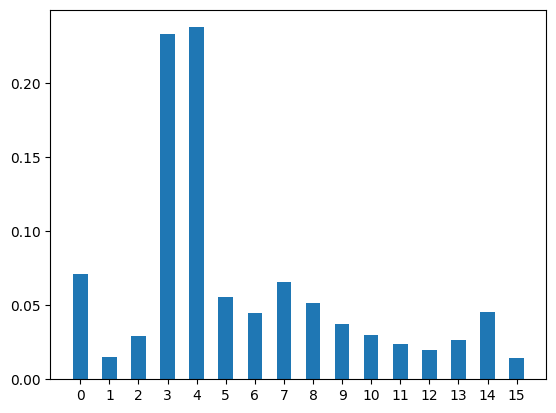



>>> Job ID: claqpp5r12tet1q0j9kg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.01966, 9: 0.03254, 14: 0.01473, 11: 0.03061, 8: 0.04223, 2: 0.02827, 1: 0.06584, 15: 0.04218, 10: 0.03133, 0: 0.02697, 3: 0.1782, 7: 0.07373, 6: 0.07665, 4: 0.28066, 5: 0.02864, 12: 0.02776}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.01966, 9: 0.03254, 14: 0.01473, 11: 0.03061, 8: 0.04223, 2: 0.02827, 1: 0.06584, 15: 0.04218, 10: 0.03133, 0: 0.02697, 3: 0.1782, 7: 0.07373, 6: 0.07665, 4: 0.28066, 5: 0.02864, 12: 0.02776}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
20
{13: 0.01966, 9: 0.03254, 14: 0.01473, 11: 0.03061, 8: 0.04223, 2: 0.02827, 1: 0.06584, 15: 0.04218, 10: 0.03133, 0: 0.02697, 3: 0.1782, 7: 0.07373, 6: 0.07665, 4: 0.28066, 5: 0.02864, 12: 0.02776}
variance :  0.00462077275
entropy :  2.3649509806875577


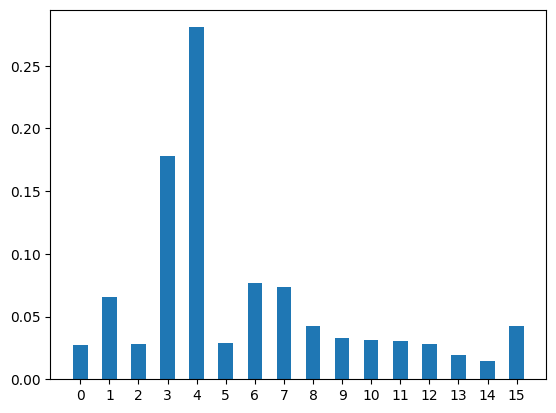



>>> Job ID: claqppllqrutvh0h76lg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.03003, 9: 0.02812, 0: 0.02896, 3: 0.1507, 7: 0.05822, 14: 0.02903, 1: 0.03835, 12: 0.03073, 5: 0.02752, 8: 0.02901, 15: 0.01191, 10: 0.03057, 4: 0.30977, 6: 0.10621, 13: 0.03324, 2: 0.05763}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.03003, 9: 0.02812, 0: 0.02896, 3: 0.1507, 7: 0.05822, 14: 0.02903, 1: 0.03835, 12: 0.03073, 5: 0.02752, 8: 0.02901, 15: 0.01191, 10: 0.03057, 4: 0.30977, 6: 0.10621, 13: 0.03324, 2: 0.05763}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
21
{11: 0.03003, 9: 0.02812, 0: 0.02896, 3: 0.1507, 7: 0.05822, 14: 0.02903, 1: 0.03835, 12: 0.03073, 5: 0.02752, 8: 0.02901, 15: 0.01191, 10: 0.03057, 4: 0.30977, 6: 0.10621, 13: 0.03324, 2: 0.05763}
variance :  0.0052330316625
entropy :  2.3335928333904192


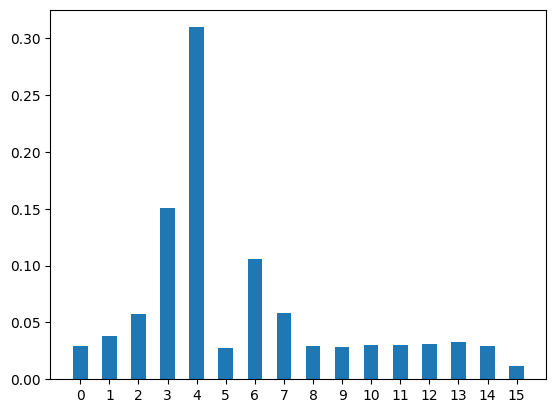



>>> Job ID: claqpqapen43j46fdhig
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.024, 11: 0.03034, 14: 0.02881, 7: 0.03683, 0: 0.01929, 3: 0.15284, 9: 0.03711, 1: 0.01703, 12: 0.02559, 5: 0.04817, 8: 0.02836, 10: 0.0352, 15: 0.0347, 6: 0.11543, 4: 0.29074, 2: 0.07556}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.024, 11: 0.03034, 14: 0.02881, 7: 0.03683, 0: 0.01929, 3: 0.15284, 9: 0.03711, 1: 0.01703, 12: 0.02559, 5: 0.04817, 8: 0.02836, 10: 0.0352, 15: 0.0347, 6: 0.11543, 4: 0.29074, 2: 0.07556}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
22
{13: 0.024, 11: 0.03034, 14: 0.02881, 7: 0.03683, 0: 0.01929, 3: 0.15284, 9: 0.03711, 1: 0.01703, 12: 0.02559, 5: 0.04817, 8: 0.02836, 10: 0.0352, 15: 0.0347, 6: 0.11543, 4: 0.29074, 2: 0.07556}
variance :  0.004773005375
entropy :  2.3531009663735576


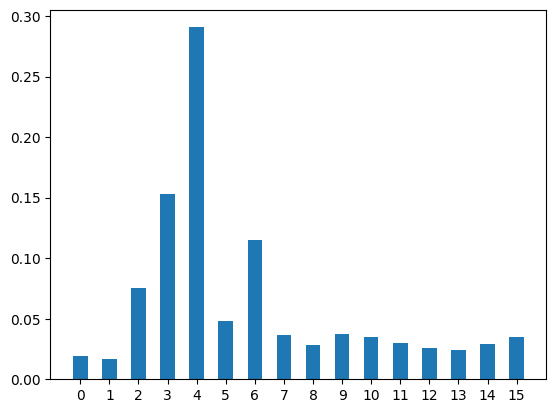



>>> Job ID: claqpr5lqrutvh0h771g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00312, 14: 0.01787, 11: 0.03017, 15: 0.01845, 10: 0.038, 13: 0.02182, 8: 0.04458, 1: 0.03217, 9: 0.04844, 12: 0.02501, 5: 0.12161, 7: 0.02398, 0: 0.03283, 3: 0.10158, 4: 0.34059, 6: 0.09978}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00312, 14: 0.01787, 11: 0.03017, 15: 0.01845, 10: 0.038, 13: 0.02182, 8: 0.04458, 1: 0.03217, 9: 0.04844, 12: 0.02501, 5: 0.12161, 7: 0.02398, 0: 0.03283, 3: 0.10158, 4: 0.34059, 6: 0.09978}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
23
{2: 0.00312, 14: 0.01787, 11: 0.03017, 15: 0.01845, 10: 0.038, 13: 0.02182, 8: 0.04458, 1: 0.03217, 9: 0.04844, 12: 0.02501, 5: 0.12161, 7: 0.02398, 0: 0.03283, 3: 0.10158, 4: 0.34059, 6: 0.09978}
variance :  0.006231998024999999
entropy :  2.2520185239224206


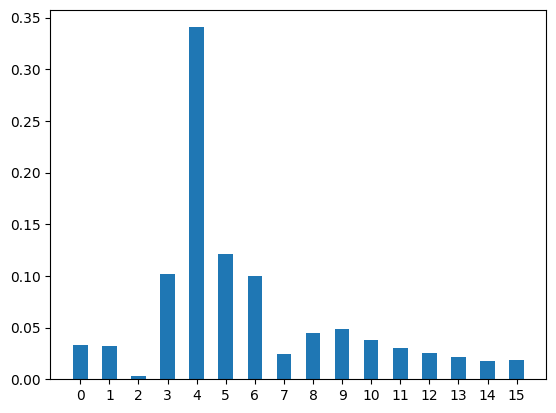



>>> Job ID: claqprrk8l5ohotbt6c0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.06529, 2: 0.03363, 14: 0.02412, 1: 0.02202, 15: 0.01919, 10: 0.03309, 6: 0.06996, 4: 0.33958, 11: 0.02579, 13: 0.02598, 12: 0.02572, 5: 0.12336, 0: 0.01233, 7: 0.03471, 3: 0.09568, 9: 0.04955}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.06529, 2: 0.03363, 14: 0.02412, 1: 0.02202, 15: 0.01919, 10: 0.03309, 6: 0.06996, 4: 0.33958, 11: 0.02579, 13: 0.02598, 12: 0.02572, 5: 0.12336, 0: 0.01233, 7: 0.03471, 3: 0.09568, 9: 0.04955}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
24
{8: 0.06529, 2: 0.03363, 14: 0.02412, 1: 0.02202, 15: 0.01919, 10: 0.03309, 6: 0.06996, 4: 0.33958, 11: 0.02579, 13: 0.02598, 12: 0.02572, 5: 0.12336, 0: 0.01233, 7: 0.03471, 3: 0.09568, 9: 0.04955}
variance :  0.005988660525
entropy :  2.293358270083438


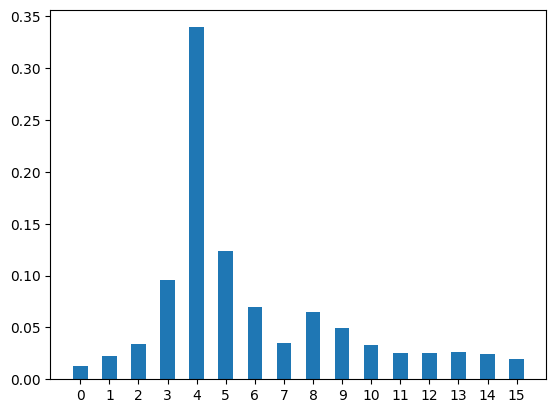



>>> Job ID: claqpss46cn44kd6uvag
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.03491, 2: 0.01909, 11: 0.02373, 1: 0.01421, 6: 0.08281, 4: 0.15997, 10: 0.02281, 15: 0.02738, 12: 0.02589, 5: 0.30771, 8: 0.0715, 13: 0.02629, 0: 0.02488, 3: 0.08572, 7: 0.04695, 14: 0.02615}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.03491, 2: 0.01909, 11: 0.02373, 1: 0.01421, 6: 0.08281, 4: 0.15997, 10: 0.02281, 15: 0.02738, 12: 0.02589, 5: 0.30771, 8: 0.0715, 13: 0.02629, 0: 0.02488, 3: 0.08572, 7: 0.04695, 14: 0.02615}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
25
{9: 0.03491, 2: 0.01909, 11: 0.02373, 1: 0.01421, 6: 0.08281, 4: 0.15997, 10: 0.02281, 15: 0.02738, 12: 0.02589, 5: 0.30771, 8: 0.0715, 13: 0.02629, 0: 0.02488, 3: 0.08572, 7: 0.04695, 14: 0.02615}
variance :  0.005348764924999999
entropy :  2.309066075758971


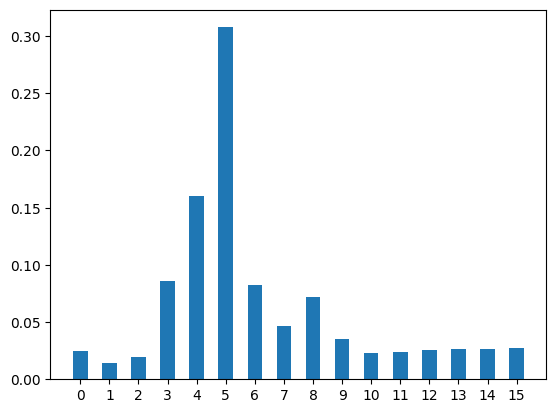



>>> Job ID: claqptdr12tet1q0jadg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.02493, 1: 0.02846, 8: 0.0585, 14: 0.0214, 11: 0.0301, 6: 0.01393, 4: 0.22852, 10: 0.02558, 15: 0.02019, 12: 0.02839, 5: 0.30754, 3: 0.00444, 0: 0.02387, 7: 0.13064, 2: 0.03152, 9: 0.02199}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.02493, 1: 0.02846, 8: 0.0585, 14: 0.0214, 11: 0.0301, 6: 0.01393, 4: 0.22852, 10: 0.02558, 15: 0.02019, 12: 0.02839, 5: 0.30754, 3: 0.00444, 0: 0.02387, 7: 0.13064, 2: 0.03152, 9: 0.02199}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
26
{13: 0.02493, 1: 0.02846, 8: 0.0585, 14: 0.0214, 11: 0.0301, 6: 0.01393, 4: 0.22852, 10: 0.02558, 15: 0.02019, 12: 0.02839, 5: 0.30754, 3: 0.00444, 0: 0.02387, 7: 0.13064, 2: 0.03152, 9: 0.02199}
variance :  0.0069822074125
entropy :  2.1523021790302543


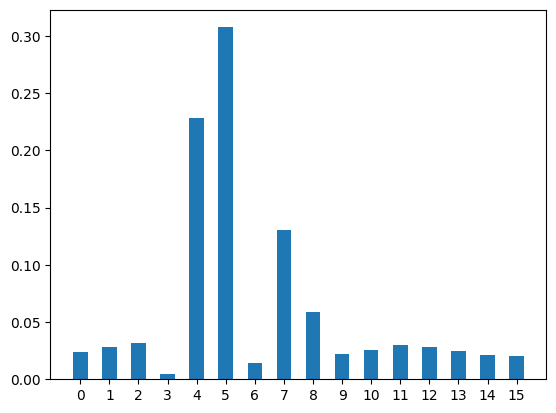



>>> Job ID: claqpudr12tet1q0jai0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.02576, 1: 0.01495, 9: 0.02962, 14: 0.02278, 8: 0.03081, 3: 0.03413, 0: 0.01598, 7: 0.1338, 12: 0.03093, 5: 0.2217, 11: 0.0379, 10: 0.038, 15: 0.01879, 4: 0.22386, 6: 0.09849, 2: 0.0225}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.02576, 1: 0.01495, 9: 0.02962, 14: 0.02278, 8: 0.03081, 3: 0.03413, 0: 0.01598, 7: 0.1338, 12: 0.03093, 5: 0.2217, 11: 0.0379, 10: 0.038, 15: 0.01879, 4: 0.22386, 6: 0.09849, 2: 0.0225}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
27
{13: 0.02576, 1: 0.01495, 9: 0.02962, 14: 0.02278, 8: 0.03081, 3: 0.03413, 0: 0.01598, 7: 0.1338, 12: 0.03093, 5: 0.2217, 11: 0.0379, 10: 0.038, 15: 0.01879, 4: 0.22386, 6: 0.09849, 2: 0.0225}
variance :  0.0046072578125
entropy :  2.3183858435382554


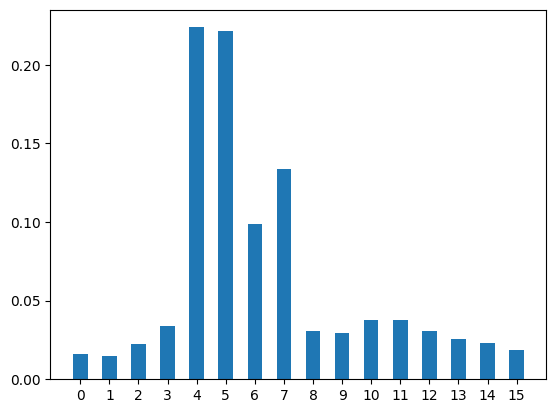



>>> Job ID: claqpv2pen43j46fdieg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.0089, 9: 0.02387, 1: 0.01792, 13: 0.02266, 8: 0.11561, 14: 0.02099, 11: 0.03625, 12: 0.02541, 5: 0.23503, 3: 0.03913, 7: 0.1199, 0: 0.02122, 10: 0.05281, 15: 0.02146, 6: 0.09761, 4: 0.14123}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.0089, 9: 0.02387, 1: 0.01792, 13: 0.02266, 8: 0.11561, 14: 0.02099, 11: 0.03625, 12: 0.02541, 5: 0.23503, 3: 0.03913, 7: 0.1199, 0: 0.02122, 10: 0.05281, 15: 0.02146, 6: 0.09761, 4: 0.14123}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
28
{2: 0.0089, 9: 0.02387, 1: 0.01792, 13: 0.02266, 8: 0.11561, 14: 0.02099, 11: 0.03625, 12: 0.02541, 5: 0.23503, 3: 0.03913, 7: 0.1199, 0: 0.02122, 10: 0.05281, 15: 0.02146, 6: 0.09761, 4: 0.14123}
variance :  0.0036918237874999996
entropy :  2.377711413152087


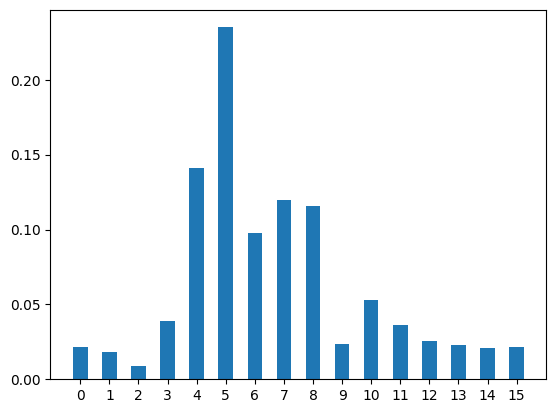



>>> Job ID: claqq03k8l5ohotbt75g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.02165, 8: 0.01401, 1: 0.02378, 9: 0.12418, 4: 0.04034, 6: 0.09303, 2: 0.02069, 13: 0.0212, 0: 0.02198, 7: 0.12598, 3: 0.04223, 12: 0.02178, 5: 0.3337, 11: 0.02436, 10: 0.04938, 15: 0.02171}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.02165, 8: 0.01401, 1: 0.02378, 9: 0.12418, 4: 0.04034, 6: 0.09303, 2: 0.02069, 13: 0.0212, 0: 0.02198, 7: 0.12598, 3: 0.04223, 12: 0.02178, 5: 0.3337, 11: 0.02436, 10: 0.04938, 15: 0.02171}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
29
{14: 0.02165, 8: 0.01401, 1: 0.02378, 9: 0.12418, 4: 0.04034, 6: 0.09303, 2: 0.02069, 13: 0.0212, 0: 0.02198, 7: 0.12598, 3: 0.04223, 12: 0.02178, 5: 0.3337, 11: 0.02436, 10: 0.04938, 15: 0.02171}
variance :  0.0061738253875
entropy :  2.25341520683804


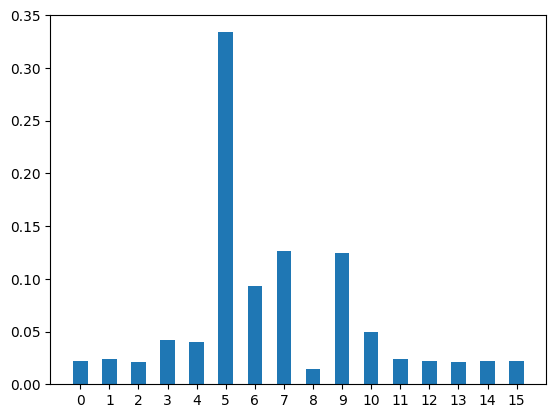



>>> Job ID: claqq0k46cn44kd6v060
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.02037, 13: 0.02648, 6: 0.07588, 4: 0.05827, 14: 0.02476, 15: 0.02161, 10: 0.03297, 11: 0.03514, 9: 0.12463, 12: 0.02184, 5: 0.33346, 8: 0.03185, 1: 0.01744, 0: 0.01896, 3: 0.02985, 7: 0.12649}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.02037, 13: 0.02648, 6: 0.07588, 4: 0.05827, 14: 0.02476, 15: 0.02161, 10: 0.03297, 11: 0.03514, 9: 0.12463, 12: 0.02184, 5: 0.33346, 8: 0.03185, 1: 0.01744, 0: 0.01896, 3: 0.02985, 7: 0.12649}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
30
{2: 0.02037, 13: 0.02648, 6: 0.07588, 4: 0.05827, 14: 0.02476, 15: 0.02161, 10: 0.03297, 11: 0.03514, 9: 0.12463, 12: 0.02184, 5: 0.33346, 8: 0.03185, 1: 0.01744, 0: 0.01896, 3: 0.02985, 7: 0.12649}
variance :  0.006059073699999999
entropy :  2.2725730726562374


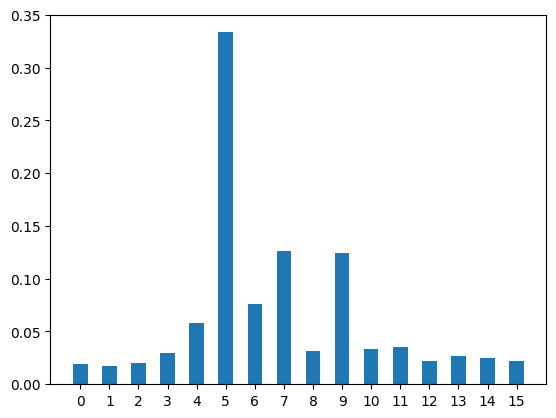



>>> Job ID: claqq1k46cn44kd6v0d0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.03125, 11: 0.00643, 3: 0.00608, 0: 0.01945, 7: 0.01856, 2: 0.01695, 14: 0.0265, 9: 0.03422, 12: 0.0436, 5: 0.23497, 8: 0.13759, 1: 0.0161, 15: 0.02177, 10: 0.13268, 6: 0.16767, 4: 0.08618}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.03125, 11: 0.00643, 3: 0.00608, 0: 0.01945, 7: 0.01856, 2: 0.01695, 14: 0.0265, 9: 0.03422, 12: 0.0436, 5: 0.23497, 8: 0.13759, 1: 0.0161, 15: 0.02177, 10: 0.13268, 6: 0.16767, 4: 0.08618}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
31
{13: 0.03125, 11: 0.00643, 3: 0.00608, 0: 0.01945, 7: 0.01856, 2: 0.01695, 14: 0.0265, 9: 0.03422, 12: 0.0436, 5: 0.23497, 8: 0.13759, 1: 0.0161, 15: 0.02177, 10: 0.13268, 6: 0.16767, 4: 0.08618}
variance :  0.0044599016500000005
entropy :  2.2814749408700212


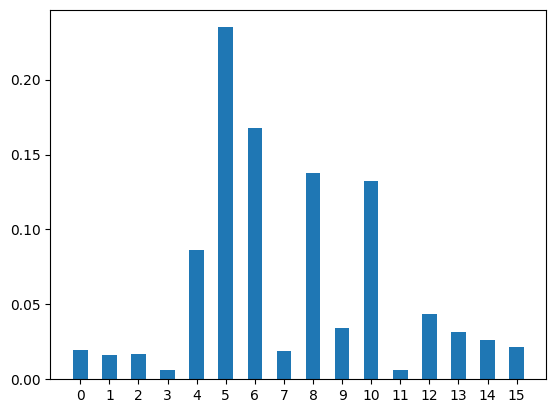



>>> Job ID: claqq2ipen43j46fdj2g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{15: 0.01879, 10: 0.01069, 7: 0.00197, 3: 0.00905, 0: 0.01954, 1: 0.01874, 14: 0.02219, 13: 0.02787, 11: 0.12738, 12: 0.04639, 5: 0.11388, 8: 0.14058, 2: 0.01978, 4: 0.08431, 6: 0.28771, 9: 0.05113}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {15: 0.01879, 10: 0.01069, 7: 0.00197, 3: 0.00905, 0: 0.01954, 1: 0.01874, 14: 0.02219, 13: 0.02787, 11: 0.12738, 12: 0.04639, 5: 0.11388, 8: 0.14058, 2: 0.01978, 4: 0.08431, 6: 0.28771, 9: 0.05113}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
32
{15: 0.01879, 10: 0.01069, 7: 0.00197, 3: 0.00905, 0: 0.01954, 1: 0.01874, 14: 0.02219, 13: 0.02787, 11: 0.12738, 12: 0.04639, 5: 0.11388, 8: 0.14058, 2: 0.01978, 4: 0.08431, 6: 0.28771, 9: 0.05113}
variance :  0.0052534430375000005
entropy :  2.238491516557576


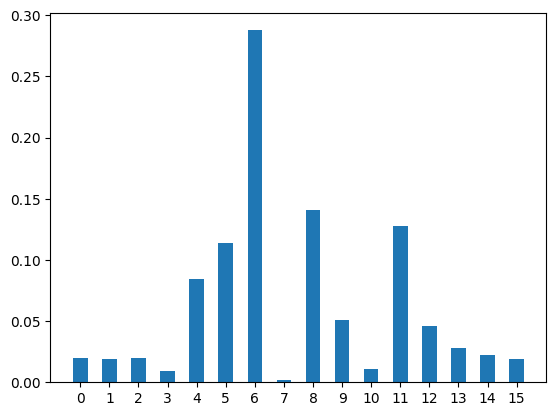



>>> Job ID: claqq3ktstu8k2fv66cg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01887, 14: 0.01205, 8: 0.11936, 11: 0.0899, 7: 0.00254, 3: 0.01963, 0: 0.01866, 13: 0.05075, 2: 0.01998, 4: 0.0601, 6: 0.32635, 10: 0.01042, 15: 0.02049, 5: 0.10611, 12: 0.05329, 9: 0.0715}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01887, 14: 0.01205, 8: 0.11936, 11: 0.0899, 7: 0.00254, 3: 0.01963, 0: 0.01866, 13: 0.05075, 2: 0.01998, 4: 0.0601, 6: 0.32635, 10: 0.01042, 15: 0.02049, 5: 0.10611, 12: 0.05329, 9: 0.0715}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
33
{1: 0.01887, 14: 0.01205, 8: 0.11936, 11: 0.0899, 7: 0.00254, 3: 0.01963, 0: 0.01866, 13: 0.05075, 2: 0.01998, 4: 0.0601, 6: 0.32635, 10: 0.01042, 15: 0.02049, 5: 0.10611, 12: 0.05329, 9: 0.0715}
variance :  0.005868812574999998
entropy :  2.2390881303799968


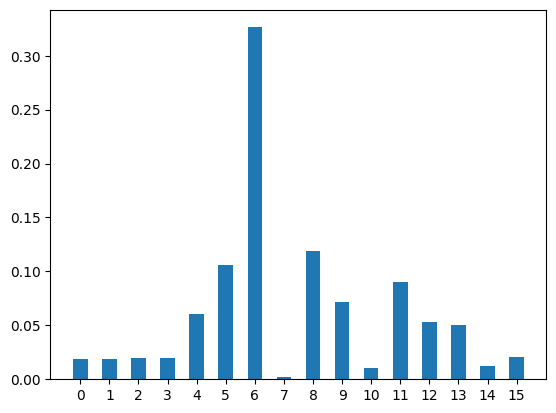



>>> Job ID: claqq4llqrutvh0h78i0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00463, 2: 0.01652, 1: 0.01997, 8: 0.05081, 15: 0.01829, 10: 0.07819, 14: 0.05286, 4: 0.01972, 6: 0.27469, 11: 0.03644, 9: 0.07187, 12: 0.10622, 5: 0.15076, 0: 0.02183, 3: 0.02116, 7: 0.05604}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00463, 2: 0.01652, 1: 0.01997, 8: 0.05081, 15: 0.01829, 10: 0.07819, 14: 0.05286, 4: 0.01972, 6: 0.27469, 11: 0.03644, 9: 0.07187, 12: 0.10622, 5: 0.15076, 0: 0.02183, 3: 0.02116, 7: 0.05604}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
34
{13: 0.00463, 2: 0.01652, 1: 0.01997, 8: 0.05081, 15: 0.01829, 10: 0.07819, 14: 0.05286, 4: 0.01972, 6: 0.27469, 11: 0.03644, 9: 0.07187, 12: 0.10622, 5: 0.15076, 0: 0.02183, 3: 0.02116, 7: 0.05604}
variance :  0.00440186695
entropy :  2.342351845584285


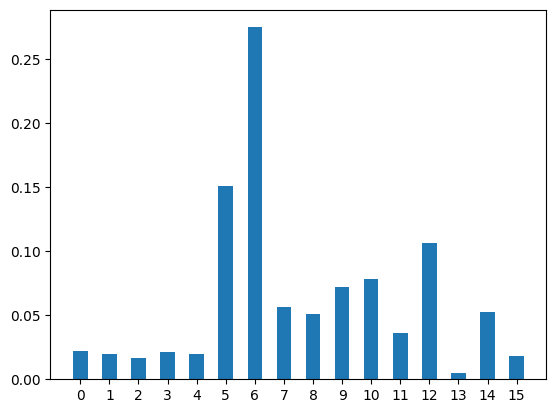



>>> Job ID: claqq5c46cn44kd6v13g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.03628, 2: 0.01713, 11: 0.02423, 1: 0.01935, 8: 0.06174, 13: 0.1068, 4: 0.0002, 6: 0.17619, 10: 0.11261, 15: 0.03824, 0: 0.02193, 3: 0.0212, 7: 0.1313, 9: 0.03855, 12: 0.02675, 5: 0.1675}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.03628, 2: 0.01713, 11: 0.02423, 1: 0.01935, 8: 0.06174, 13: 0.1068, 4: 0.0002, 6: 0.17619, 10: 0.11261, 15: 0.03824, 0: 0.02193, 3: 0.0212, 7: 0.1313, 9: 0.03855, 12: 0.02675, 5: 0.1675}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
35
{14: 0.03628, 2: 0.01713, 11: 0.02423, 1: 0.01935, 8: 0.06174, 13: 0.1068, 4: 0.0002, 6: 0.17619, 10: 0.11261, 15: 0.03824, 0: 0.02193, 3: 0.0212, 7: 0.1313, 9: 0.03855, 12: 0.02675, 5: 0.1675}
variance :  0.0030564683750000004
entropy :  2.3993317922208455


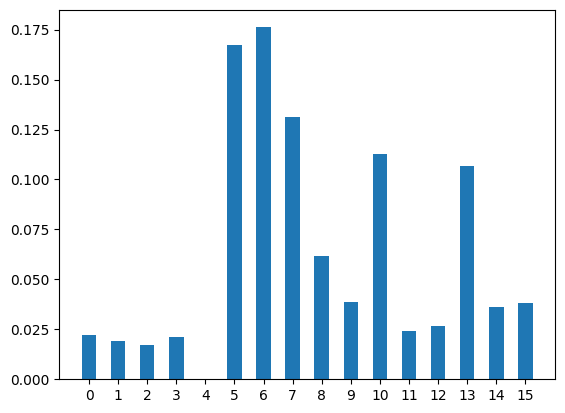



>>> Job ID: claqq6bk8l5ohotbt89g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.03659, 2: 0.01677, 1: 0.02006, 13: 0.0569, 6: 0.14407, 4: 0.0089, 14: 0.06558, 8: 0.07426, 12: 0.01405, 5: 0.13793, 10: 0.11227, 15: 0.06873, 0: 0.01411, 3: 0.02017, 7: 0.18515, 11: 0.02446}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.03659, 2: 0.01677, 1: 0.02006, 13: 0.0569, 6: 0.14407, 4: 0.0089, 14: 0.06558, 8: 0.07426, 12: 0.01405, 5: 0.13793, 10: 0.11227, 15: 0.06873, 0: 0.01411, 3: 0.02017, 7: 0.18515, 11: 0.02446}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
36
{9: 0.03659, 2: 0.01677, 1: 0.02006, 13: 0.0569, 6: 0.14407, 4: 0.0089, 14: 0.06558, 8: 0.07426, 12: 0.01405, 5: 0.13793, 10: 0.11227, 15: 0.06873, 0: 0.01411, 3: 0.02017, 7: 0.18515, 11: 0.02446}
variance :  0.0028403701125000002
entropy :  2.42863215988888


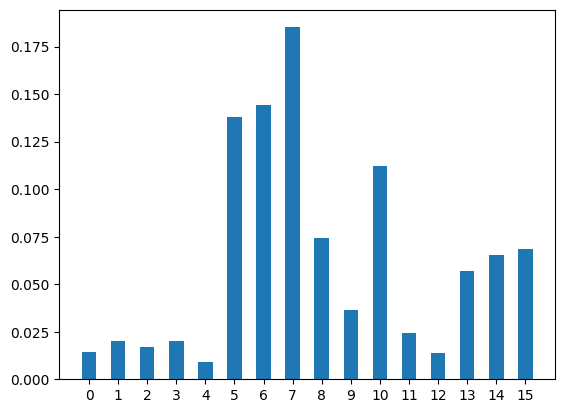



>>> Job ID: claqq7c46cn44kd6v1jg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00574, 2: 0.01997, 9: 0.03231, 13: 0.06314, 11: 0.07086, 4: 0.0241, 6: 0.1973, 14: 0.05869, 15: 0.01392, 10: 0.06475, 8: 0.06928, 12: 0.02079, 5: 0.0776, 3: 0.01631, 7: 0.19096, 0: 0.07428}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00574, 2: 0.01997, 9: 0.03231, 13: 0.06314, 11: 0.07086, 4: 0.0241, 6: 0.1973, 14: 0.05869, 15: 0.01392, 10: 0.06475, 8: 0.06928, 12: 0.02079, 5: 0.0776, 3: 0.01631, 7: 0.19096, 0: 0.07428}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
37
{1: 0.00574, 2: 0.01997, 9: 0.03231, 13: 0.06314, 11: 0.07086, 4: 0.0241, 6: 0.1973, 14: 0.05869, 15: 0.01392, 10: 0.06475, 8: 0.06928, 12: 0.02079, 5: 0.0776, 3: 0.01631, 7: 0.19096, 0: 0.07428}
variance :  0.0030515867124999998
entropy :  2.434079943652985


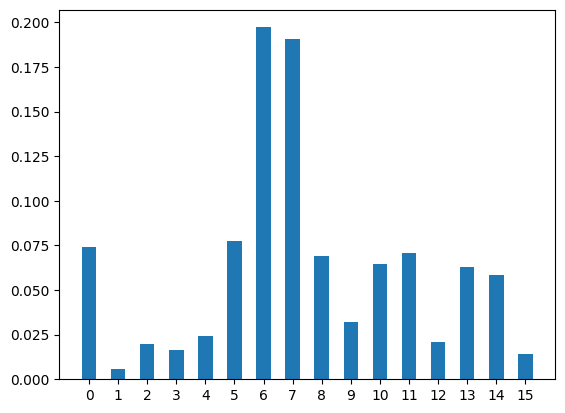



>>> Job ID: claqq8446cn44kd6v1ng
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.06305, 2: 0.01359, 13: 0.00961, 8: 0.06279, 14: 0.06634, 11: 0.07227, 5: 0.02141, 12: 0.07703, 9: 0.08324, 10: 0.0061, 15: 0.05517, 4: 0.02989, 6: 0.25236, 0: 0.02074, 3: 0.01644, 7: 0.14997}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.06305, 2: 0.01359, 13: 0.00961, 8: 0.06279, 14: 0.06634, 11: 0.07227, 5: 0.02141, 12: 0.07703, 9: 0.08324, 10: 0.0061, 15: 0.05517, 4: 0.02989, 6: 0.25236, 0: 0.02074, 3: 0.01644, 7: 0.14997}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
38
{1: 0.06305, 2: 0.01359, 13: 0.00961, 8: 0.06279, 14: 0.06634, 11: 0.07227, 5: 0.02141, 12: 0.07703, 9: 0.08324, 10: 0.0061, 15: 0.05517, 4: 0.02989, 6: 0.25236, 0: 0.02074, 3: 0.01644, 7: 0.14997}
variance :  0.0037181952874999987
entropy :  2.3834818073538684


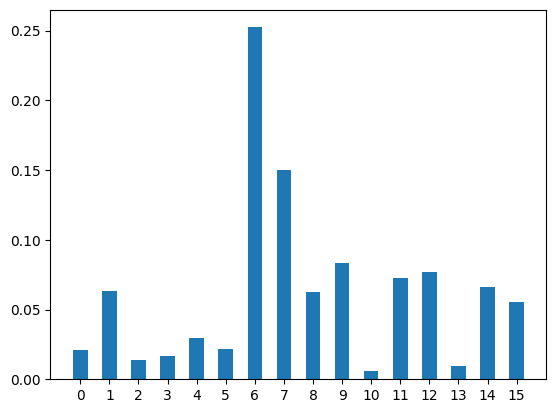



>>> Job ID: claqq9446cn44kd6v1t0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00856, 11: 0.06731, 2: 0.03202, 10: 0.00251, 15: 0.065, 13: 0.01411, 1: 0.06209, 5: 0.00359, 12: 0.08135, 9: 0.14256, 4: 0.02915, 6: 0.25216, 3: 0.01749, 7: 0.12145, 0: 0.04963, 8: 0.05102}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00856, 11: 0.06731, 2: 0.03202, 10: 0.00251, 15: 0.065, 13: 0.01411, 1: 0.06209, 5: 0.00359, 12: 0.08135, 9: 0.14256, 4: 0.02915, 6: 0.25216, 3: 0.01749, 7: 0.12145, 0: 0.04963, 8: 0.05102}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
39
{14: 0.00856, 11: 0.06731, 2: 0.03202, 10: 0.00251, 15: 0.065, 13: 0.01411, 1: 0.06209, 5: 0.00359, 12: 0.08135, 9: 0.14256, 4: 0.02915, 6: 0.25216, 3: 0.01749, 7: 0.12145, 0: 0.04963, 8: 0.05102}
variance :  0.0039328364125
entropy :  2.338102369625308


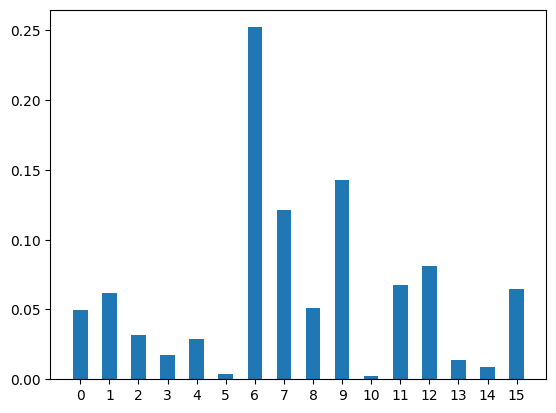



>>> Job ID: claqqa3k8l5ohotbt940
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01825, 11: 0.05264, 14: 0.00787, 8: 0.05474, 9: 0.15451, 13: 0.02887, 2: 0.093, 4: 0.0289, 6: 0.19121, 5: 0.01596, 12: 0.08319, 10: 0.00299, 15: 0.05505, 3: 0.00518, 0: 0.04511, 7: 0.16253}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01825, 11: 0.05264, 14: 0.00787, 8: 0.05474, 9: 0.15451, 13: 0.02887, 2: 0.093, 4: 0.0289, 6: 0.19121, 5: 0.01596, 12: 0.08319, 10: 0.00299, 15: 0.05505, 3: 0.00518, 0: 0.04511, 7: 0.16253}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
40
{1: 0.01825, 11: 0.05264, 14: 0.00787, 8: 0.05474, 9: 0.15451, 13: 0.02887, 2: 0.093, 4: 0.0289, 6: 0.19121, 5: 0.01596, 12: 0.08319, 10: 0.00299, 15: 0.05505, 3: 0.00518, 0: 0.04511, 7: 0.16253}
variance :  0.0033192008375
entropy :  2.3679805850301725


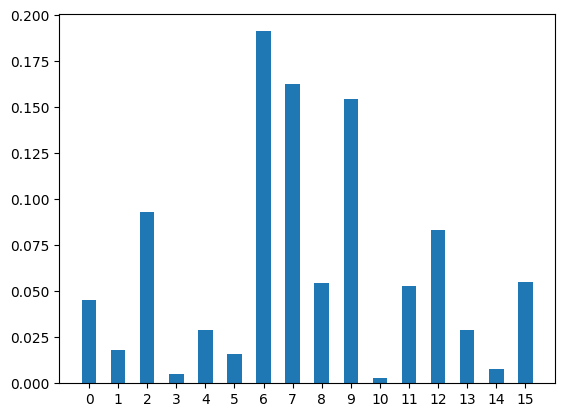



>>> Job ID: claqqb5r12tet1q0jd0g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00515, 1: 0.0185, 15: 0.02261, 10: 0.03513, 12: 0.03677, 5: 0.04315, 11: 0.0262, 4: 0.00178, 6: 0.10458, 8: 0.05576, 14: 0.03356, 13: 0.07274, 0: 0.0783, 3: 0.09236, 7: 0.2519, 9: 0.12151}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00515, 1: 0.0185, 15: 0.02261, 10: 0.03513, 12: 0.03677, 5: 0.04315, 11: 0.0262, 4: 0.00178, 6: 0.10458, 8: 0.05576, 14: 0.03356, 13: 0.07274, 0: 0.0783, 3: 0.09236, 7: 0.2519, 9: 0.12151}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
41
{2: 0.00515, 1: 0.0185, 15: 0.02261, 10: 0.03513, 12: 0.03677, 5: 0.04315, 11: 0.0262, 4: 0.00178, 6: 0.10458, 8: 0.05576, 14: 0.03356, 13: 0.07274, 0: 0.0783, 3: 0.09236, 7: 0.2519, 9: 0.12151}
variance :  0.0035537968875000007
entropy :  2.392542831598153


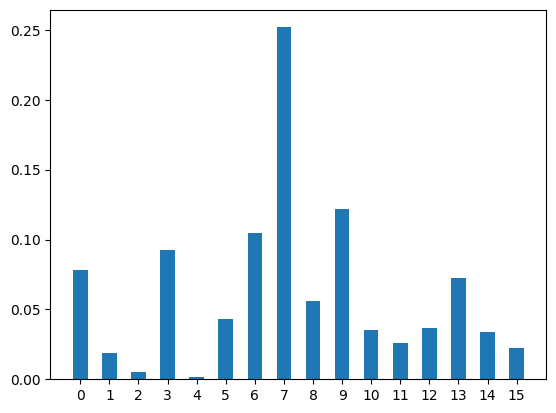



>>> Job ID: claqqc4tstu8k2fv67tg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{12: 0.00764, 5: 0.0452, 13: 0.07211, 1: 0.07885, 10: 0.09276, 15: 0.00886, 14: 0.06247, 2: 0.01528, 0: 0.02006, 3: 0.03371, 7: 0.31101, 11: 0.04121, 6: 0.04091, 4: 0.06415, 9: 0.05944, 8: 0.04634}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {12: 0.00764, 5: 0.0452, 13: 0.07211, 1: 0.07885, 10: 0.09276, 15: 0.00886, 14: 0.06247, 2: 0.01528, 0: 0.02006, 3: 0.03371, 7: 0.31101, 11: 0.04121, 6: 0.04091, 4: 0.06415, 9: 0.05944, 8: 0.04634}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
42
{12: 0.00764, 5: 0.0452, 13: 0.07211, 1: 0.07885, 10: 0.09276, 15: 0.00886, 14: 0.06247, 2: 0.01528, 0: 0.02006, 3: 0.03371, 7: 0.31101, 11: 0.04121, 6: 0.04091, 4: 0.06415, 9: 0.05944, 8: 0.04634}
variance :  0.004704443275
entropy :  2.371113755910906


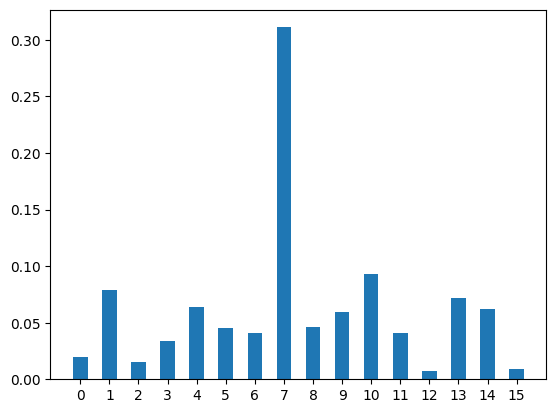



>>> Job ID: claqqd2pen43j46fdl20
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.01204, 11: 0.05416, 1: 0.03716, 6: 0.02711, 4: 0.06752, 15: 0.00867, 10: 0.13666, 2: 0.06171, 13: 0.07244, 0: 0.00769, 3: 0.01259, 7: 0.30811, 14: 0.0634, 8: 0.0659, 12: 0.00759, 5: 0.05725}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.01204, 11: 0.05416, 1: 0.03716, 6: 0.02711, 4: 0.06752, 15: 0.00867, 10: 0.13666, 2: 0.06171, 13: 0.07244, 0: 0.00769, 3: 0.01259, 7: 0.30811, 14: 0.0634, 8: 0.0659, 12: 0.00759, 5: 0.05725}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
43
{9: 0.01204, 11: 0.05416, 1: 0.03716, 6: 0.02711, 4: 0.06752, 15: 0.00867, 10: 0.13666, 2: 0.06171, 13: 0.07244, 0: 0.00769, 3: 0.01259, 7: 0.30811, 14: 0.0634, 8: 0.0659, 12: 0.00759, 5: 0.05725}
variance :  0.005119174650000001
entropy :  2.2986172754759315


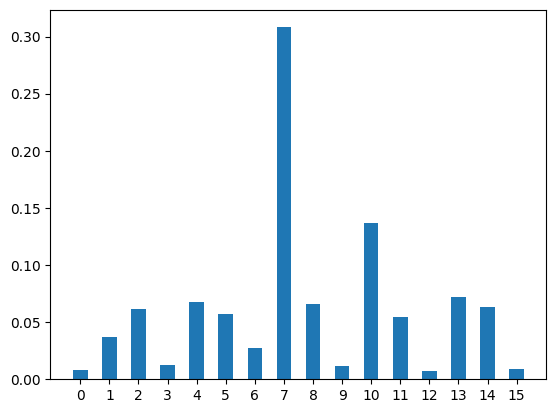



>>> Job ID: claqqedr12tet1q0jdn0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00094, 13: 0.04267, 4: 0.00056, 6: 0.02752, 12: 0.00873, 5: 0.1245, 2: 0.0526, 1: 0.03999, 8: 0.13341, 0: 0.00624, 3: 0.02446, 7: 0.23975, 15: 0.0389, 10: 0.14754, 14: 0.06285, 11: 0.04934}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00094, 13: 0.04267, 4: 0.00056, 6: 0.02752, 12: 0.00873, 5: 0.1245, 2: 0.0526, 1: 0.03999, 8: 0.13341, 0: 0.00624, 3: 0.02446, 7: 0.23975, 15: 0.0389, 10: 0.14754, 14: 0.06285, 11: 0.04934}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
44
{9: 0.00094, 13: 0.04267, 4: 0.00056, 6: 0.02752, 12: 0.00873, 5: 0.1245, 2: 0.0526, 1: 0.03999, 8: 0.13341, 0: 0.00624, 3: 0.02446, 7: 0.23975, 15: 0.0389, 10: 0.14754, 14: 0.06285, 11: 0.04934}
variance :  0.0041001899375
entropy :  2.293218782236885


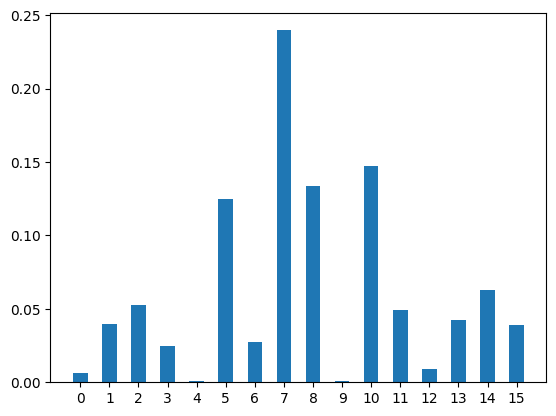



>>> Job ID: claqqfllqrutvh0h7aog
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00076, 13: 0.01025, 1: 0.00721, 14: 0.03255, 2: 0.04963, 4: 0.00057, 6: 0.13596, 10: 0.11324, 15: 0.06891, 0: 0.03919, 3: 0.0565, 7: 0.13387, 8: 0.25739, 5: 0.00021, 12: 0.04228, 11: 0.05148}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00076, 13: 0.01025, 1: 0.00721, 14: 0.03255, 2: 0.04963, 4: 0.00057, 6: 0.13596, 10: 0.11324, 15: 0.06891, 0: 0.03919, 3: 0.0565, 7: 0.13387, 8: 0.25739, 5: 0.00021, 12: 0.04228, 11: 0.05148}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
45
{9: 0.00076, 13: 0.01025, 1: 0.00721, 14: 0.03255, 2: 0.04963, 4: 0.00057, 6: 0.13596, 10: 0.11324, 15: 0.06891, 0: 0.03919, 3: 0.0565, 7: 0.13387, 8: 0.25739, 5: 0.00021, 12: 0.04228, 11: 0.05148}
variance :  0.0044108952374999994
entropy :  2.2511150928334356


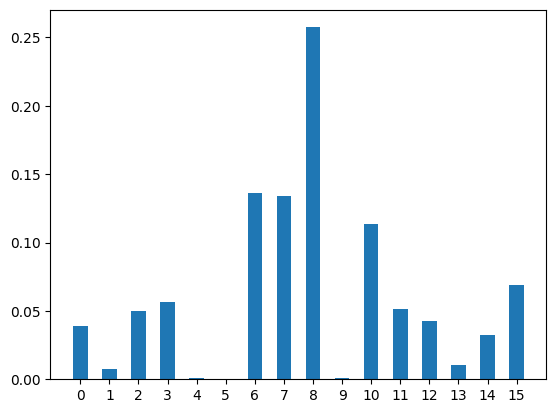



>>> Job ID: claqqgs46cn44kd6v3fg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00058, 2: 0.00487, 13: 0.00873, 1: 0.00858, 14: 0.02199, 5: 0.00037, 12: 0.08751, 11: 0.0603, 3: 0.05061, 0: 0.05091, 7: 0.13403, 10: 0.05688, 15: 0.06979, 6: 0.11013, 4: 0.0577, 8: 0.27702}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00058, 2: 0.00487, 13: 0.00873, 1: 0.00858, 14: 0.02199, 5: 0.00037, 12: 0.08751, 11: 0.0603, 3: 0.05061, 0: 0.05091, 7: 0.13403, 10: 0.05688, 15: 0.06979, 6: 0.11013, 4: 0.0577, 8: 0.27702}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
46
{9: 0.00058, 2: 0.00487, 13: 0.00873, 1: 0.00858, 14: 0.02199, 5: 0.00037, 12: 0.08751, 11: 0.0603, 3: 0.05061, 0: 0.05091, 7: 0.13403, 10: 0.05688, 15: 0.06979, 6: 0.11013, 4: 0.0577, 8: 0.27702}
variance :  0.0045545547875
entropy :  2.265819245020894


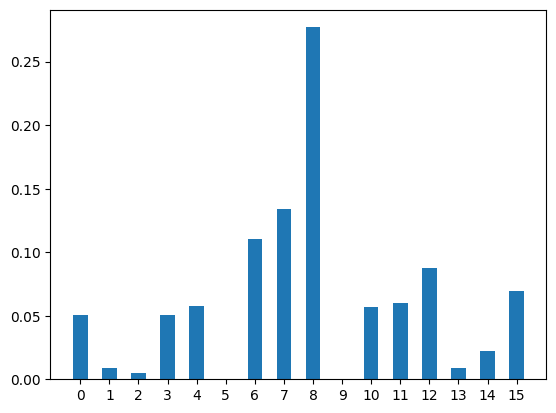



>>> Job ID: claqqhs46cn44kd6v3o0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00941, 1: 0.0096, 2: 0.00484, 14: 0.02091, 5: 0.03198, 12: 0.10724, 11: 0.07039, 10: 0.02353, 15: 0.06483, 7: 0.07142, 3: 0.02957, 0: 0.05389, 8: 0.34562, 6: 0.05186, 4: 0.04688, 9: 0.05803}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00941, 1: 0.0096, 2: 0.00484, 14: 0.02091, 5: 0.03198, 12: 0.10724, 11: 0.07039, 10: 0.02353, 15: 0.06483, 7: 0.07142, 3: 0.02957, 0: 0.05389, 8: 0.34562, 6: 0.05186, 4: 0.04688, 9: 0.05803}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
47
{13: 0.00941, 1: 0.0096, 2: 0.00484, 14: 0.02091, 5: 0.03198, 12: 0.10724, 11: 0.07039, 10: 0.02353, 15: 0.06483, 7: 0.07142, 3: 0.02957, 0: 0.05389, 8: 0.34562, 6: 0.05186, 4: 0.04688, 9: 0.05803}
variance :  0.006060189649999999
entropy :  2.276427062143905


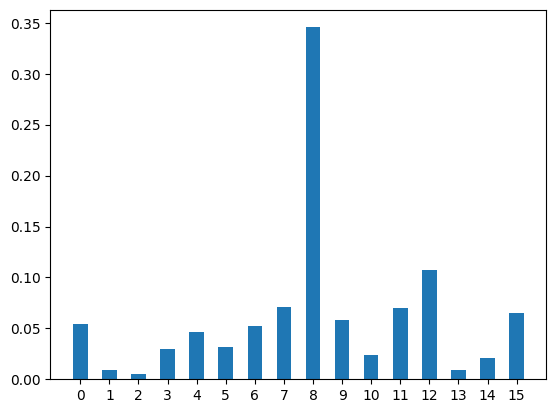



>>> Job ID: claqqj4tstu8k2fv69eg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.0178, 2: 0.01079, 14: 0.01473, 1: 0.04366, 9: 0.04233, 10: 0.03472, 15: 0.03187, 3: 0.02116, 7: 0.08649, 0: 0.05443, 11: 0.08216, 6: 0.0412, 4: 0.05772, 8: 0.34392, 5: 0.01941, 12: 0.09761}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.0178, 2: 0.01079, 14: 0.01473, 1: 0.04366, 9: 0.04233, 10: 0.03472, 15: 0.03187, 3: 0.02116, 7: 0.08649, 0: 0.05443, 11: 0.08216, 6: 0.0412, 4: 0.05772, 8: 0.34392, 5: 0.01941, 12: 0.09761}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
48
{13: 0.0178, 2: 0.01079, 14: 0.01473, 1: 0.04366, 9: 0.04233, 10: 0.03472, 15: 0.03187, 3: 0.02116, 7: 0.08649, 0: 0.05443, 11: 0.08216, 6: 0.0412, 4: 0.05772, 8: 0.34392, 5: 0.01941, 12: 0.09761}
variance :  0.005932816125000001
entropy :  2.303569345630007


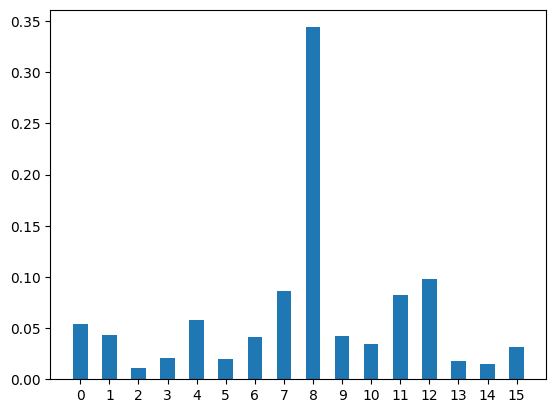



>>> Job ID: claqqkbk8l5ohotbtav0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{15: 0.00266, 10: 0.03847, 2: 0.03923, 5: 0.06091, 12: 0.05549, 13: 0.05214, 11: 0.07272, 8: 0.1244, 1: 0.06556, 4: 0.02366, 6: 0.05006, 3: 0.0054, 0: 0.03471, 7: 0.08321, 14: 0.03049, 9: 0.26089}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {15: 0.00266, 10: 0.03847, 2: 0.03923, 5: 0.06091, 12: 0.05549, 13: 0.05214, 11: 0.07272, 8: 0.1244, 1: 0.06556, 4: 0.02366, 6: 0.05006, 3: 0.0054, 0: 0.03471, 7: 0.08321, 14: 0.03049, 9: 0.26089}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
49
{15: 0.00266, 10: 0.03847, 2: 0.03923, 5: 0.06091, 12: 0.05549, 13: 0.05214, 11: 0.07272, 8: 0.1244, 1: 0.06556, 4: 0.02366, 6: 0.05006, 3: 0.0054, 0: 0.03471, 7: 0.08321, 14: 0.03049, 9: 0.26089}
variance :  0.0034570193000000005
entropy :  2.428776514463564


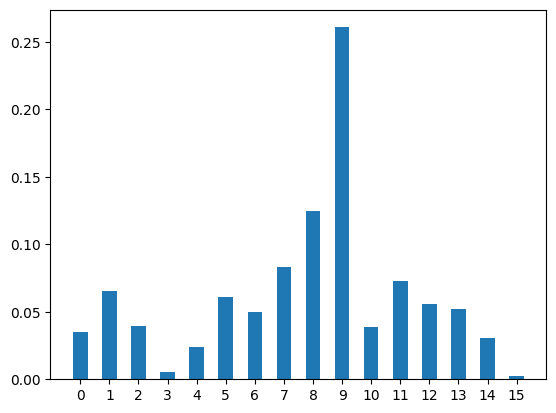

In [39]:
var_notcontainingCL = []
entropy_notcontainingCL = []
for N in range(50):
  coin_bit = QuantumRegister(1, 's')
  position_bits = QuantumRegister(4, 'p')
  classical_bis = ClassicalRegister(4, 'c')
  circuit = QuantumCircuit(coin_bit, position_bits, classical_bis)

  s = coin_bit
  p0, p1, p2, p3 = position_bits
  c0, c1, c2, c3 = classical_bis

  Ugate = Shift.to_gate().control(1)

  for i in range(N):
    circuit.barrier()
    circuit.h(s)
    circuit.append(Ugate, [s, p0, p1, p2, p3])

  circuit.barrier()

  circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

  job = sampler.run(circuit, shots=100000)
  print(f">>> Job ID: {job.job_id()}")
  print(f">>> Job Status: {job.status()}")

  result = job.result()
  print(f">>> {result}")
  print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
  print(f"  > Metadata: {result.metadata[0]}")

  print(N)
  cnts = dict(result.quasi_dists[0])
  print(cnts)

  board = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  prob = []
  for i in range(16):
    prob.append(cnts.get(i, 0))

  entropy = 0
  for i in range(16):
    if prob[i] != 0 :
      entropy = entropy - prob[i]*np.log(prob[i])

  var_notcontainingCL.append(np.var(prob))
  entropy_notcontainingCL.append(entropy)
  print("variance : ", np.var(prob))
  print("entropy : ", entropy)
  plt.bar(board, prob, 0.5)
  plt.xticks(board)
  plt.show()
  print()
  print()

#4. Adding Chutes and Ladders in Board

1) Chutes & Ladder Operator (Notated CL)

Chutes & Ladder Operator

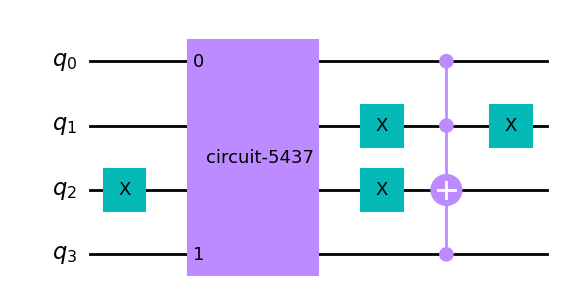

In [22]:
CL = QuantumCircuit(4)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)

CL.draw("mpl")

Verifying Chutes & Ladder Operator (3 <-> 10)

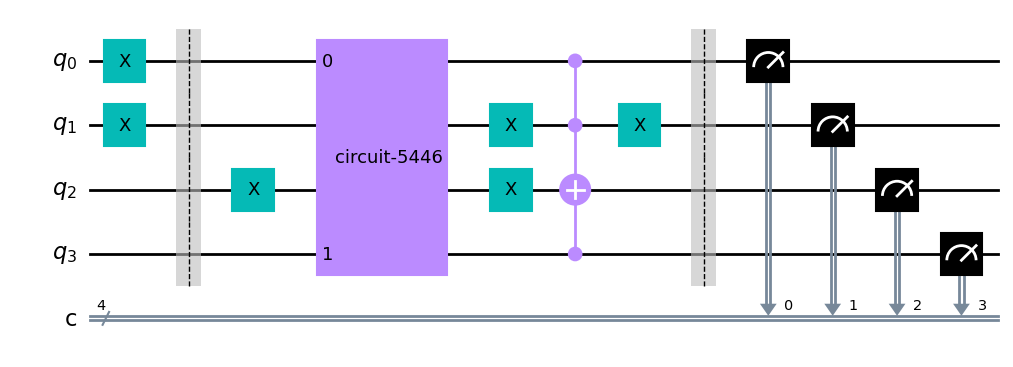

In [23]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(1)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL.draw("mpl")

>>> Job ID: claqkn3k8l5ohotbsbt0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


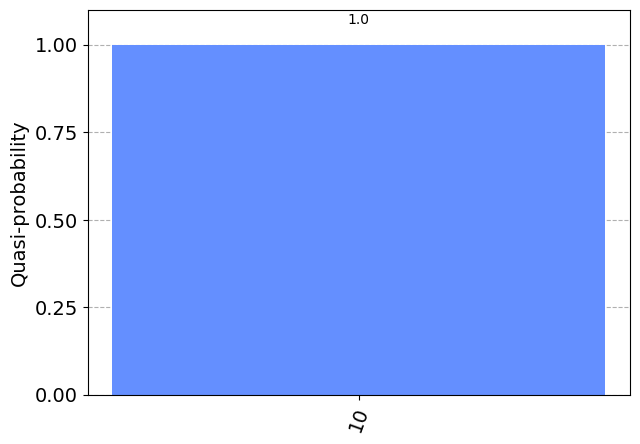

In [24]:
job = sampler.run(CL, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Chutes & Ladder Operator. 3 <-> 10
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

Verifying Chutes & Ladder Operator (9 <-> 13)

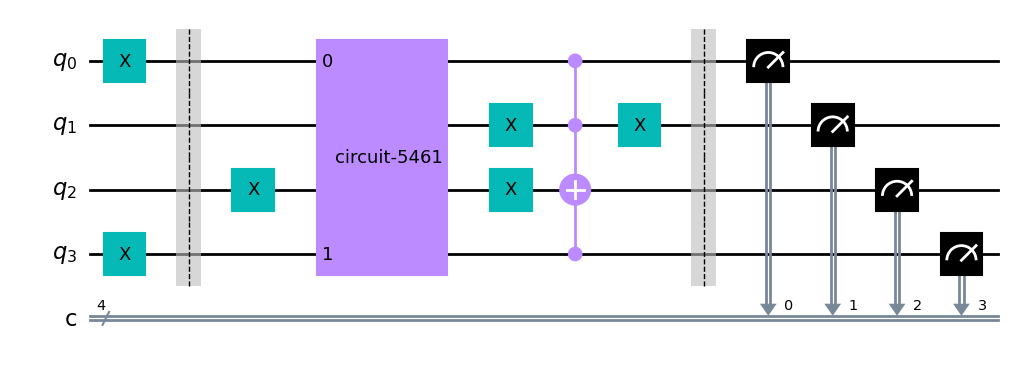

In [25]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(3)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL.draw("mpl")

>>> Job ID: claqknktstu8k2fv5b9g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


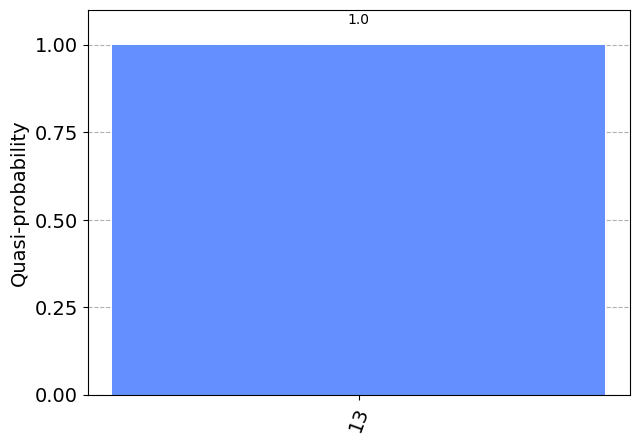

In [26]:
job = sampler.run(CL, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Chutes & Ladder Operator. 9 <-> 13
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

Verifying Chutes & Ladder Operator (7 <-> 7)

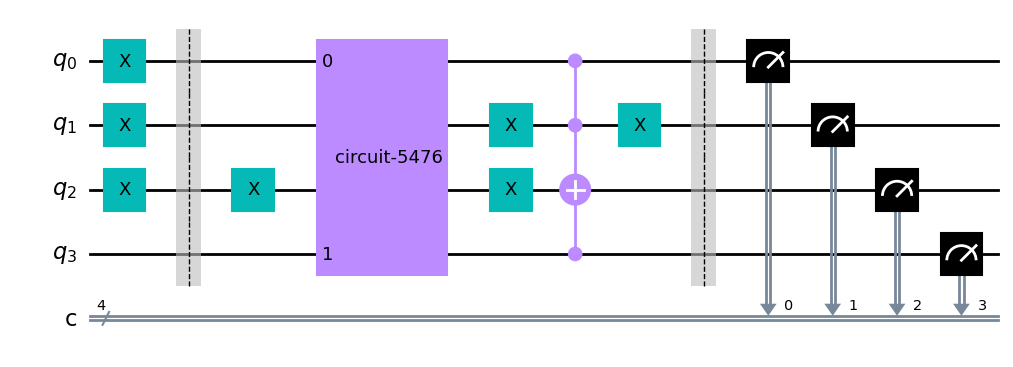

In [27]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(1)
CL.x(2)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL.draw("mpl")

>>> Job ID: claqkodlqrutvh0h6ceg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{7: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {7: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


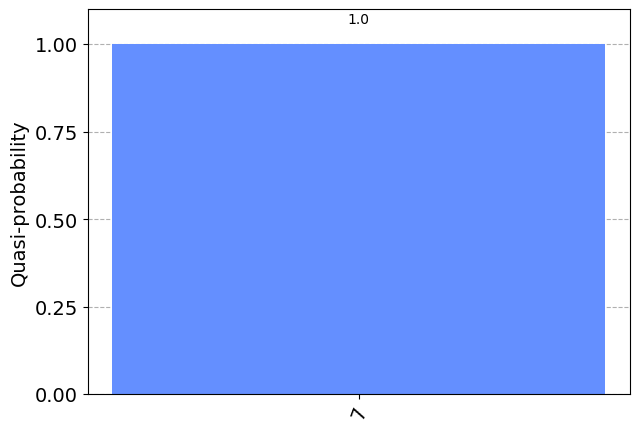

In [28]:
job = sampler.run(CL, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Chutes & Ladder Operator. 7 <-> 7
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

2) Chutes & Ladders Board Evolution Operator

Chutes & Ladder Operator

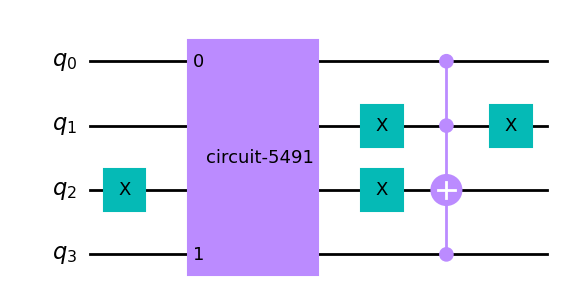

In [29]:
CL = QuantumCircuit(4)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)

CL.draw("mpl")

1 Step Chutes & Ladders Board Evolution Operator

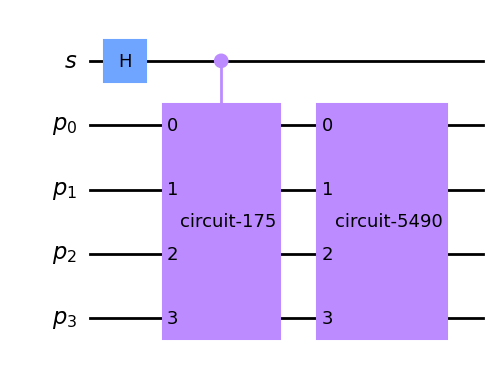

In [30]:
coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
circuit = QuantumCircuit(coin_bit, position_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits

Ugate = Shift.to_gate().control(1)
circuit.h(s)
circuit.append(Ugate, [s, p0, p1, p2, p3])
circuit.append(CL, [p0, p1, p2, p3])

circuit.draw("mpl")

#5. Discussion

1) Role of Measurement in Quantum Chutes and Ladders Game

State measurement makes wave function collapse. Collapse of wave function arises randomness of Quantum Chutes and Ladders Game.

2) Measurement between Turns

Repetition of measurement and initializaing states is just repetition of 1 step evolution. Repetition of measurement can obtain probability of each state after 1 step evolution.

3) No Measurement between Turns

No measurement makes unitary evolution by each step. This procedure can obtain quantum superposition of states.

4) Quantum Analog of the "Memoryless" Nature of the Classical Game?

Quantum walks are quantum analogues of classical random walks.

Classical Walk : Walker occupy definite states and randomness arises from stocastic transitions defined by Markov's Process.

Quantum Walk : Randomness arises through quantum superposition of states, non-random, reversible unitary evolution and collapse of the wave function due to state measurements.

#6. Compare between #3 & #4 (10 Step)

1) Task 3 (Not Containing Chutes & Ladders)

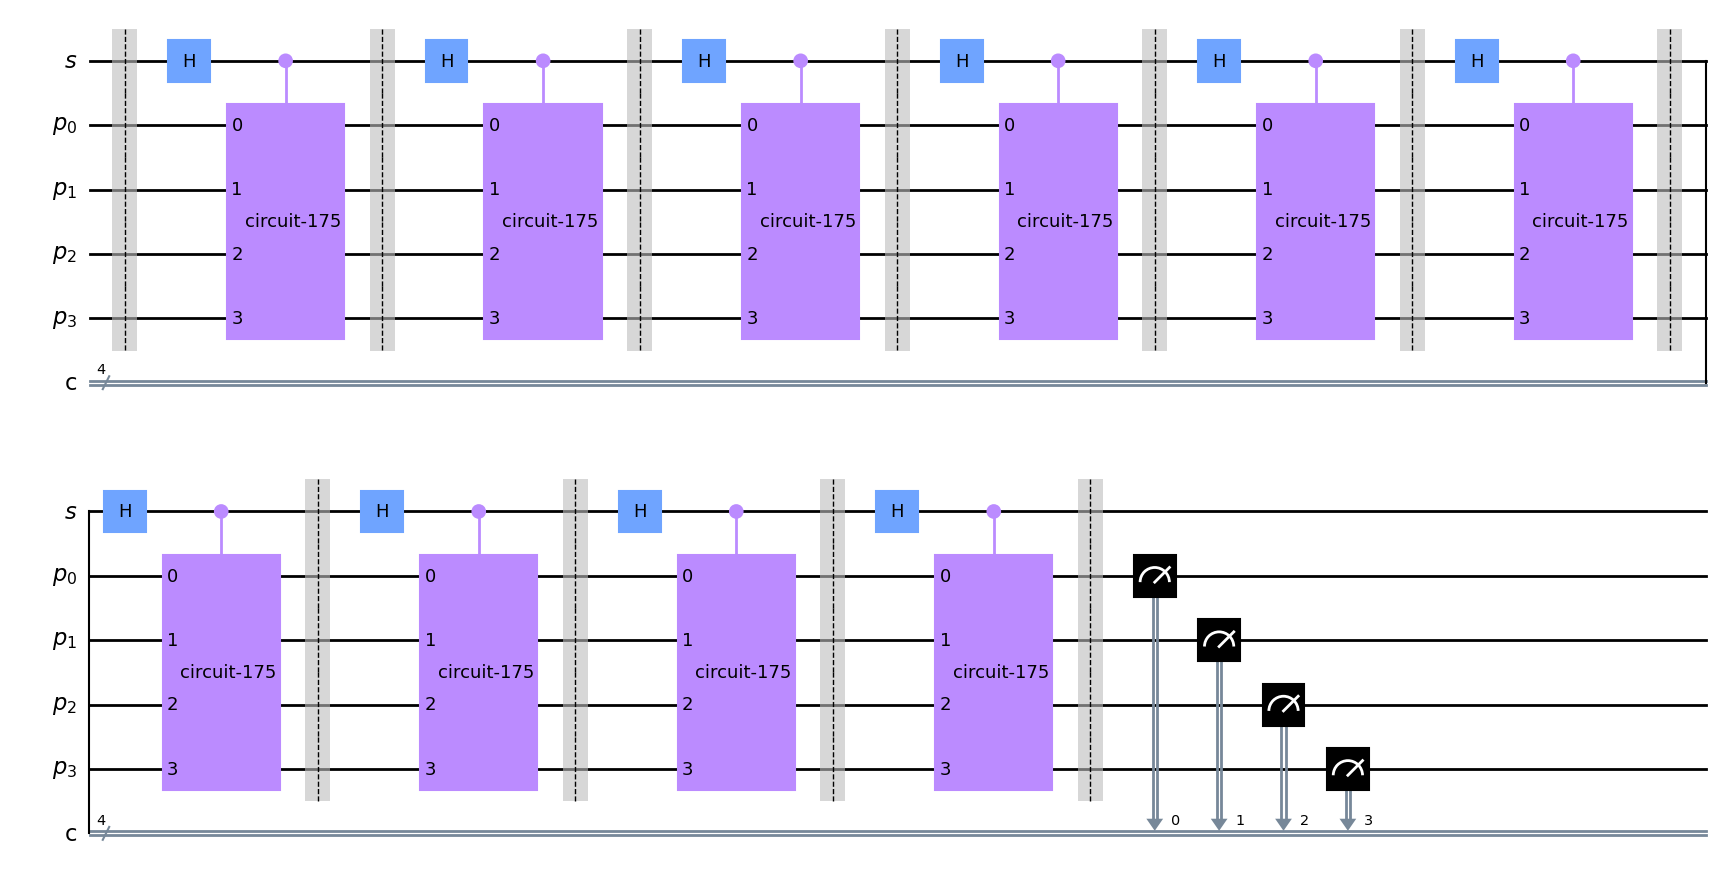

In [31]:
N = 10

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit.draw("mpl")

>>> Job ID: claqkp3k8l5ohotbscc0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.00092, 5: 0.06949, 9: 0.04917, 2: 0.43871, 4: 0.09783, 6: 0.05142, 0: 0.00086, 7: 0.06245, 3: 0.06299, 8: 0.08597, 1: 0.08019}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.00092, 5: 0.06949, 9: 0.04917, 2: 0.43871, 4: 0.09783, 6: 0.05142, 0: 0.00086, 7: 0.06245, 3: 0.06299, 8: 0.08597, 1: 0.08019}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}

10


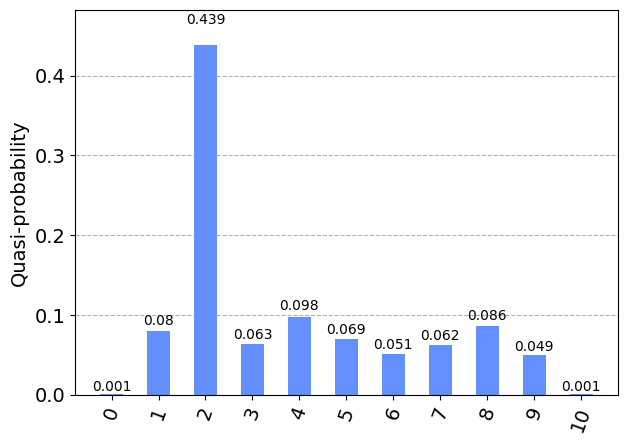

In [32]:
job = sampler.run(circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

print()
print(N)
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

2) Task 4 (Not Containing Chutes & Ladders)

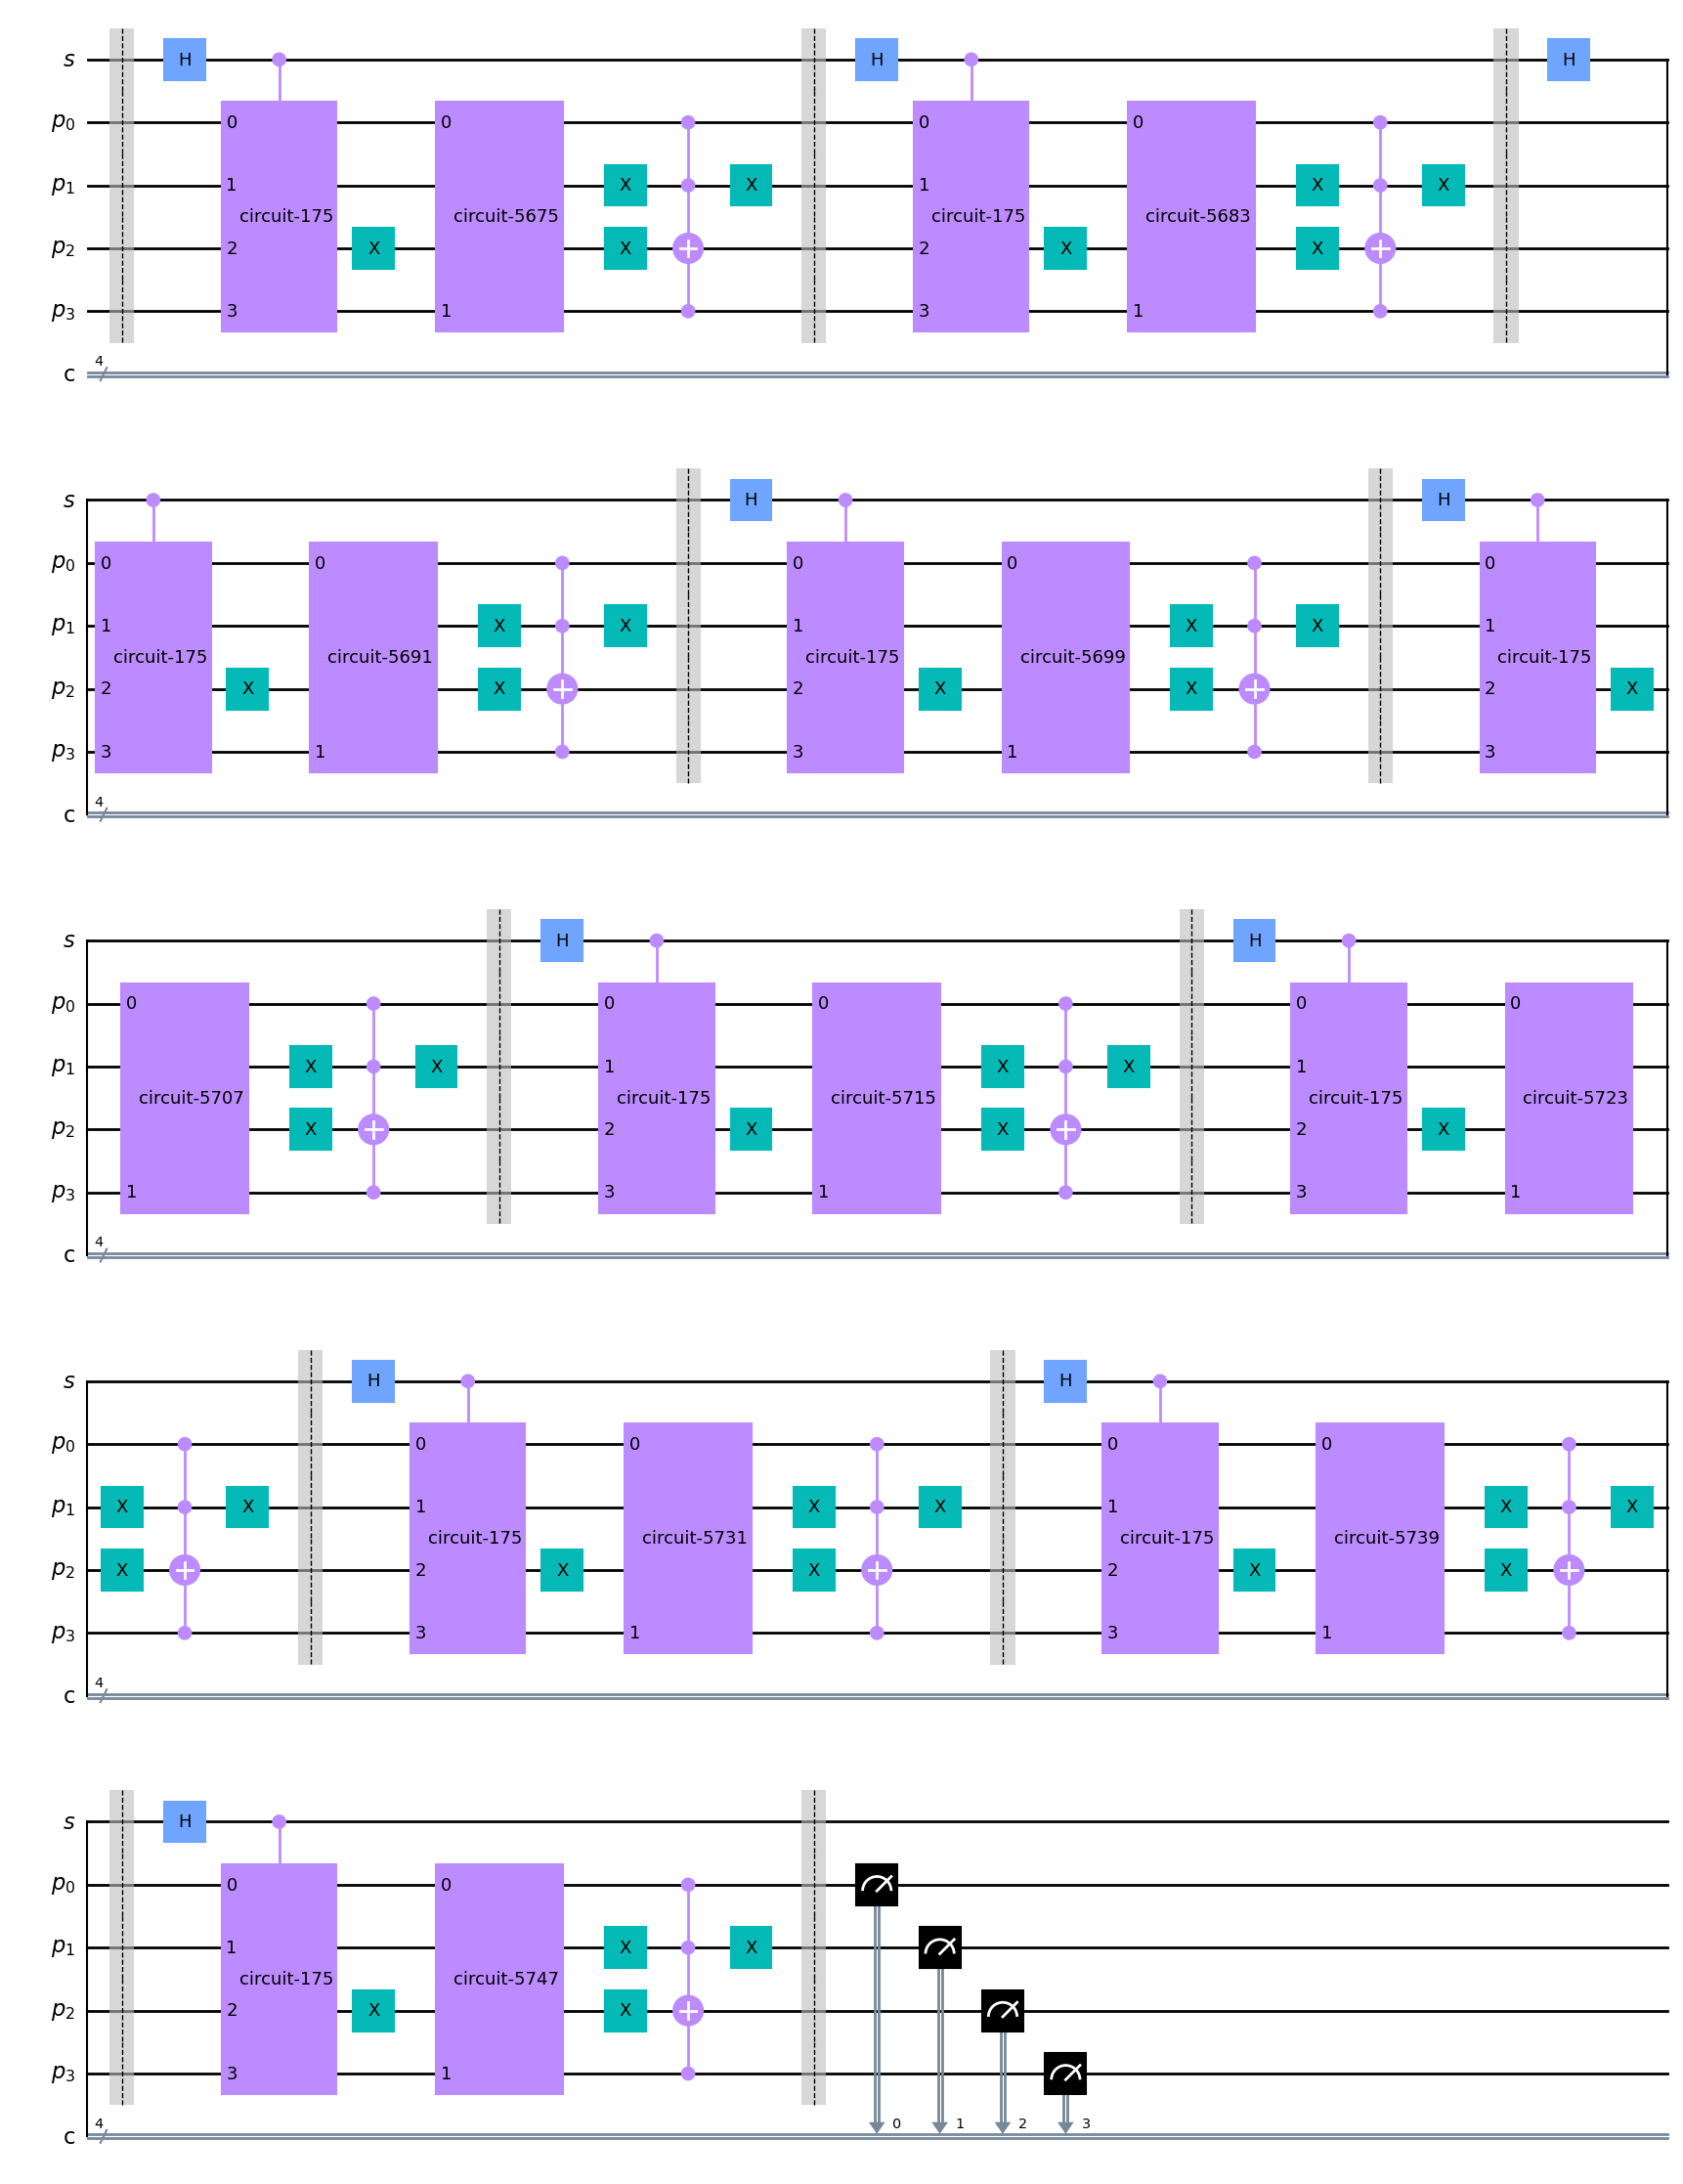

In [33]:
N = 10

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

  qc1 = QuantumCircuit(2)
  qc1.swap(0,1)
  CSwapgate = qc1.to_gate().control(2)

  circuit.x(p2)
  circuit.append(CSwapgate, [p1,p2,p0,p3])
  circuit.x(p2)
  circuit.x(p1)
  circuit.append(C3XGate(), [p0,p1,p3,p2])
  circuit.x(p1)

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit.draw("mpl")

>>> Job ID: claqkq2pen43j46fcofg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.01033, 9: 0.03573, 6: 0.00502, 4: 0.01931, 0: 0.00203, 7: 0.01245, 3: 0.08072, 12: 0.05292, 5: 0.05909, 2: 0.43711, 8: 0.02525, 1: 0.08007, 15: 0.01701, 10: 0.07684, 14: 0.00516, 11: 0.08096}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.01033, 9: 0.03573, 6: 0.00502, 4: 0.01931, 0: 0.00203, 7: 0.01245, 3: 0.08072, 12: 0.05292, 5: 0.05909, 2: 0.43711, 8: 0.02525, 1: 0.08007, 15: 0.01701, 10: 0.07684, 14: 0.00516, 11: 0.08096}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}

10


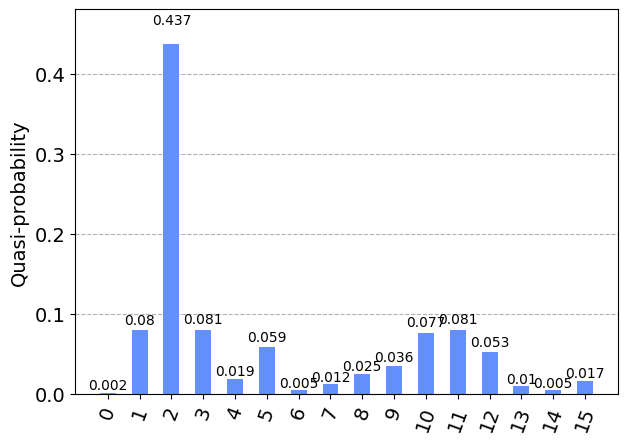

In [34]:
job = sampler.run(circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

print()
print(N)
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

3) N Step Board Operator Containing Chutes & Ladders

>>> Job ID: claqn95lqrutvh0h6pbg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
0
{0: 1.0}
variance :  0.05859375
entropy :  0.0


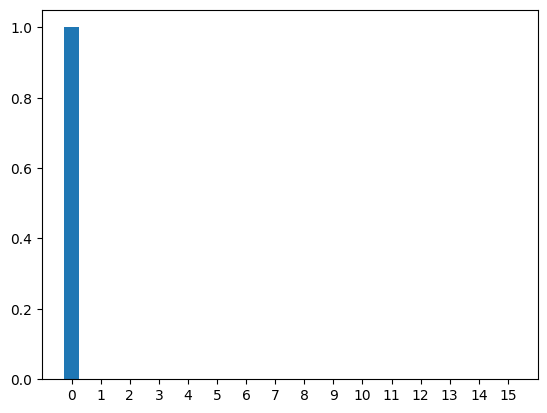



>>> Job ID: claqn9ktstu8k2fv5nn0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.50234, 0: 0.49766}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.50234, 0: 0.49766}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
1
{1: 0.50234, 0: 0.49766}
variance :  0.02734443445
entropy :  0.6931362293199688


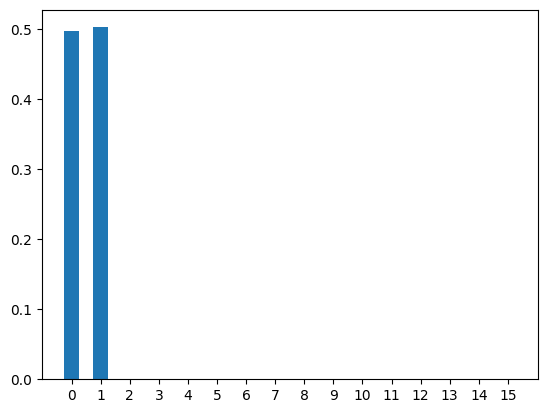



>>> Job ID: claqna5r12tet1q0itag
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 0.25047, 2: 0.24921, 1: 0.50032}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 0.25047, 2: 0.24921, 1: 0.50032}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
2
{0: 0.25047, 2: 0.24921, 1: 0.50032}
variance :  0.0195413092125
entropy :  1.0394971703237266


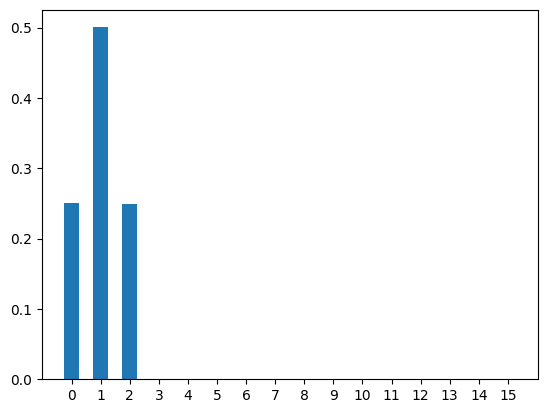



>>> Job ID: claqnatr12tet1q0itf0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.1247, 0: 0.12481, 2: 0.12539, 1: 0.6251}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.1247, 0: 0.12481, 2: 0.12539, 1: 0.6251}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
3
{10: 0.1247, 0: 0.12481, 2: 0.12539, 1: 0.6251}
variance :  0.0234437680125
entropy :  1.0733807820878927


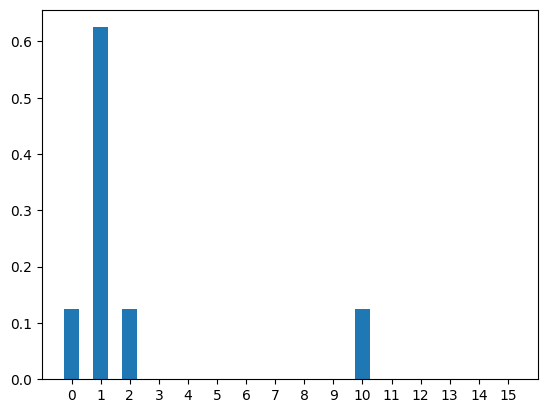



>>> Job ID: claqnbdlqrutvh0h6png
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.06237, 2: 0.12645, 0: 0.06128, 10: 0.06121, 1: 0.62589, 3: 0.0628}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.06237, 2: 0.12645, 0: 0.06128, 10: 0.06121, 1: 0.62589, 3: 0.0628}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
4
{11: 0.06237, 2: 0.12645, 0: 0.06128, 10: 0.06121, 1: 0.62589, 3: 0.0628}
variance :  0.022535228374999997
entropy :  1.243740021420788


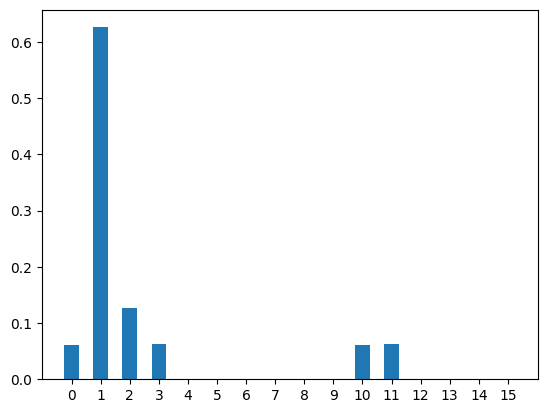



>>> Job ID: claqnc2pen43j46fd52g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{4: 0.03076, 0: 0.03125, 3: 0.03107, 1: 0.53036, 12: 0.0317, 2: 0.12667, 10: 0.15598, 11: 0.06221}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {4: 0.03076, 0: 0.03125, 3: 0.03107, 1: 0.53036, 12: 0.0317, 2: 0.12667, 10: 0.15598, 11: 0.06221}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
5
{4: 0.03076, 0: 0.03125, 3: 0.03107, 1: 0.53036, 12: 0.0317, 2: 0.12667, 10: 0.15598, 11: 0.06221}
variance :  0.016682489875000005
entropy :  1.4933297900143456


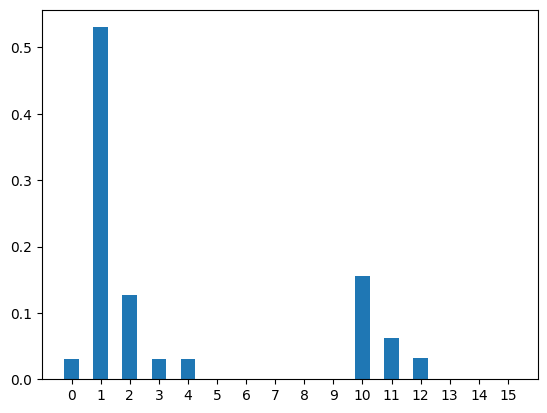



>>> Job ID: claqnclr12tet1q0itn0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{4: 0.03124, 10: 0.07781, 3: 0.0154, 0: 0.01528, 9: 0.01582, 1: 0.40658, 12: 0.07935, 5: 0.01586, 11: 0.14114, 2: 0.20152}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {4: 0.03124, 10: 0.07781, 3: 0.0154, 0: 0.01528, 9: 0.01582, 1: 0.40658, 12: 0.07935, 5: 0.01586, 11: 0.14114, 2: 0.20152}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
6
{4: 0.03124, 10: 0.07781, 3: 0.0154, 0: 0.01528, 9: 0.01582, 1: 0.40658, 12: 0.07935, 5: 0.01586, 11: 0.14114, 2: 0.20152}
variance :  0.0111023320625
entropy :  1.7325820808682777


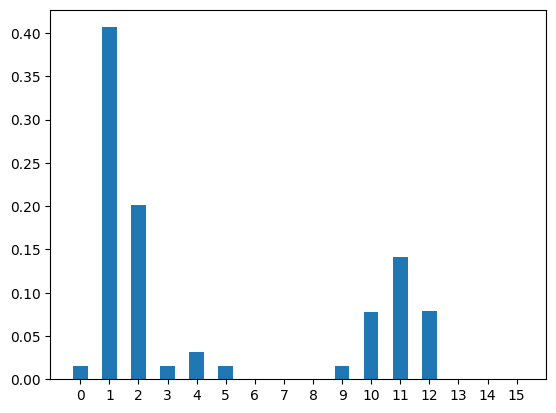



>>> Job ID: claqnddr12tet1q0itq0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.01557, 13: 0.00792, 4: 0.00769, 6: 0.00788, 11: 0.07834, 9: 0.07054, 2: 0.32062, 1: 0.28858, 12: 0.078, 5: 0.03915, 0: 0.00754, 3: 0.07817}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.01557, 13: 0.00792, 4: 0.00769, 6: 0.00788, 11: 0.07834, 9: 0.07054, 2: 0.32062, 1: 0.28858, 12: 0.078, 5: 0.03915, 0: 0.00754, 3: 0.07817}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
7
{10: 0.01557, 13: 0.00792, 4: 0.00769, 6: 0.00788, 11: 0.07834, 9: 0.07054, 2: 0.32062, 1: 0.28858, 12: 0.078, 5: 0.03915, 0: 0.00754, 3: 0.07817}
variance :  0.009306197050000001
entropy :  1.8505645263150057


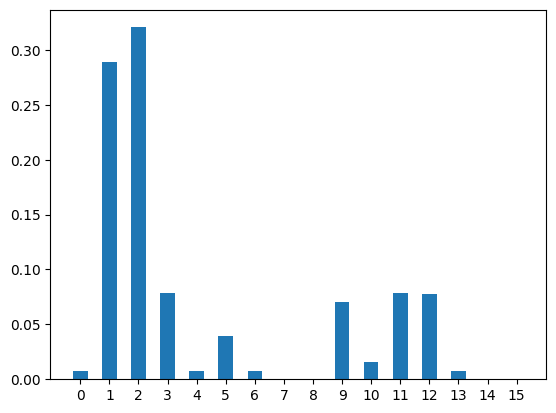



>>> Job ID: claqndtr12tet1q0its0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00362, 6: 0.03868, 4: 0.06627, 5: 0.00786, 12: 0.07743, 10: 0.01977, 11: 0.06225, 2: 0.41201, 13: 0.03509, 1: 0.1989, 9: 0.01905, 7: 0.00394, 0: 0.00407, 3: 0.05106}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00362, 6: 0.03868, 4: 0.06627, 5: 0.00786, 12: 0.07743, 10: 0.01977, 11: 0.06225, 2: 0.41201, 13: 0.03509, 1: 0.1989, 9: 0.01905, 7: 0.00394, 0: 0.00407, 3: 0.05106}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
8
{14: 0.00362, 6: 0.03868, 4: 0.06627, 5: 0.00786, 12: 0.07743, 10: 0.01977, 11: 0.06225, 2: 0.41201, 13: 0.03509, 1: 0.1989, 9: 0.01905, 7: 0.00394, 0: 0.00407, 3: 0.05106}
variance :  0.010454433275
entropy :  1.888258698824392


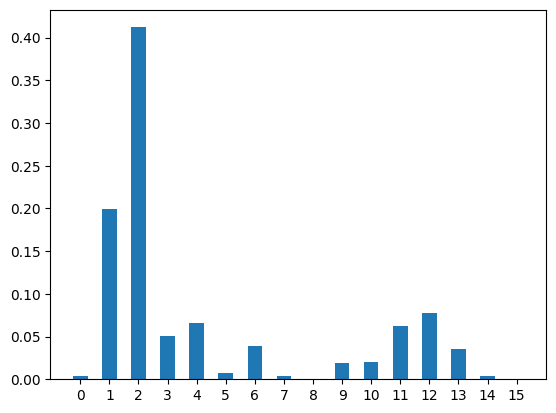



>>> Job ID: claqnelr12tet1q0iu10
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.00191, 14: 0.01881, 13: 0.00181, 11: 0.04773, 1: 0.12684, 2: 0.45461, 9: 0.08873, 5: 0.0253, 12: 0.03882, 15: 0.00214, 10: 0.08038, 0: 0.00202, 3: 0.01983, 7: 0.03298, 6: 0.00802, 4: 0.05007}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.00191, 14: 0.01881, 13: 0.00181, 11: 0.04773, 1: 0.12684, 2: 0.45461, 9: 0.08873, 5: 0.0253, 12: 0.03882, 15: 0.00214, 10: 0.08038, 0: 0.00202, 3: 0.01983, 7: 0.03298, 6: 0.00802, 4: 0.05007}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
9
{8: 0.00191, 14: 0.01881, 13: 0.00181, 11: 0.04773, 1: 0.12684, 2: 0.45461, 9: 0.08873, 5: 0.0253, 12: 0.03882, 15: 0.00214, 10: 0.08038, 0: 0.00202, 3: 0.01983, 7: 0.03298, 6: 0.00802, 4: 0.05007}
variance :  0.011464966575
entropy :  1.904894950279438


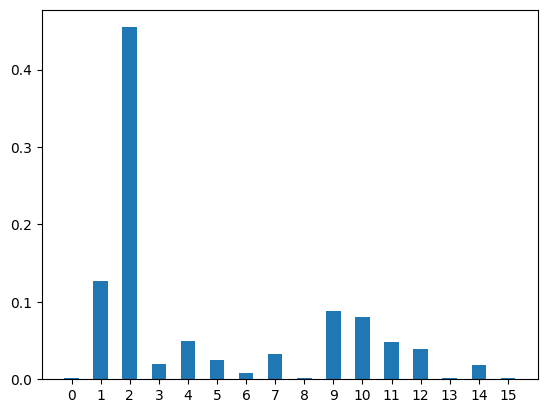



>>> Job ID: claqnfc46cn44kd6uj1g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{6: 0.00474, 4: 0.01955, 8: 0.02372, 13: 0.01022, 14: 0.00482, 9: 0.03665, 1: 0.07999, 2: 0.43821, 12: 0.05266, 5: 0.06078, 0: 0.00179, 7: 0.01245, 3: 0.08024, 15: 0.01676, 10: 0.07694, 11: 0.08048}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {6: 0.00474, 4: 0.01955, 8: 0.02372, 13: 0.01022, 14: 0.00482, 9: 0.03665, 1: 0.07999, 2: 0.43821, 12: 0.05266, 5: 0.06078, 0: 0.00179, 7: 0.01245, 3: 0.08024, 15: 0.01676, 10: 0.07694, 11: 0.08048}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
10
{6: 0.00474, 4: 0.01955, 8: 0.02372, 13: 0.01022, 14: 0.00482, 9: 0.03665, 1: 0.07999, 2: 0.43821, 12: 0.05266, 5: 0.06078, 0: 0.00179, 7: 0.01245, 3: 0.08024, 15: 0.01676, 10: 0.07694, 11: 0.08048}
variance :  0.010256640987499998
entropy :  2.010604563490944


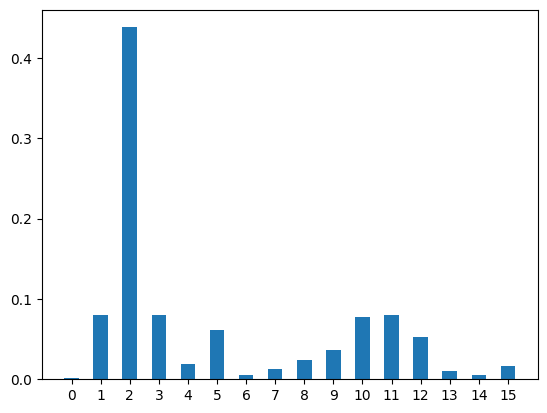



>>> Job ID: claqng5lqrutvh0h6qe0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.01954, 14: 0.00622, 7: 0.0009, 0: 0.0126, 3: 0.0322, 13: 0.03034, 6: 0.06422, 4: 0.05047, 2: 0.38722, 15: 0.005, 10: 0.11347, 5: 0.01883, 12: 0.08802, 11: 0.10117, 8: 0.01965, 1: 0.05015}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.01954, 14: 0.00622, 7: 0.0009, 0: 0.0126, 3: 0.0322, 13: 0.03034, 6: 0.06422, 4: 0.05047, 2: 0.38722, 15: 0.005, 10: 0.11347, 5: 0.01883, 12: 0.08802, 11: 0.10117, 8: 0.01965, 1: 0.05015}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
11
{9: 0.01954, 14: 0.00622, 7: 0.0009, 0: 0.0126, 3: 0.0322, 13: 0.03034, 6: 0.06422, 4: 0.05047, 2: 0.38722, 15: 0.005, 10: 0.11347, 5: 0.01883, 12: 0.08802, 11: 0.10117, 8: 0.01965, 1: 0.05015}
variance :  0.0081742017125
entropy :  2.1022222799270756


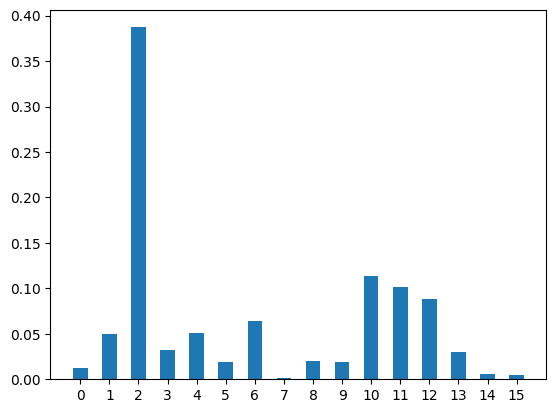



>>> Job ID: claqngststu8k2fv5opg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00052, 8: 0.00122, 13: 0.03904, 14: 0.03056, 1: 0.04085, 11: 0.10508, 6: 0.02137, 4: 0.03724, 15: 0.00715, 10: 0.11732, 2: 0.31509, 12: 0.09271, 5: 0.02726, 0: 0.01029, 7: 0.04724, 3: 0.10706}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00052, 8: 0.00122, 13: 0.03904, 14: 0.03056, 1: 0.04085, 11: 0.10508, 6: 0.02137, 4: 0.03724, 15: 0.00715, 10: 0.11732, 2: 0.31509, 12: 0.09271, 5: 0.02726, 0: 0.01029, 7: 0.04724, 3: 0.10706}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
12
{9: 0.00052, 8: 0.00122, 13: 0.03904, 14: 0.03056, 1: 0.04085, 11: 0.10508, 6: 0.02137, 4: 0.03724, 15: 0.00715, 10: 0.11732, 2: 0.31509, 12: 0.09271, 5: 0.02726, 0: 0.01029, 7: 0.04724, 3: 0.10706}
variance :  0.0056717642124999995
entropy :  2.217239950105705


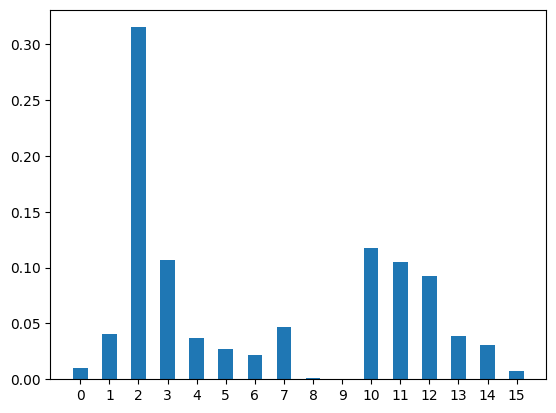



>>> Job ID: claqnhtlqrutvh0h6qm0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.0001, 14: 0.01194, 1: 0.01553, 6: 0.04684, 4: 0.07579, 9: 0.06615, 8: 0.02554, 2: 0.26221, 15: 0.01925, 10: 0.14781, 5: 0.01045, 12: 0.09184, 0: 0.00593, 7: 0.02522, 3: 0.1112, 11: 0.0842}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.0001, 14: 0.01194, 1: 0.01553, 6: 0.04684, 4: 0.07579, 9: 0.06615, 8: 0.02554, 2: 0.26221, 15: 0.01925, 10: 0.14781, 5: 0.01045, 12: 0.09184, 0: 0.00593, 7: 0.02522, 3: 0.1112, 11: 0.0842}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
13
{13: 0.0001, 14: 0.01194, 1: 0.01553, 6: 0.04684, 4: 0.07579, 9: 0.06615, 8: 0.02554, 2: 0.26221, 15: 0.01925, 10: 0.14781, 5: 0.01045, 12: 0.09184, 0: 0.00593, 7: 0.02522, 3: 0.1112, 11: 0.0842}
variance :  0.004405781399999999
entropy :  2.283090306875598


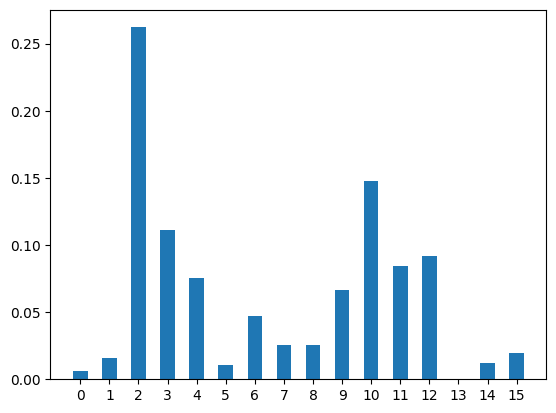



>>> Job ID: claqnillqrutvh0h6qq0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00627, 1: 0.01909, 13: 0.0075, 8: 0.03513, 12: 0.02127, 5: 0.0791, 2: 0.22089, 15: 0.02014, 10: 0.10322, 6: 0.00665, 4: 0.04947, 11: 0.06857, 9: 0.08735, 0: 0.00639, 7: 0.05538, 3: 0.21358}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00627, 1: 0.01909, 13: 0.0075, 8: 0.03513, 12: 0.02127, 5: 0.0791, 2: 0.22089, 15: 0.02014, 10: 0.10322, 6: 0.00665, 4: 0.04947, 11: 0.06857, 9: 0.08735, 0: 0.00639, 7: 0.05538, 3: 0.21358}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
14
{14: 0.00627, 1: 0.01909, 13: 0.0075, 8: 0.03513, 12: 0.02127, 5: 0.0791, 2: 0.22089, 15: 0.02014, 10: 0.10322, 6: 0.00665, 4: 0.04947, 11: 0.06857, 9: 0.08735, 0: 0.00639, 7: 0.05538, 3: 0.21358}
variance :  0.0043314546624999995
entropy :  2.291913878585852


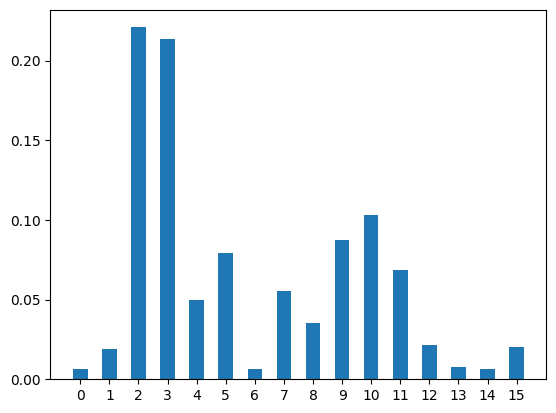



>>> Job ID: claqnjk46cn44kd6ujm0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00492, 11: 0.04431, 1: 0.01778, 0: 0.02666, 7: 0.01327, 3: 0.14993, 9: 0.02529, 15: 0.00454, 10: 0.12427, 2: 0.10662, 13: 0.07629, 8: 0.04543, 5: 0.07374, 12: 0.02613, 6: 0.0245, 4: 0.23632}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00492, 11: 0.04431, 1: 0.01778, 0: 0.02666, 7: 0.01327, 3: 0.14993, 9: 0.02529, 15: 0.00454, 10: 0.12427, 2: 0.10662, 13: 0.07629, 8: 0.04543, 5: 0.07374, 12: 0.02613, 6: 0.0245, 4: 0.23632}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
15
{14: 0.00492, 11: 0.04431, 1: 0.01778, 0: 0.02666, 7: 0.01327, 3: 0.14993, 9: 0.02529, 15: 0.00454, 10: 0.12427, 2: 0.10662, 13: 0.07629, 8: 0.04543, 5: 0.07374, 12: 0.02613, 6: 0.0245, 4: 0.23632}
variance :  0.00381827645
entropy :  2.3457140476233924


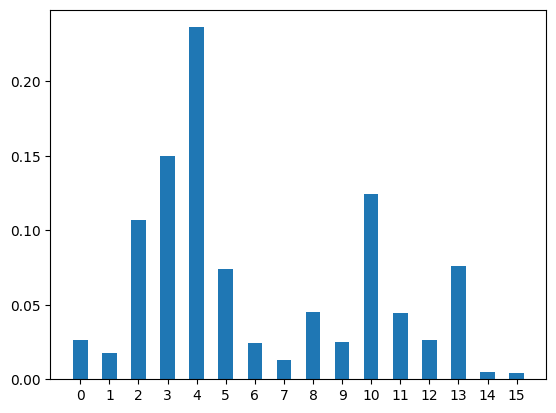



>>> Job ID: claqnkdlqrutvh0h6r70
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00017, 8: 0.03642, 2: 0.0728, 1: 0.03638, 11: 0.0495, 7: 0.00622, 0: 0.00571, 3: 0.11678, 9: 0.08145, 13: 0.02505, 6: 0.02427, 4: 0.34351, 12: 0.04949, 5: 0.10413, 10: 0.04349, 15: 0.00463}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00017, 8: 0.03642, 2: 0.0728, 1: 0.03638, 11: 0.0495, 7: 0.00622, 0: 0.00571, 3: 0.11678, 9: 0.08145, 13: 0.02505, 6: 0.02427, 4: 0.34351, 12: 0.04949, 5: 0.10413, 10: 0.04349, 15: 0.00463}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
16
{14: 0.00017, 8: 0.03642, 2: 0.0728, 1: 0.03638, 11: 0.0495, 7: 0.00622, 0: 0.00571, 3: 0.11678, 9: 0.08145, 13: 0.02505, 6: 0.02427, 4: 0.34351, 12: 0.04949, 5: 0.10413, 10: 0.04349, 15: 0.00463}
variance :  0.0064164870375
entropy :  2.193548534902584


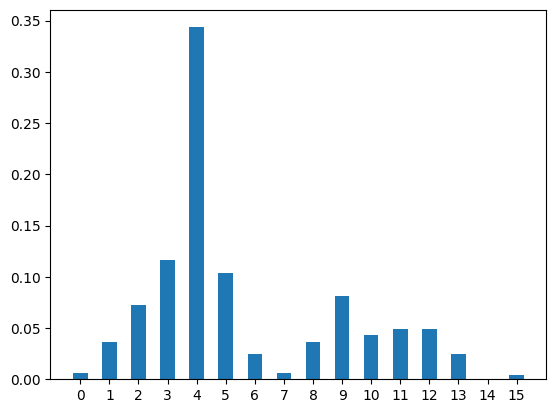



>>> Job ID: claqnl446cn44kd6ujs0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00162, 14: 0.00599, 9: 0.0193, 15: 0.00436, 10: 0.02748, 11: 0.05503, 8: 0.00499, 2: 0.09122, 6: 0.00451, 4: 0.44761, 13: 0.09792, 7: 0.02451, 0: 0.00617, 3: 0.05651, 5: 0.10277, 12: 0.05001}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00162, 14: 0.00599, 9: 0.0193, 15: 0.00436, 10: 0.02748, 11: 0.05503, 8: 0.00499, 2: 0.09122, 6: 0.00451, 4: 0.44761, 13: 0.09792, 7: 0.02451, 0: 0.00617, 3: 0.05651, 5: 0.10277, 12: 0.05001}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
17
{1: 0.00162, 14: 0.00599, 9: 0.0193, 15: 0.00436, 10: 0.02748, 11: 0.05503, 8: 0.00499, 2: 0.09122, 6: 0.00451, 4: 0.44761, 13: 0.09792, 7: 0.02451, 0: 0.00617, 3: 0.05651, 5: 0.10277, 12: 0.05001}
variance :  0.0110573552875
entropy :  1.9241680225612563


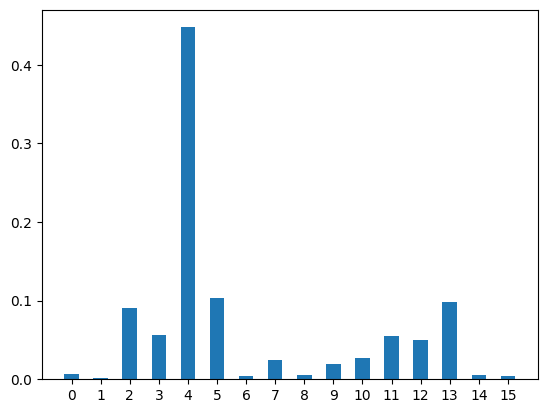



>>> Job ID: claqnm5lqrutvh0h6rd0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00223, 13: 0.01678, 0: 0.00661, 7: 0.00979, 3: 0.03418, 9: 0.03686, 8: 0.01878, 6: 0.0682, 4: 0.41309, 11: 0.04569, 2: 0.09151, 12: 0.02544, 5: 0.07059, 15: 0.00612, 10: 0.05666, 14: 0.09747}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00223, 13: 0.01678, 0: 0.00661, 7: 0.00979, 3: 0.03418, 9: 0.03686, 8: 0.01878, 6: 0.0682, 4: 0.41309, 11: 0.04569, 2: 0.09151, 12: 0.02544, 5: 0.07059, 15: 0.00612, 10: 0.05666, 14: 0.09747}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
18
{1: 0.00223, 13: 0.01678, 0: 0.00661, 7: 0.00979, 3: 0.03418, 9: 0.03686, 8: 0.01878, 6: 0.0682, 4: 0.41309, 11: 0.04569, 2: 0.09151, 12: 0.02544, 5: 0.07059, 15: 0.00612, 10: 0.05666, 14: 0.09747}
variance :  0.009058768424999999
entropy :  2.0818483453025847


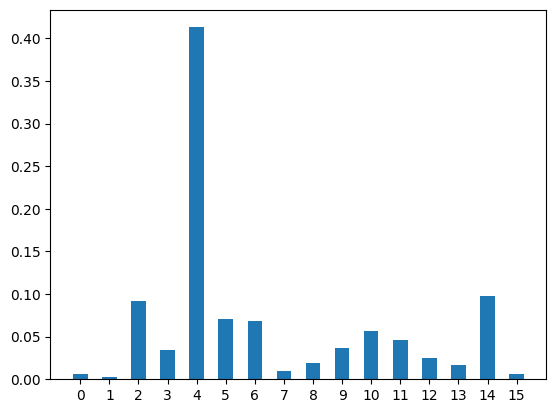



>>> Job ID: claqnn446cn44kd6uk4g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00192, 1: 0.00617, 13: 0.02262, 8: 0.00574, 2: 0.04292, 0: 0.0069, 7: 0.04232, 3: 0.06538, 11: 0.0451, 10: 0.0806, 15: 0.06432, 14: 0.04997, 4: 0.23171, 6: 0.10425, 5: 0.18472, 12: 0.04536}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00192, 1: 0.00617, 13: 0.02262, 8: 0.00574, 2: 0.04292, 0: 0.0069, 7: 0.04232, 3: 0.06538, 11: 0.0451, 10: 0.0806, 15: 0.06432, 14: 0.04997, 4: 0.23171, 6: 0.10425, 5: 0.18472, 12: 0.04536}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
19
{9: 0.00192, 1: 0.00617, 13: 0.02262, 8: 0.00574, 2: 0.04292, 0: 0.0069, 7: 0.04232, 3: 0.06538, 11: 0.0451, 10: 0.0806, 15: 0.06432, 14: 0.04997, 4: 0.23171, 6: 0.10425, 5: 0.18472, 12: 0.04536}
variance :  0.0038714161499999998
entropy :  2.3361107239527055


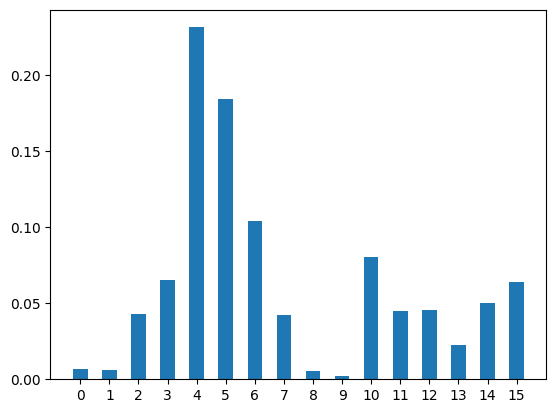



>>> Job ID: claqno5lqrutvh0h6rm0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00013, 11: 0.00123, 8: 0.00522, 13: 0.00368, 1: 0.00802, 2: 0.01622, 10: 0.0951, 15: 0.03292, 0: 0.03432, 7: 0.0435, 3: 0.08017, 14: 0.07049, 5: 0.18233, 12: 0.0891, 6: 0.19583, 4: 0.14174}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00013, 11: 0.00123, 8: 0.00522, 13: 0.00368, 1: 0.00802, 2: 0.01622, 10: 0.0951, 15: 0.03292, 0: 0.03432, 7: 0.0435, 3: 0.08017, 14: 0.07049, 5: 0.18233, 12: 0.0891, 6: 0.19583, 4: 0.14174}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
20
{9: 0.00013, 11: 0.00123, 8: 0.00522, 13: 0.00368, 1: 0.00802, 2: 0.01622, 10: 0.0951, 15: 0.03292, 0: 0.03432, 7: 0.0435, 3: 0.08017, 14: 0.07049, 5: 0.18233, 12: 0.0891, 6: 0.19583, 4: 0.14174}
variance :  0.0038803939125000003
entropy :  2.2625126937383837


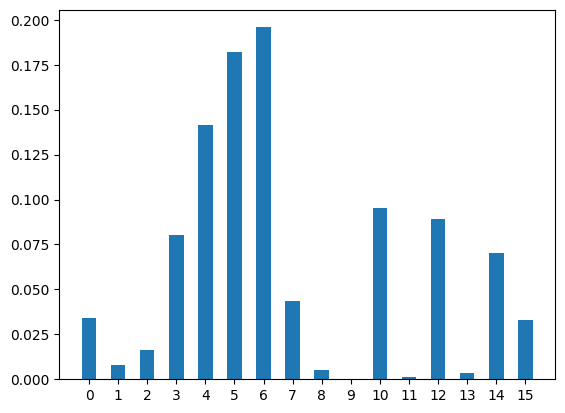



>>> Job ID: claqnotr12tet1q0ivdg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 6e-05, 14: 0.00398, 9: 0.00167, 2: 0.00183, 1: 0.03192, 11: 0.00364, 6: 0.19736, 4: 0.10926, 7: 0.03208, 0: 0.03305, 3: 0.0924, 8: 0.01533, 12: 0.08899, 5: 0.2438, 10: 0.0672, 15: 0.07743}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 6e-05, 14: 0.00398, 9: 0.00167, 2: 0.00183, 1: 0.03192, 11: 0.00364, 6: 0.19736, 4: 0.10926, 7: 0.03208, 0: 0.03305, 3: 0.0924, 8: 0.01533, 12: 0.08899, 5: 0.2438, 10: 0.0672, 15: 0.07743}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
21
{13: 6e-05, 14: 0.00398, 9: 0.00167, 2: 0.00183, 1: 0.03192, 11: 0.00364, 6: 0.19736, 4: 0.10926, 7: 0.03208, 0: 0.03305, 3: 0.0924, 8: 0.01533, 12: 0.08899, 5: 0.2438, 10: 0.0672, 15: 0.07743}
variance :  0.0048878711125
entropy :  2.183420854098728


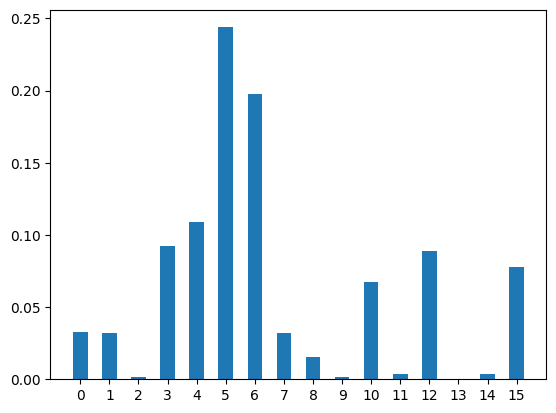



>>> Job ID: claqnprk8l5ohotbsrdg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00404, 2: 0.03058, 11: 0.00589, 8: 0.01849, 13: 0.01622, 9: 0.04862, 15: 0.01373, 10: 0.05123, 1: 0.03542, 0: 0.06682, 3: 0.06042, 7: 0.11327, 5: 0.23453, 12: 0.04442, 6: 0.11119, 4: 0.14513}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00404, 2: 0.03058, 11: 0.00589, 8: 0.01849, 13: 0.01622, 9: 0.04862, 15: 0.01373, 10: 0.05123, 1: 0.03542, 0: 0.06682, 3: 0.06042, 7: 0.11327, 5: 0.23453, 12: 0.04442, 6: 0.11119, 4: 0.14513}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
22
{14: 0.00404, 2: 0.03058, 11: 0.00589, 8: 0.01849, 13: 0.01622, 9: 0.04862, 15: 0.01373, 10: 0.05123, 1: 0.03542, 0: 0.06682, 3: 0.06042, 7: 0.11327, 5: 0.23453, 12: 0.04442, 6: 0.11119, 4: 0.14513}
variance :  0.0035544748249999995
entropy :  2.3760736434486978


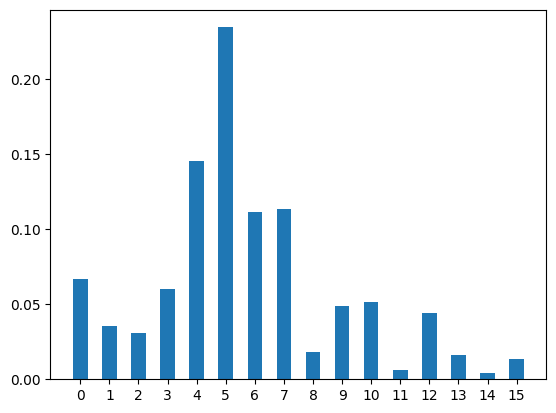



>>> Job ID: claqnqtlqrutvh0h6rtg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00581, 2: 0.0449, 9: 0.0219, 13: 0.02892, 11: 0.02144, 10: 0.0364, 15: 0.00957, 12: 0.03673, 5: 0.16225, 1: 0.03235, 8: 0.10644, 3: 0.06081, 7: 0.114, 0: 0.04838, 4: 0.17467, 6: 0.09543}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00581, 2: 0.0449, 9: 0.0219, 13: 0.02892, 11: 0.02144, 10: 0.0364, 15: 0.00957, 12: 0.03673, 5: 0.16225, 1: 0.03235, 8: 0.10644, 3: 0.06081, 7: 0.114, 0: 0.04838, 4: 0.17467, 6: 0.09543}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
23
{14: 0.00581, 2: 0.0449, 9: 0.0219, 13: 0.02892, 11: 0.02144, 10: 0.0364, 15: 0.00957, 12: 0.03673, 5: 0.16225, 1: 0.03235, 8: 0.10644, 3: 0.06081, 7: 0.114, 0: 0.04838, 4: 0.17467, 6: 0.09543}
variance :  0.0025901929249999996
entropy :  2.4620811154274134


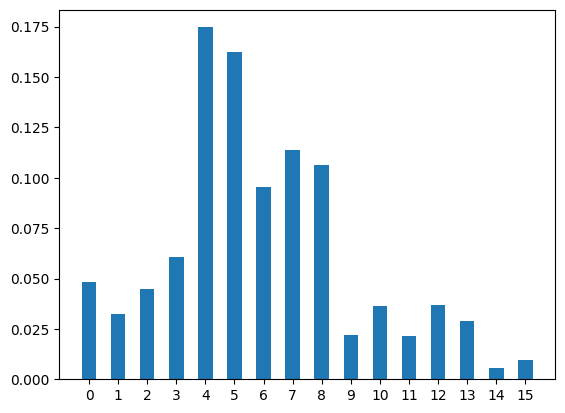



>>> Job ID: claqns3k8l5ohotbsrp0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00813, 2: 0.00239, 1: 0.07248, 11: 0.05419, 13: 0.04213, 3: 0.0009, 0: 0.00767, 7: 0.18287, 8: 0.10153, 6: 0.06119, 4: 0.15921, 9: 0.03678, 5: 0.12964, 12: 0.02833, 15: 0.00923, 10: 0.10333}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00813, 2: 0.00239, 1: 0.07248, 11: 0.05419, 13: 0.04213, 3: 0.0009, 0: 0.00767, 7: 0.18287, 8: 0.10153, 6: 0.06119, 4: 0.15921, 9: 0.03678, 5: 0.12964, 12: 0.02833, 15: 0.00923, 10: 0.10333}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
24
{14: 0.00813, 2: 0.00239, 1: 0.07248, 11: 0.05419, 13: 0.04213, 3: 0.0009, 0: 0.00767, 7: 0.18287, 8: 0.10153, 6: 0.06119, 4: 0.15921, 9: 0.03678, 5: 0.12964, 12: 0.02833, 15: 0.00923, 10: 0.10333}
variance :  0.003135142375
entropy :  2.350358684711169


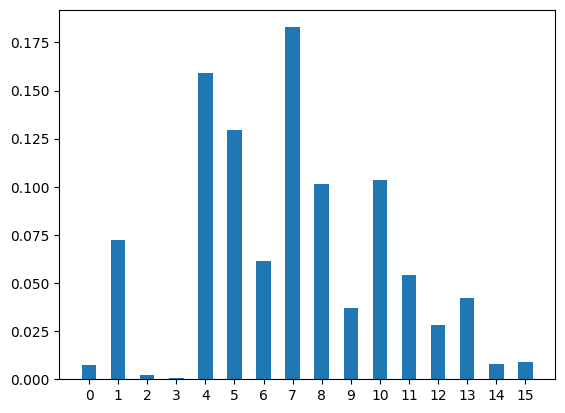



>>> Job ID: claqnt446cn44kd6ul50
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00037, 1: 0.0063, 10: 0.00043, 15: 0.01131, 9: 0.04839, 8: 0.08622, 12: 0.02298, 5: 0.17965, 0: 0.00738, 3: 0.10373, 7: 0.19124, 11: 0.05373, 4: 0.08788, 6: 0.07531, 2: 0.07427, 13: 0.05081}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00037, 1: 0.0063, 10: 0.00043, 15: 0.01131, 9: 0.04839, 8: 0.08622, 12: 0.02298, 5: 0.17965, 0: 0.00738, 3: 0.10373, 7: 0.19124, 11: 0.05373, 4: 0.08788, 6: 0.07531, 2: 0.07427, 13: 0.05081}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
25
{14: 0.00037, 1: 0.0063, 10: 0.00043, 15: 0.01131, 9: 0.04839, 8: 0.08622, 12: 0.02298, 5: 0.17965, 0: 0.00738, 3: 0.10373, 7: 0.19124, 11: 0.05373, 4: 0.08788, 6: 0.07531, 2: 0.07427, 13: 0.05081}
variance :  0.0032507386624999997
entropy :  2.3395476567253297


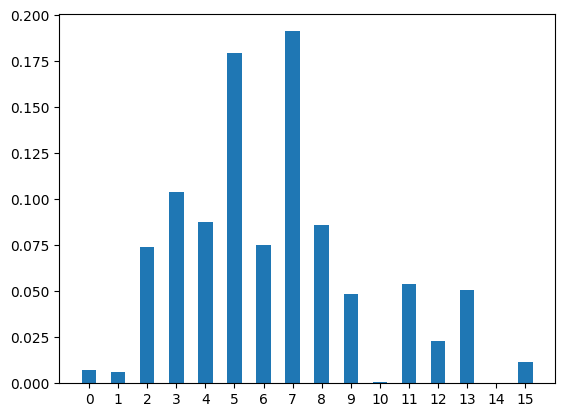



>>> Job ID: claqnu3k8l5ohotbss6g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00887, 15: 0.01052, 10: 0.08524, 2: 0.02573, 1: 0.01262, 8: 0.09906, 11: 0.03268, 0: 0.00082, 3: 0.00797, 7: 0.13354, 13: 0.08906, 12: 0.03769, 5: 0.21563, 6: 0.07321, 4: 0.11873, 14: 0.04863}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00887, 15: 0.01052, 10: 0.08524, 2: 0.02573, 1: 0.01262, 8: 0.09906, 11: 0.03268, 0: 0.00082, 3: 0.00797, 7: 0.13354, 13: 0.08906, 12: 0.03769, 5: 0.21563, 6: 0.07321, 4: 0.11873, 14: 0.04863}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
26
{9: 0.00887, 15: 0.01052, 10: 0.08524, 2: 0.02573, 1: 0.01262, 8: 0.09906, 11: 0.03268, 0: 0.00082, 3: 0.00797, 7: 0.13354, 13: 0.08906, 12: 0.03769, 5: 0.21563, 6: 0.07321, 4: 0.11873, 14: 0.04863}
variance :  0.0032640252249999994
entropy :  2.3642976640198468


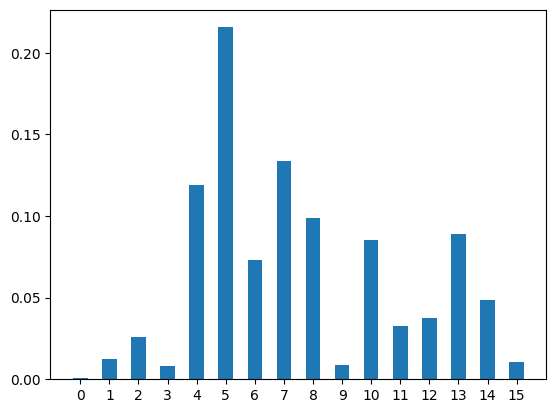



>>> Job ID: claqnvapen43j46fd7rg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01337, 2: 0.0192, 11: 0.10343, 13: 0.10516, 14: 0.10956, 9: 0.03733, 12: 0.0165, 5: 0.18821, 8: 0.08829, 6: 0.07438, 4: 0.12349, 0: 0.00386, 3: 0.00106, 7: 0.07345, 15: 0.03347, 10: 0.00924}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01337, 2: 0.0192, 11: 0.10343, 13: 0.10516, 14: 0.10956, 9: 0.03733, 12: 0.0165, 5: 0.18821, 8: 0.08829, 6: 0.07438, 4: 0.12349, 0: 0.00386, 3: 0.00106, 7: 0.07345, 15: 0.03347, 10: 0.00924}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
27
{1: 0.01337, 2: 0.0192, 11: 0.10343, 13: 0.10516, 14: 0.10956, 9: 0.03733, 12: 0.0165, 5: 0.18821, 8: 0.08829, 6: 0.07438, 4: 0.12349, 0: 0.00386, 3: 0.00106, 7: 0.07345, 15: 0.03347, 10: 0.00924}
variance :  0.0027556123
entropy :  2.3955246185479786


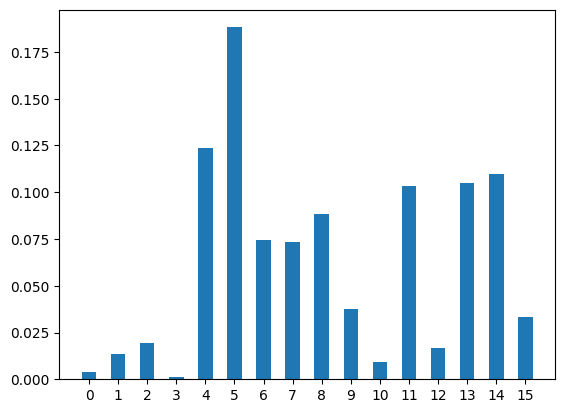



>>> Job ID: claqo0dlqrutvh0h6su0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00472, 2: 0.02274, 0: 0.00491, 3: 0.0218, 7: 0.00282, 11: 0.09722, 10: 0.00775, 15: 0.0407, 13: 0.05151, 9: 0.03225, 14: 0.17943, 6: 0.17677, 4: 0.0869, 8: 0.12687, 12: 0.0231, 5: 0.12051}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00472, 2: 0.02274, 0: 0.00491, 3: 0.0218, 7: 0.00282, 11: 0.09722, 10: 0.00775, 15: 0.0407, 13: 0.05151, 9: 0.03225, 14: 0.17943, 6: 0.17677, 4: 0.0869, 8: 0.12687, 12: 0.0231, 5: 0.12051}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
28
{1: 0.00472, 2: 0.02274, 0: 0.00491, 3: 0.0218, 7: 0.00282, 11: 0.09722, 10: 0.00775, 15: 0.0407, 13: 0.05151, 9: 0.03225, 14: 0.17943, 6: 0.17677, 4: 0.0869, 8: 0.12687, 12: 0.0231, 5: 0.12051}
variance :  0.0034721840500000004
entropy :  2.3263344573655504


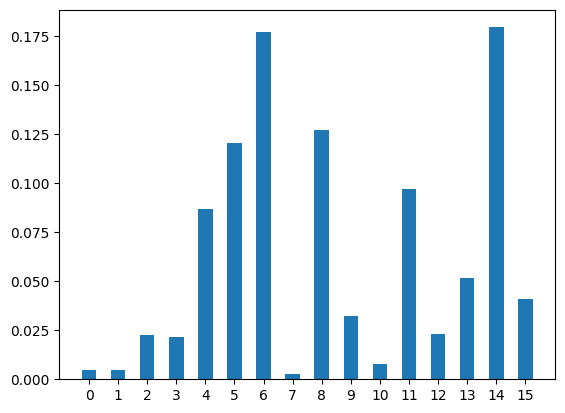



>>> Job ID: claqo1lr12tet1q0j0og
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 7e-05, 1: 0.00977, 13: 0.00364, 9: 0.02435, 11: 0.02497, 10: 0.03644, 15: 0.03935, 14: 0.22803, 7: 0.00109, 0: 0.00225, 3: 0.03308, 8: 0.12864, 4: 0.04163, 6: 0.18109, 5: 0.16825, 12: 0.07735}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 7e-05, 1: 0.00977, 13: 0.00364, 9: 0.02435, 11: 0.02497, 10: 0.03644, 15: 0.03935, 14: 0.22803, 7: 0.00109, 0: 0.00225, 3: 0.03308, 8: 0.12864, 4: 0.04163, 6: 0.18109, 5: 0.16825, 12: 0.07735}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
29
{2: 7e-05, 1: 0.00977, 13: 0.00364, 9: 0.02435, 11: 0.02497, 10: 0.03644, 15: 0.03935, 14: 0.22803, 7: 0.00109, 0: 0.00225, 3: 0.03308, 8: 0.12864, 4: 0.04163, 6: 0.18109, 5: 0.16825, 12: 0.07735}
variance :  0.005010351525
entropy :  2.1713758725276566


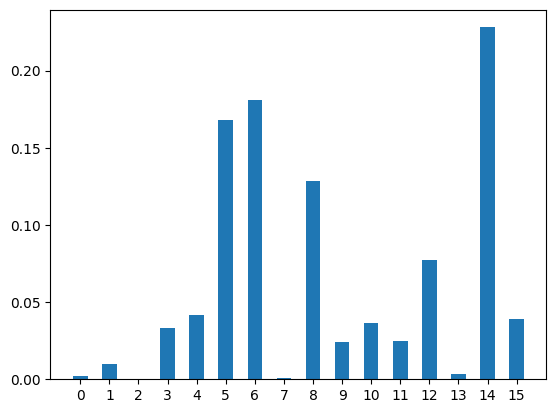



>>> Job ID: claqo32pen43j46fd8f0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.00415, 1: 0.00161, 2: 0.00965, 14: 0.20971, 4: 0.01089, 6: 0.12593, 8: 0.08258, 12: 0.05587, 5: 0.2005, 9: 0.0449, 10: 0.02775, 15: 0.03603, 13: 0.06284, 0: 0.02527, 3: 0.04271, 7: 0.05961}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.00415, 1: 0.00161, 2: 0.00965, 14: 0.20971, 4: 0.01089, 6: 0.12593, 8: 0.08258, 12: 0.05587, 5: 0.2005, 9: 0.0449, 10: 0.02775, 15: 0.03603, 13: 0.06284, 0: 0.02527, 3: 0.04271, 7: 0.05961}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
30
{11: 0.00415, 1: 0.00161, 2: 0.00965, 14: 0.20971, 4: 0.01089, 6: 0.12593, 8: 0.08258, 12: 0.05587, 5: 0.2005, 9: 0.0449, 10: 0.02775, 15: 0.03603, 13: 0.06284, 0: 0.02527, 3: 0.04271, 7: 0.05961}
variance :  0.0038599068500000003
entropy :  2.3331015457605577


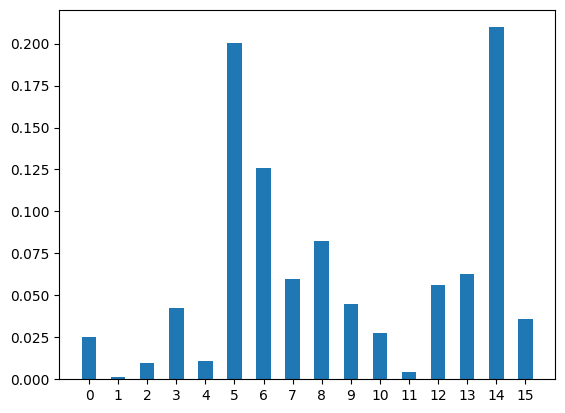



>>> Job ID: claqo4ctstu8k2fv5rb0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00372, 1: 0.00919, 2: 0.0063, 11: 0.01407, 4: 0.03655, 6: 0.11125, 14: 0.15488, 12: 0.05699, 5: 0.18944, 8: 0.06849, 13: 0.06059, 10: 0.01116, 15: 0.11551, 0: 0.05184, 7: 0.06061, 3: 0.04941}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00372, 1: 0.00919, 2: 0.0063, 11: 0.01407, 4: 0.03655, 6: 0.11125, 14: 0.15488, 12: 0.05699, 5: 0.18944, 8: 0.06849, 13: 0.06059, 10: 0.01116, 15: 0.11551, 0: 0.05184, 7: 0.06061, 3: 0.04941}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
31
{9: 0.00372, 1: 0.00919, 2: 0.0063, 11: 0.01407, 4: 0.03655, 6: 0.11125, 14: 0.15488, 12: 0.05699, 5: 0.18944, 8: 0.06849, 13: 0.06059, 10: 0.01116, 15: 0.11551, 0: 0.05184, 7: 0.06061, 3: 0.04941}
variance :  0.0028314401375
entropy :  2.413297398861365


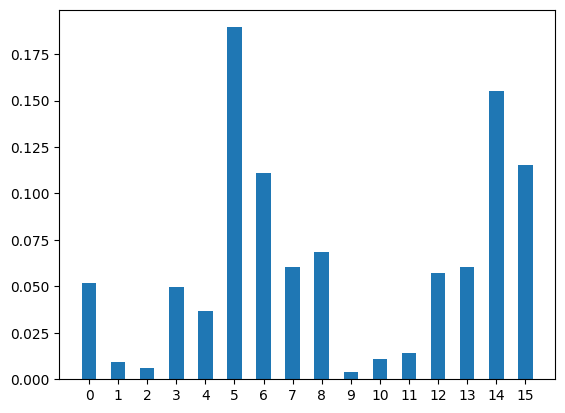



>>> Job ID: claqo5ipen43j46fd8qg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00047, 2: 0.0026, 14: 0.00848, 11: 0.00992, 8: 0.07144, 9: 0.06908, 12: 0.04594, 5: 0.15718, 1: 0.00867, 4: 0.01997, 6: 0.14996, 3: 0.01403, 0: 0.10288, 7: 0.0719, 10: 0.05299, 15: 0.21449}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00047, 2: 0.0026, 14: 0.00848, 11: 0.00992, 8: 0.07144, 9: 0.06908, 12: 0.04594, 5: 0.15718, 1: 0.00867, 4: 0.01997, 6: 0.14996, 3: 0.01403, 0: 0.10288, 7: 0.0719, 10: 0.05299, 15: 0.21449}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
32
{13: 0.00047, 2: 0.0026, 14: 0.00848, 11: 0.00992, 8: 0.07144, 9: 0.06908, 12: 0.04594, 5: 0.15718, 1: 0.00867, 4: 0.01997, 6: 0.14996, 3: 0.01403, 0: 0.10288, 7: 0.0719, 10: 0.05299, 15: 0.21449}
variance :  0.0038809794124999995
entropy :  2.2836084657765716


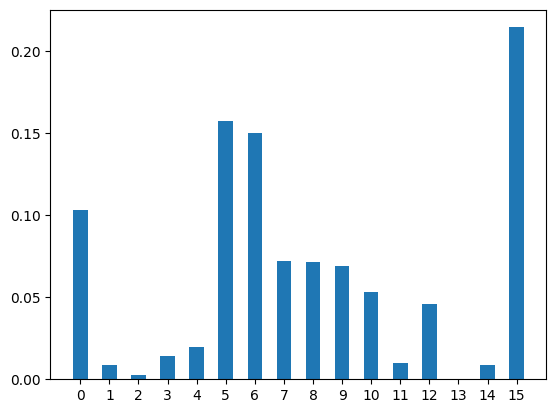



>>> Job ID: claqo6tr12tet1q0j1ig
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00094, 14: 0.00111, 1: 0.00816, 13: 0.03392, 8: 0.05226, 4: 0.01774, 6: 0.27224, 11: 0.04684, 10: 0.0038, 15: 0.21414, 5: 0.04348, 12: 0.01587, 9: 0.03572, 3: 0.07451, 0: 0.11273, 7: 0.06654}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00094, 14: 0.00111, 1: 0.00816, 13: 0.03392, 8: 0.05226, 4: 0.01774, 6: 0.27224, 11: 0.04684, 10: 0.0038, 15: 0.21414, 5: 0.04348, 12: 0.01587, 9: 0.03572, 3: 0.07451, 0: 0.11273, 7: 0.06654}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
33
{2: 0.00094, 14: 0.00111, 1: 0.00816, 13: 0.03392, 8: 0.05226, 4: 0.01774, 6: 0.27224, 11: 0.04684, 10: 0.0038, 15: 0.21414, 5: 0.04348, 12: 0.01587, 9: 0.03572, 3: 0.07451, 0: 0.11273, 7: 0.06654}
variance :  0.005628107249999999
entropy :  2.183642022998229


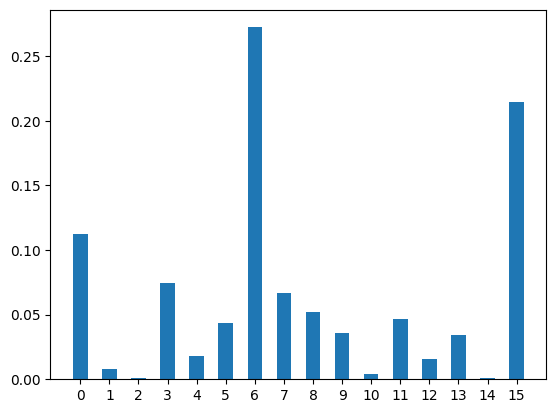



>>> Job ID: claqo83k8l5ohotbstl0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00436, 2: 0.00362, 13: 0.06337, 9: 0.03074, 1: 0.02787, 3: 0.01947, 7: 0.04921, 0: 0.15413, 4: 0.07922, 6: 0.27969, 10: 0.01114, 15: 0.14721, 12: 0.02179, 5: 0.04441, 8: 0.02239, 11: 0.04138}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00436, 2: 0.00362, 13: 0.06337, 9: 0.03074, 1: 0.02787, 3: 0.01947, 7: 0.04921, 0: 0.15413, 4: 0.07922, 6: 0.27969, 10: 0.01114, 15: 0.14721, 12: 0.02179, 5: 0.04441, 8: 0.02239, 11: 0.04138}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
34
{14: 0.00436, 2: 0.00362, 13: 0.06337, 9: 0.03074, 1: 0.02787, 3: 0.01947, 7: 0.04921, 0: 0.15413, 4: 0.07922, 6: 0.27969, 10: 0.01114, 15: 0.14721, 12: 0.02179, 5: 0.04441, 8: 0.02239, 11: 0.04138}
variance :  0.005049010887499999
entropy :  2.266688108910769


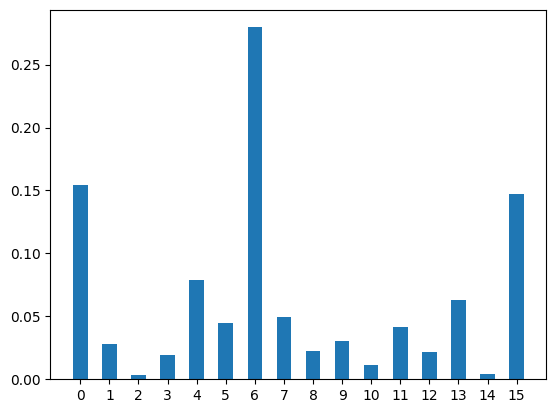



>>> Job ID: claqo9llqrutvh0h6u80
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{12: 0.00965, 5: 0.02192, 8: 0.02185, 10: 0.01323, 15: 0.06342, 9: 0.02553, 11: 0.04292, 14: 0.06201, 1: 0.15713, 13: 0.03171, 2: 0.02696, 4: 0.08046, 6: 0.18403, 3: 0.02252, 0: 0.08634, 7: 0.15032}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {12: 0.00965, 5: 0.02192, 8: 0.02185, 10: 0.01323, 15: 0.06342, 9: 0.02553, 11: 0.04292, 14: 0.06201, 1: 0.15713, 13: 0.03171, 2: 0.02696, 4: 0.08046, 6: 0.18403, 3: 0.02252, 0: 0.08634, 7: 0.15032}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
35
{12: 0.00965, 5: 0.02192, 8: 0.02185, 10: 0.01323, 15: 0.06342, 9: 0.02553, 11: 0.04292, 14: 0.06201, 1: 0.15713, 13: 0.03171, 2: 0.02696, 4: 0.08046, 6: 0.18403, 3: 0.02252, 0: 0.08634, 7: 0.15032}
variance :  0.002900513225
entropy :  2.4390685846954403


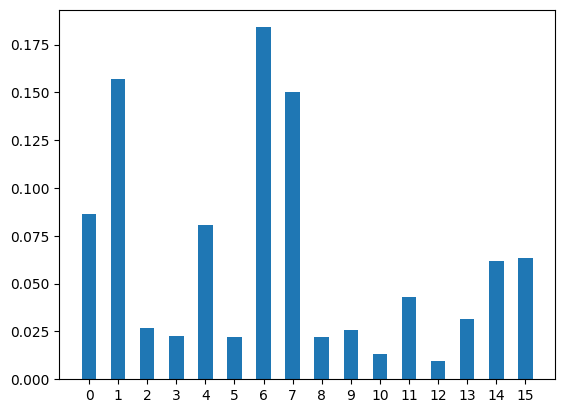



>>> Job ID: claqob2pen43j46fd9k0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00879, 8: 0.03243, 11: 0.01351, 10: 0.02483, 15: 0.0593, 9: 0.03472, 2: 0.07478, 1: 0.15449, 0: 0.05641, 7: 0.15937, 3: 0.02574, 14: 0.04424, 6: 0.18113, 4: 0.06865, 5: 0.01697, 12: 0.04464}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00879, 8: 0.03243, 11: 0.01351, 10: 0.02483, 15: 0.0593, 9: 0.03472, 2: 0.07478, 1: 0.15449, 0: 0.05641, 7: 0.15937, 3: 0.02574, 14: 0.04424, 6: 0.18113, 4: 0.06865, 5: 0.01697, 12: 0.04464}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
36
{13: 0.00879, 8: 0.03243, 11: 0.01351, 10: 0.02483, 15: 0.0593, 9: 0.03472, 2: 0.07478, 1: 0.15449, 0: 0.05641, 7: 0.15937, 3: 0.02574, 14: 0.04424, 6: 0.18113, 4: 0.06865, 5: 0.01697, 12: 0.04464}
variance :  0.0027882134375
entropy :  2.4577238768025658


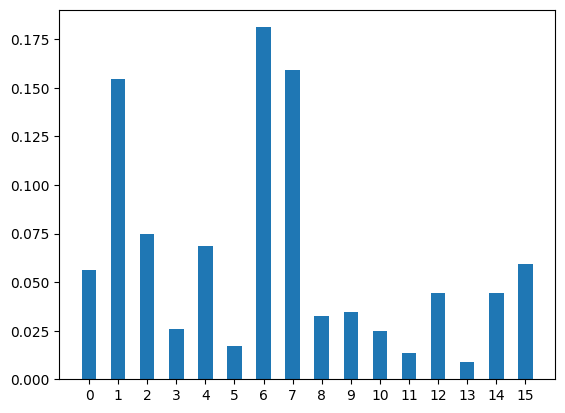



>>> Job ID: claqocllqrutvh0h6ung
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00623, 11: 0.02304, 8: 0.02206, 5: 0.0294, 12: 0.05279, 13: 0.05836, 2: 0.07658, 1: 0.15119, 3: 0.0097, 0: 0.05708, 7: 0.17014, 14: 0.03727, 10: 0.02448, 15: 0.07526, 4: 0.05491, 6: 0.15151}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00623, 11: 0.02304, 8: 0.02206, 5: 0.0294, 12: 0.05279, 13: 0.05836, 2: 0.07658, 1: 0.15119, 3: 0.0097, 0: 0.05708, 7: 0.17014, 14: 0.03727, 10: 0.02448, 15: 0.07526, 4: 0.05491, 6: 0.15151}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
37
{9: 0.00623, 11: 0.02304, 8: 0.02206, 5: 0.0294, 12: 0.05279, 13: 0.05836, 2: 0.07658, 1: 0.15119, 3: 0.0097, 0: 0.05708, 7: 0.17014, 14: 0.03727, 10: 0.02448, 15: 0.07526, 4: 0.05491, 6: 0.15151}
variance :  0.0025161787125
entropy :  2.4729320612078007


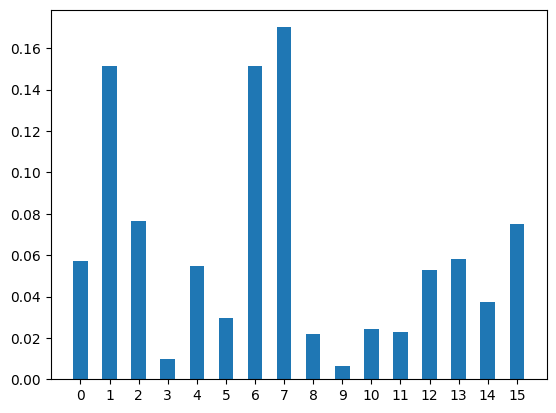



>>> Job ID: claqoectstu8k2fv5smg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.01483, 9: 0.00397, 11: 0.03614, 8: 0.02974, 5: 0.04133, 12: 0.0564, 2: 0.10608, 15: 0.00964, 10: 0.06517, 1: 0.08152, 14: 0.09355, 4: 0.04395, 6: 0.04944, 3: 0.00572, 7: 0.25425, 0: 0.10827}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.01483, 9: 0.00397, 11: 0.03614, 8: 0.02974, 5: 0.04133, 12: 0.0564, 2: 0.10608, 15: 0.00964, 10: 0.06517, 1: 0.08152, 14: 0.09355, 4: 0.04395, 6: 0.04944, 3: 0.00572, 7: 0.25425, 0: 0.10827}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
38
{13: 0.01483, 9: 0.00397, 11: 0.03614, 8: 0.02974, 5: 0.04133, 12: 0.0564, 2: 0.10608, 15: 0.00964, 10: 0.06517, 1: 0.08152, 14: 0.09355, 4: 0.04395, 6: 0.04944, 3: 0.00572, 7: 0.25425, 0: 0.10827}
variance :  0.0035362258499999993
entropy :  2.3939184104007545


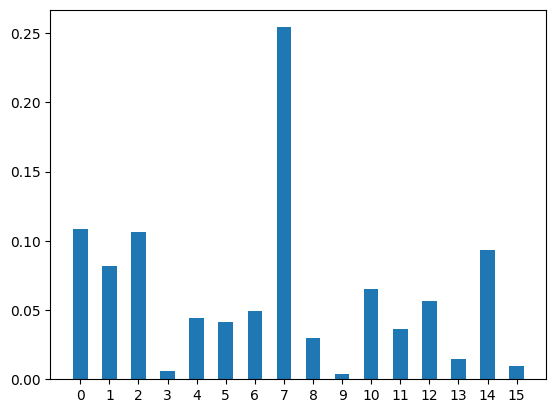



>>> Job ID: claqoftlqrutvh0h6v4g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.0033, 14: 0.00278, 9: 0.02335, 1: 0.00965, 4: 0.03334, 6: 0.02306, 10: 0.09508, 15: 0.09079, 11: 0.04634, 8: 0.03189, 2: 0.08611, 5: 0.05483, 12: 0.04763, 0: 0.11499, 7: 0.28069, 3: 0.05617}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.0033, 14: 0.00278, 9: 0.02335, 1: 0.00965, 4: 0.03334, 6: 0.02306, 10: 0.09508, 15: 0.09079, 11: 0.04634, 8: 0.03189, 2: 0.08611, 5: 0.05483, 12: 0.04763, 0: 0.11499, 7: 0.28069, 3: 0.05617}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
39
{13: 0.0033, 14: 0.00278, 9: 0.02335, 1: 0.00965, 4: 0.03334, 6: 0.02306, 10: 0.09508, 15: 0.09079, 11: 0.04634, 8: 0.03189, 2: 0.08611, 5: 0.05483, 12: 0.04763, 0: 0.11499, 7: 0.28069, 3: 0.05617}
variance :  0.0042563877375
entropy :  2.34423668403624


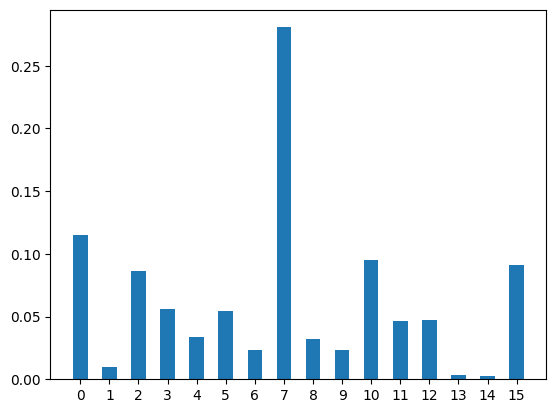



>>> Job ID: claqoh446cn44kd6uo2g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00296, 13: 0.00796, 9: 0.02147, 1: 0.03587, 2: 0.07502, 15: 0.04229, 10: 0.04896, 4: 0.02395, 6: 0.02027, 3: 0.07223, 0: 0.13913, 7: 0.23129, 8: 0.07856, 12: 0.06914, 5: 0.08187, 11: 0.04903}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00296, 13: 0.00796, 9: 0.02147, 1: 0.03587, 2: 0.07502, 15: 0.04229, 10: 0.04896, 4: 0.02395, 6: 0.02027, 3: 0.07223, 0: 0.13913, 7: 0.23129, 8: 0.07856, 12: 0.06914, 5: 0.08187, 11: 0.04903}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
40
{14: 0.00296, 13: 0.00796, 9: 0.02147, 1: 0.03587, 2: 0.07502, 15: 0.04229, 10: 0.04896, 4: 0.02395, 6: 0.02027, 3: 0.07223, 0: 0.13913, 7: 0.23129, 8: 0.07856, 12: 0.06914, 5: 0.08187, 11: 0.04903}
variance :  0.0030153617125000002
entropy :  2.441870355222979


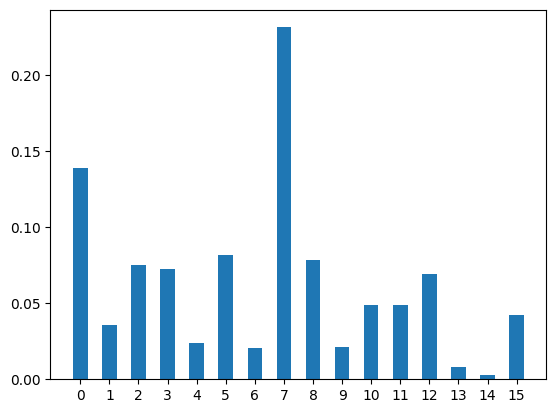



>>> Job ID: claqoibk8l5ohotbsvd0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.0048, 6: 0.01806, 4: 0.00599, 14: 0.00716, 13: 0.01678, 2: 0.07816, 11: 0.01347, 15: 0.01313, 10: 0.09859, 3: 0.05399, 0: 0.17178, 7: 0.15125, 9: 0.07073, 5: 0.09986, 12: 0.03846, 8: 0.15779}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.0048, 6: 0.01806, 4: 0.00599, 14: 0.00716, 13: 0.01678, 2: 0.07816, 11: 0.01347, 15: 0.01313, 10: 0.09859, 3: 0.05399, 0: 0.17178, 7: 0.15125, 9: 0.07073, 5: 0.09986, 12: 0.03846, 8: 0.15779}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
41
{1: 0.0048, 6: 0.01806, 4: 0.00599, 14: 0.00716, 13: 0.01678, 2: 0.07816, 11: 0.01347, 15: 0.01313, 10: 0.09859, 3: 0.05399, 0: 0.17178, 7: 0.15125, 9: 0.07073, 5: 0.09986, 12: 0.03846, 8: 0.15779}
variance :  0.0031907617750000002
entropy :  2.355255466768259


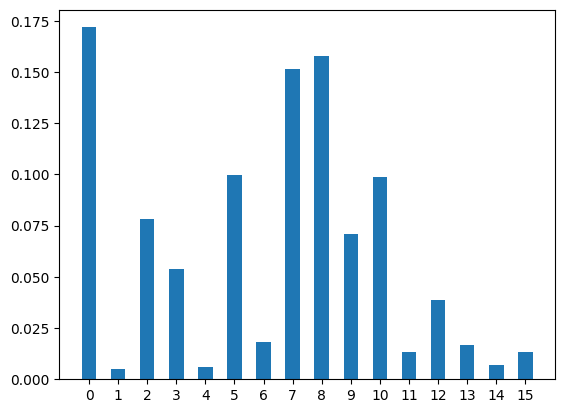



>>> Job ID: claqok3k8l5ohotbsvs0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.04893, 9: 0.01563, 11: 0.09475, 14: 0.01586, 15: 0.00734, 10: 0.04799, 12: 0.03801, 5: 0.09023, 1: 0.15426, 8: 0.211, 2: 0.07698, 6: 0.02456, 4: 0.01441, 3: 0.02689, 0: 0.03063, 7: 0.10253}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.04893, 9: 0.01563, 11: 0.09475, 14: 0.01586, 15: 0.00734, 10: 0.04799, 12: 0.03801, 5: 0.09023, 1: 0.15426, 8: 0.211, 2: 0.07698, 6: 0.02456, 4: 0.01441, 3: 0.02689, 0: 0.03063, 7: 0.10253}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
42
{13: 0.04893, 9: 0.01563, 11: 0.09475, 14: 0.01586, 15: 0.00734, 10: 0.04799, 12: 0.03801, 5: 0.09023, 1: 0.15426, 8: 0.211, 2: 0.07698, 6: 0.02456, 4: 0.01441, 3: 0.02689, 0: 0.03063, 7: 0.10253}
variance :  0.0030336407625000004
entropy :  2.428448391455065


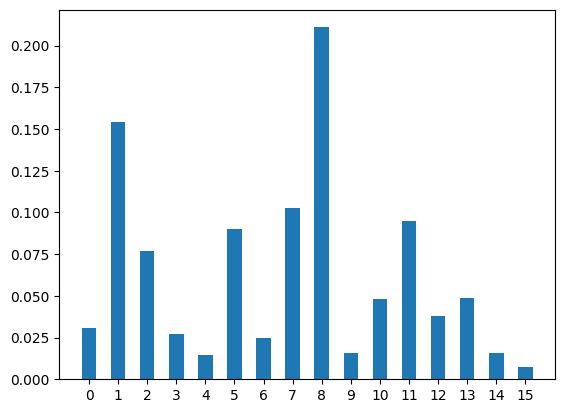



>>> Job ID: claqolk46cn44kd6uos0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.02709, 11: 0.06362, 15: 0.01862, 10: 0.06451, 5: 0.04472, 12: 0.06212, 4: 0.01778, 6: 0.07111, 9: 0.05757, 8: 0.22683, 1: 0.13574, 2: 0.08844, 14: 0.03123, 0: 0.00119, 3: 0.02019, 7: 0.06924}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.02709, 11: 0.06362, 15: 0.01862, 10: 0.06451, 5: 0.04472, 12: 0.06212, 4: 0.01778, 6: 0.07111, 9: 0.05757, 8: 0.22683, 1: 0.13574, 2: 0.08844, 14: 0.03123, 0: 0.00119, 3: 0.02019, 7: 0.06924}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
43
{13: 0.02709, 11: 0.06362, 15: 0.01862, 10: 0.06451, 5: 0.04472, 12: 0.06212, 4: 0.01778, 6: 0.07111, 9: 0.05757, 8: 0.22683, 1: 0.13574, 2: 0.08844, 14: 0.03123, 0: 0.00119, 3: 0.02019, 7: 0.06924}
variance :  0.00282580175
entropy :  2.4615973194267884


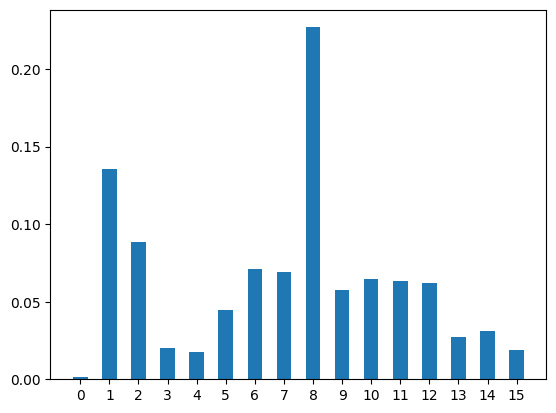



>>> Job ID: claqon5r12tet1q0j3kg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{15: 0.00501, 10: 0.018, 14: 0.02555, 9: 0.06593, 12: 0.02156, 5: 0.04027, 2: 0.09933, 0: 0.01977, 3: 0.05813, 7: 0.04042, 13: 0.03685, 4: 0.00532, 6: 0.08918, 1: 0.12342, 8: 0.2252, 11: 0.12606}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {15: 0.00501, 10: 0.018, 14: 0.02555, 9: 0.06593, 12: 0.02156, 5: 0.04027, 2: 0.09933, 0: 0.01977, 3: 0.05813, 7: 0.04042, 13: 0.03685, 4: 0.00532, 6: 0.08918, 1: 0.12342, 8: 0.2252, 11: 0.12606}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
44
{15: 0.00501, 10: 0.018, 14: 0.02555, 9: 0.06593, 12: 0.02156, 5: 0.04027, 2: 0.09933, 0: 0.01977, 3: 0.05813, 7: 0.04042, 13: 0.03685, 4: 0.00532, 6: 0.08918, 1: 0.12342, 8: 0.2252, 11: 0.12606}
variance :  0.00321145665
entropy :  2.4059727233631834


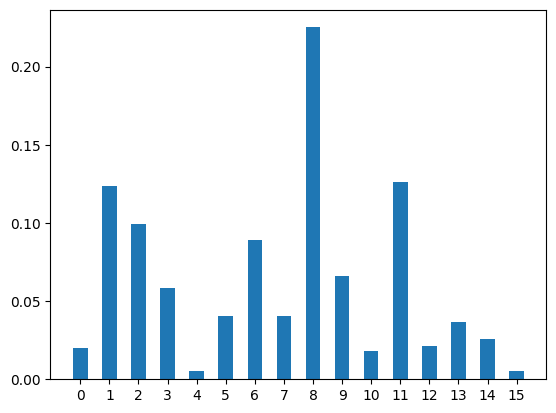



>>> Job ID: claqoork8l5ohotbt0hg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{5: 0.0006, 12: 0.00925, 1: 0.07555, 13: 0.03474, 9: 0.02594, 14: 0.03697, 11: 0.13476, 2: 0.08012, 15: 0.01747, 10: 0.11737, 4: 0.02612, 6: 0.12024, 8: 0.2178, 0: 0.0072, 7: 0.01895, 3: 0.07692}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {5: 0.0006, 12: 0.00925, 1: 0.07555, 13: 0.03474, 9: 0.02594, 14: 0.03697, 11: 0.13476, 2: 0.08012, 15: 0.01747, 10: 0.11737, 4: 0.02612, 6: 0.12024, 8: 0.2178, 0: 0.0072, 7: 0.01895, 3: 0.07692}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
45
{5: 0.0006, 12: 0.00925, 1: 0.07555, 13: 0.03474, 9: 0.02594, 14: 0.03697, 11: 0.13476, 2: 0.08012, 15: 0.01747, 10: 0.11737, 4: 0.02612, 6: 0.12024, 8: 0.2178, 0: 0.0072, 7: 0.01895, 3: 0.07692}
variance :  0.0033815642375
entropy :  2.360629302303093


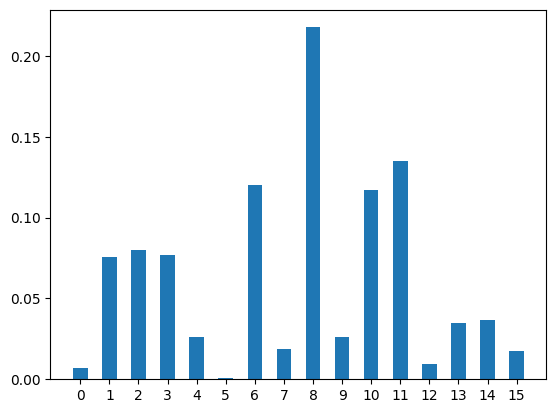



>>> Job ID: claqoqdlqrutvh0h70tg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.05926, 9: 0.01796, 14: 0.02295, 8: 0.18389, 2: 0.01525, 4: 0.0894, 6: 0.11841, 7: 0.02207, 3: 0.1143, 0: 0.02253, 15: 0.03681, 10: 0.08411, 11: 0.09843, 1: 0.06898, 12: 0.04231, 5: 0.00334}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.05926, 9: 0.01796, 14: 0.02295, 8: 0.18389, 2: 0.01525, 4: 0.0894, 6: 0.11841, 7: 0.02207, 3: 0.1143, 0: 0.02253, 15: 0.03681, 10: 0.08411, 11: 0.09843, 1: 0.06898, 12: 0.04231, 5: 0.00334}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
46
{13: 0.05926, 9: 0.01796, 14: 0.02295, 8: 0.18389, 2: 0.01525, 4: 0.0894, 6: 0.11841, 7: 0.02207, 3: 0.1143, 0: 0.02253, 15: 0.03681, 10: 0.08411, 11: 0.09843, 1: 0.06898, 12: 0.04231, 5: 0.00334}
variance :  0.0022911897125
entropy :  2.4827850855985605


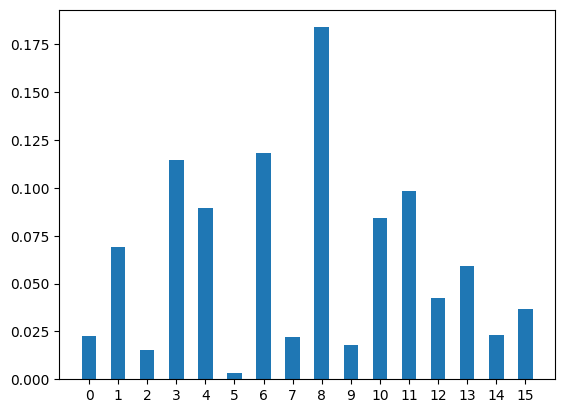



>>> Job ID: claqosk46cn44kd6ups0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.01622, 15: 0.03296, 10: 0.05676, 5: 0.00781, 12: 0.03781, 8: 0.10422, 9: 0.09355, 1: 0.04885, 13: 0.10054, 2: 0.05444, 6: 0.06356, 4: 0.14079, 11: 0.08565, 0: 0.0125, 3: 0.07094, 7: 0.0734}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.01622, 15: 0.03296, 10: 0.05676, 5: 0.00781, 12: 0.03781, 8: 0.10422, 9: 0.09355, 1: 0.04885, 13: 0.10054, 2: 0.05444, 6: 0.06356, 4: 0.14079, 11: 0.08565, 0: 0.0125, 3: 0.07094, 7: 0.0734}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
47
{14: 0.01622, 15: 0.03296, 10: 0.05676, 5: 0.00781, 12: 0.03781, 8: 0.10422, 9: 0.09355, 1: 0.04885, 13: 0.10054, 2: 0.05444, 6: 0.06356, 4: 0.14079, 11: 0.08565, 0: 0.0125, 3: 0.07094, 7: 0.0734}
variance :  0.0012754620125
entropy :  2.5939463932891194


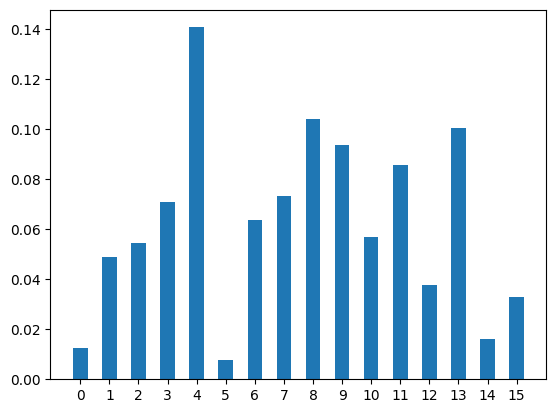



>>> Job ID: claqou5r12tet1q0j4ng
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00302, 14: 0.02393, 8: 0.07187, 12: 0.04461, 5: 0.14699, 11: 0.09916, 10: 0.04662, 15: 0.03633, 6: 0.02656, 4: 0.02749, 9: 0.09204, 7: 0.10686, 0: 0.01226, 3: 0.03173, 13: 0.12955, 2: 0.10098}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00302, 14: 0.02393, 8: 0.07187, 12: 0.04461, 5: 0.14699, 11: 0.09916, 10: 0.04662, 15: 0.03633, 6: 0.02656, 4: 0.02749, 9: 0.09204, 7: 0.10686, 0: 0.01226, 3: 0.03173, 13: 0.12955, 2: 0.10098}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
48
{1: 0.00302, 14: 0.02393, 8: 0.07187, 12: 0.04461, 5: 0.14699, 11: 0.09916, 10: 0.04662, 15: 0.03633, 6: 0.02656, 4: 0.02749, 9: 0.09204, 7: 0.10686, 0: 0.01226, 3: 0.03173, 13: 0.12955, 2: 0.10098}
variance :  0.001853624475
entropy :  2.5225899293536873


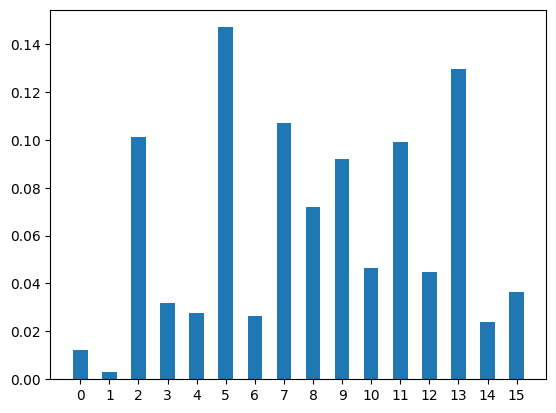



>>> Job ID: claqp04tstu8k2fv601g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01216, 14: 0.02974, 15: 0.00448, 10: 0.02289, 8: 0.02155, 2: 0.106, 4: 0.01592, 6: 0.11885, 9: 0.12412, 0: 0.03306, 3: 0.06369, 7: 0.11897, 11: 0.01709, 13: 0.11577, 12: 0.13506, 5: 0.06065}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01216, 14: 0.02974, 15: 0.00448, 10: 0.02289, 8: 0.02155, 2: 0.106, 4: 0.01592, 6: 0.11885, 9: 0.12412, 0: 0.03306, 3: 0.06369, 7: 0.11897, 11: 0.01709, 13: 0.11577, 12: 0.13506, 5: 0.06065}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
49
{1: 0.01216, 14: 0.02974, 15: 0.00448, 10: 0.02289, 8: 0.02155, 2: 0.106, 4: 0.01592, 6: 0.11885, 9: 0.12412, 0: 0.03306, 3: 0.06369, 7: 0.11897, 11: 0.01709, 13: 0.11577, 12: 0.13506, 5: 0.06065}
variance :  0.002217433075
entropy :  2.468379606385958


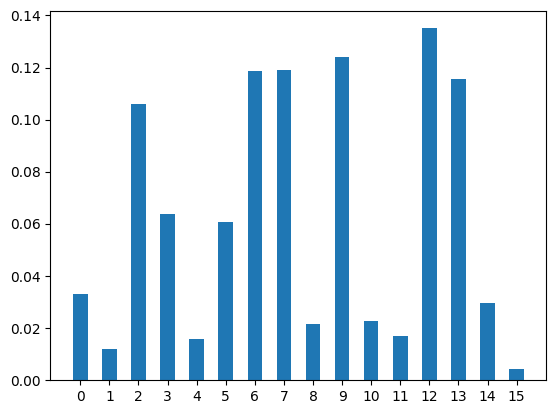

In [37]:
var_containingCL = []
entropy_containingCL = []
for N in range(50):
  coin_bit = QuantumRegister(1, 's')
  position_bits = QuantumRegister(4, 'p')
  classical_bis = ClassicalRegister(4, 'c')
  circuit = QuantumCircuit(coin_bit, position_bits, classical_bis)

  s = coin_bit
  p0, p1, p2, p3 = position_bits
  c0, c1, c2, c3 = classical_bis

  Ugate = Shift.to_gate().control(1)

  for i in range(N):
    circuit.barrier()
    circuit.h(s)
    circuit.append(Ugate, [s, p0, p1, p2, p3])

    qc1 = QuantumCircuit(2)
    qc1.swap(0,1)
    CSwapgate = qc1.to_gate().control(2)

    circuit.x(p2)
    circuit.append(CSwapgate, [p1,p2,p0,p3])
    circuit.x(p2)
    circuit.x(p1)
    circuit.append(C3XGate(), [p0,p1,p3,p2])
    circuit.x(p1)

  circuit.barrier()

  circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

  job = sampler.run(circuit, shots=100000)
  print(f">>> Job ID: {job.job_id()}")
  print(f">>> Job Status: {job.status()}")

  result = job.result()
  print(f">>> {result}")
  print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
  print(f"  > Metadata: {result.metadata[0]}")

  print(N)
  cnts = dict(result.quasi_dists[0])
  print(cnts)

  board = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  prob = []
  for i in range(16):
    prob.append(cnts.get(i, 0))

  entropy = 0
  for i in range(16):
    if prob[i] != 0 :
      entropy = entropy - prob[i]*np.log(prob[i])

  var_containingCL.append(np.var(prob))
  entropy_containingCL.append(entropy)
  print("variance : ", np.var(prob))
  print("entropy : ", entropy)
  plt.bar(board, prob, 0.5)
  plt.xticks(board)
  plt.show()
  print()
  print()

compare entropy between task3 and task4

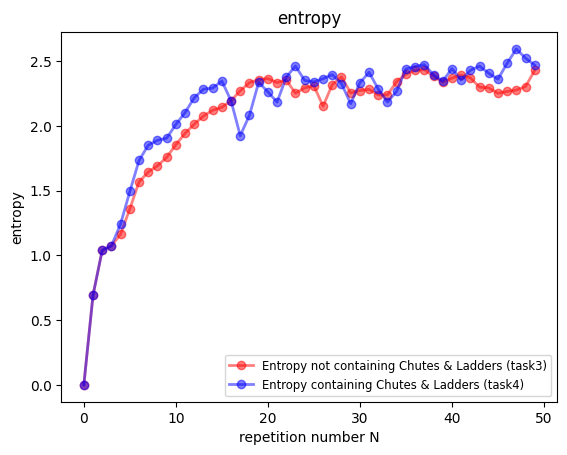

In [44]:
n = [i for i in range(50)]
plt.plot(n, entropy_notcontainingCL, color='red', marker='o', alpha=0.5, linewidth=2)
plt.plot(n, entropy_containingCL, color='blue', marker='o', alpha=0.5, linewidth=2)

plt.title("entropy")
plt.xlabel("repetition number N")
plt.ylabel("entropy")
plt.legend(["Entropy not containing Chutes & Ladders (task3)", "Entropy containing Chutes & Ladders (task4)"], fontsize="small")
plt.show()

compare variance between task3 and task4

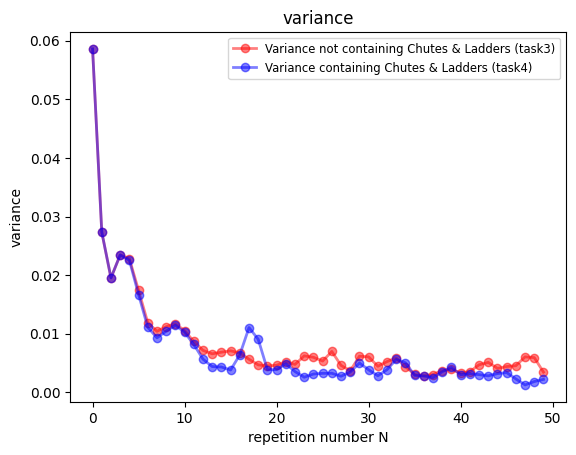

In [45]:
n = [i for i in range(50)]
plt.plot(n, var_notcontainingCL, color='red', marker='o', alpha=0.5, linewidth=2)
plt.plot(n, var_containingCL, color='blue', marker='o', alpha=0.5, linewidth=2)

plt.title("variance")
plt.xlabel("repetition number N")
plt.ylabel("variance")
plt.legend(["Variance not containing Chutes & Ladders (task3)", "Variance containing Chutes & Ladders (task4)"], fontsize="small")
plt.show()